In [1]:
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets

In [2]:
from utils import Logger

In [3]:
def mnist_data():
    compose = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
    out_dir = './dataset'
    return datasets.MNIST(root=out_dir, train=True, transform=compose, download=True)
# Load data
data = mnist_data()
# Create loader with data, so that we can iterate over it
data_loader = torch.utils.data.DataLoader(data, batch_size=100, shuffle=True)
# Num batches
num_batches = len(data_loader)

In [4]:
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 784
        n_out = 1
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
discriminator = DiscriminatorNet()

In [5]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

In [6]:
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
generator = GeneratorNet()

In [7]:
def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 100))
    return n

In [8]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

In [9]:
loss = nn.BCELoss()

In [10]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    return data

In [11]:
def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, ones_target(N) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [12]:
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [13]:
num_test_samples = 16
test_noise = noise(num_test_samples)

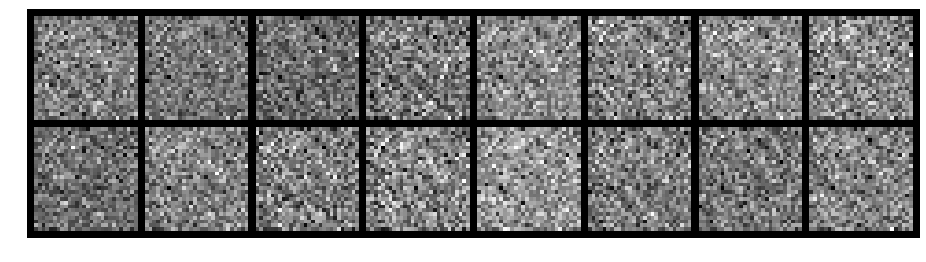

Epoch: [0/50], Batch Num: [0/600]
Discriminator Loss: 1.3673, Generator Loss: 0.6996
D(x): 0.5064, D(G(z)): 0.4966


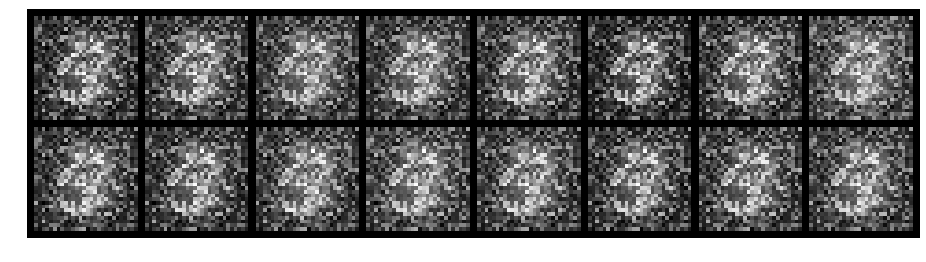

Epoch: [0/50], Batch Num: [100/600]
Discriminator Loss: 0.4767, Generator Loss: 2.9997
D(x): 0.7582, D(G(z)): 0.1184


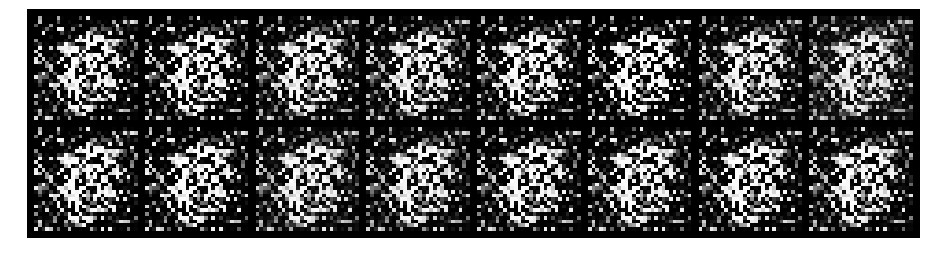

Epoch: [0/50], Batch Num: [200/600]
Discriminator Loss: 0.2767, Generator Loss: 3.7783
D(x): 0.9285, D(G(z)): 0.1507


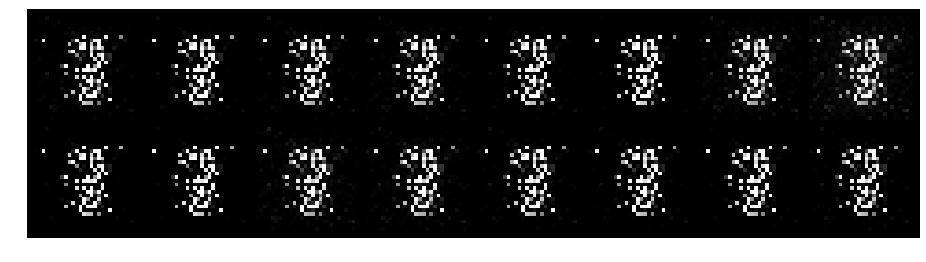

Epoch: [0/50], Batch Num: [300/600]
Discriminator Loss: 0.0957, Generator Loss: 4.4740
D(x): 0.9482, D(G(z)): 0.0328


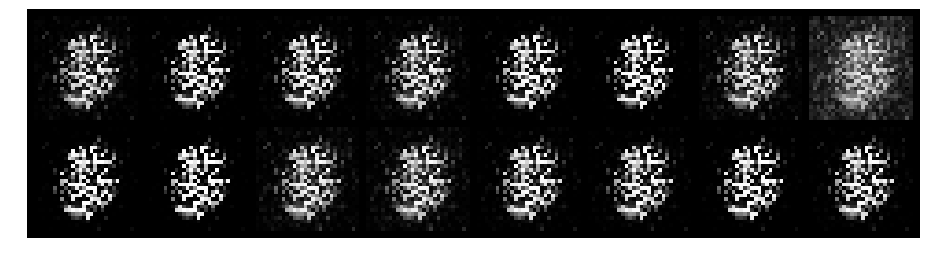

Epoch: [0/50], Batch Num: [400/600]
Discriminator Loss: 0.3054, Generator Loss: 3.3382
D(x): 0.8412, D(G(z)): 0.1058


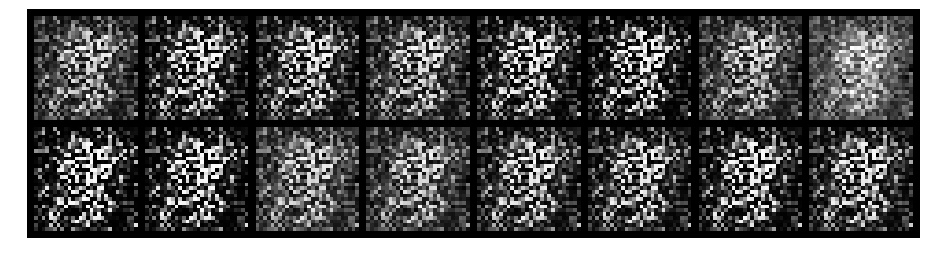

Epoch: [0/50], Batch Num: [500/600]
Discriminator Loss: 2.0753, Generator Loss: 2.9240
D(x): 0.5944, D(G(z)): 0.6708


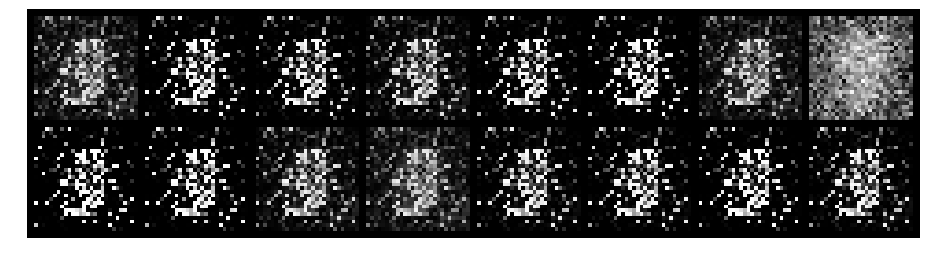

Epoch: [1/50], Batch Num: [0/600]
Discriminator Loss: 0.2930, Generator Loss: 3.7107
D(x): 0.9135, D(G(z)): 0.1418


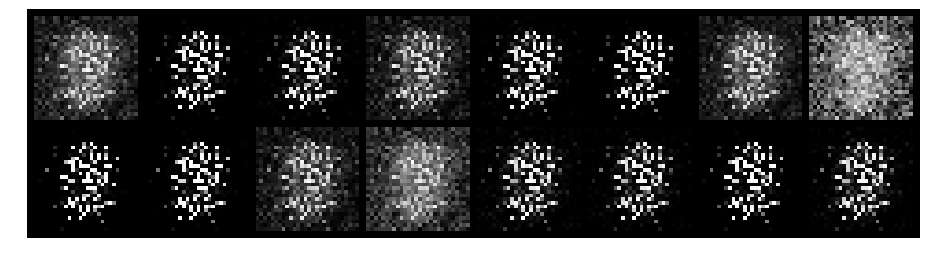

Epoch: [1/50], Batch Num: [100/600]
Discriminator Loss: 0.4500, Generator Loss: 3.2245
D(x): 0.8467, D(G(z)): 0.1490


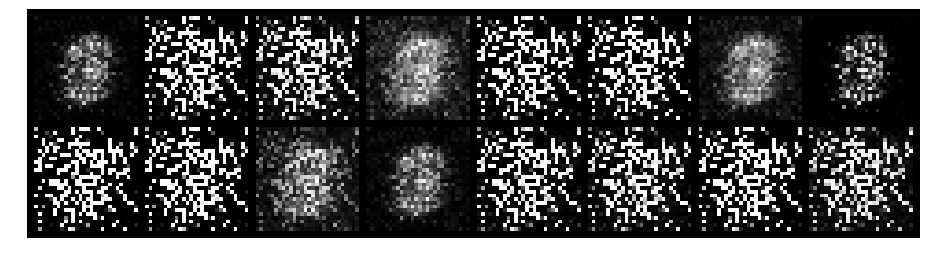

Epoch: [1/50], Batch Num: [200/600]
Discriminator Loss: 0.3577, Generator Loss: 4.5703
D(x): 0.8851, D(G(z)): 0.1541


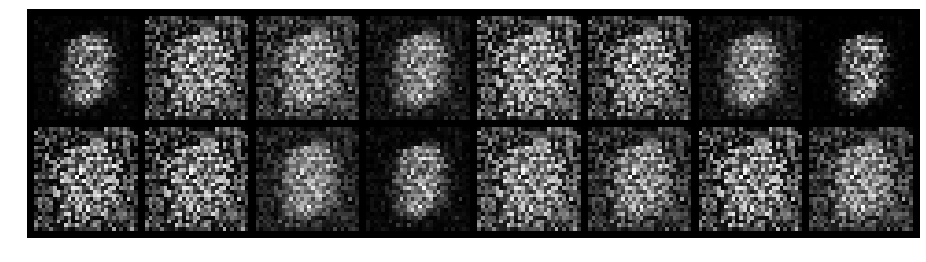

Epoch: [1/50], Batch Num: [300/600]
Discriminator Loss: 1.5524, Generator Loss: 2.0458
D(x): 0.7156, D(G(z)): 0.5652


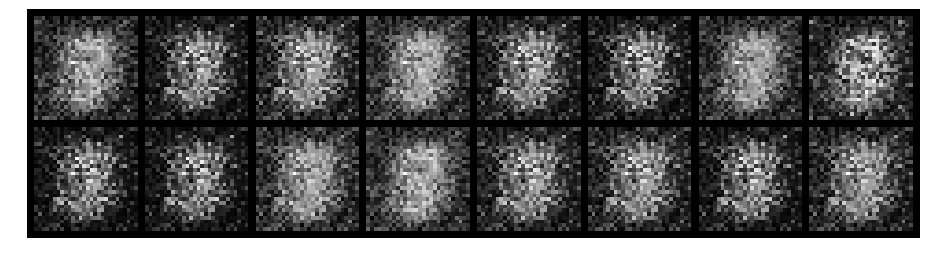

Epoch: [1/50], Batch Num: [400/600]
Discriminator Loss: 1.2912, Generator Loss: 1.3922
D(x): 0.5779, D(G(z)): 0.3715


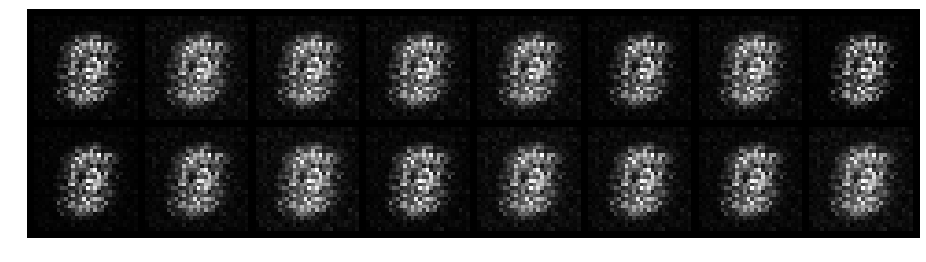

Epoch: [1/50], Batch Num: [500/600]
Discriminator Loss: 1.6425, Generator Loss: 0.8310
D(x): 0.5953, D(G(z)): 0.4642


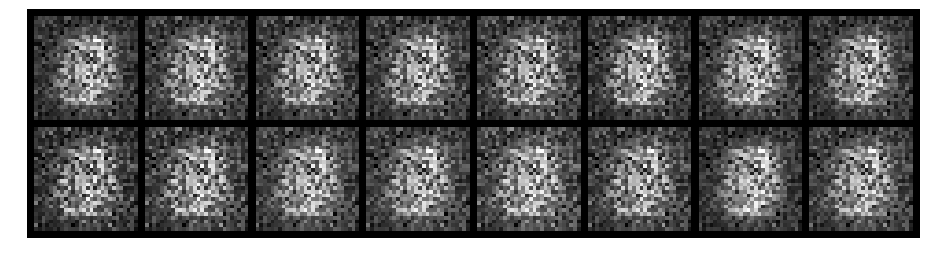

Epoch: [2/50], Batch Num: [0/600]
Discriminator Loss: 0.6012, Generator Loss: 1.9631
D(x): 0.8842, D(G(z)): 0.3197


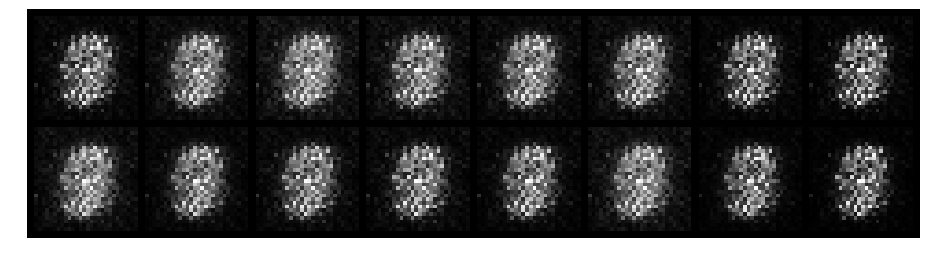

Epoch: [2/50], Batch Num: [100/600]
Discriminator Loss: 0.6149, Generator Loss: 2.2326
D(x): 0.7379, D(G(z)): 0.2117


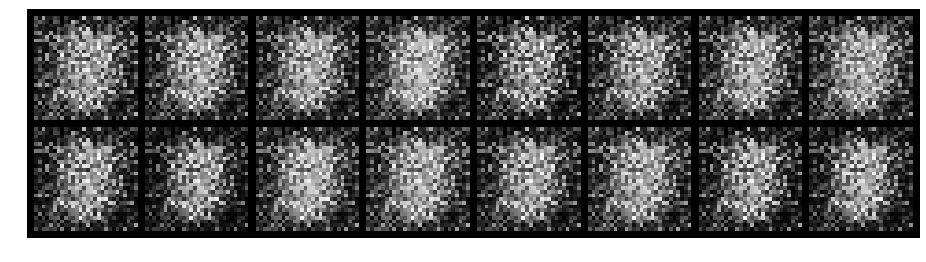

Epoch: [2/50], Batch Num: [200/600]
Discriminator Loss: 0.5136, Generator Loss: 4.3201
D(x): 0.9584, D(G(z)): 0.2301


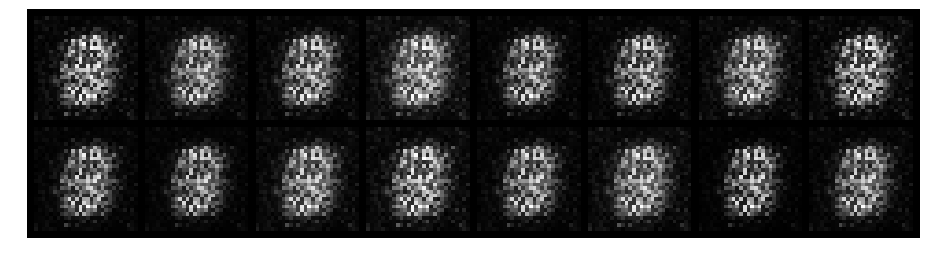

Epoch: [2/50], Batch Num: [300/600]
Discriminator Loss: 0.6904, Generator Loss: 1.4968
D(x): 0.7920, D(G(z)): 0.3224


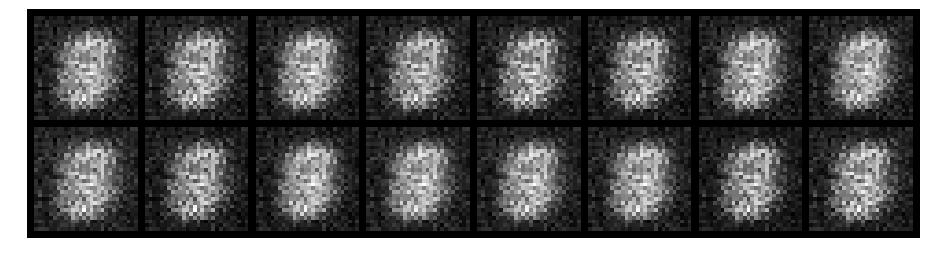

Epoch: [2/50], Batch Num: [400/600]
Discriminator Loss: 0.6759, Generator Loss: 1.6121
D(x): 0.7921, D(G(z)): 0.3080


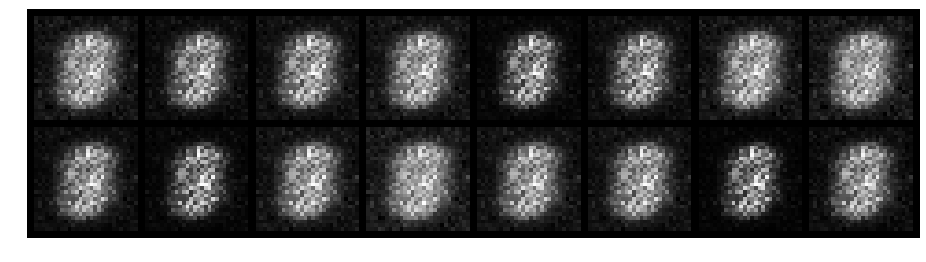

Epoch: [2/50], Batch Num: [500/600]
Discriminator Loss: 0.6784, Generator Loss: 2.0850
D(x): 0.7749, D(G(z)): 0.2695


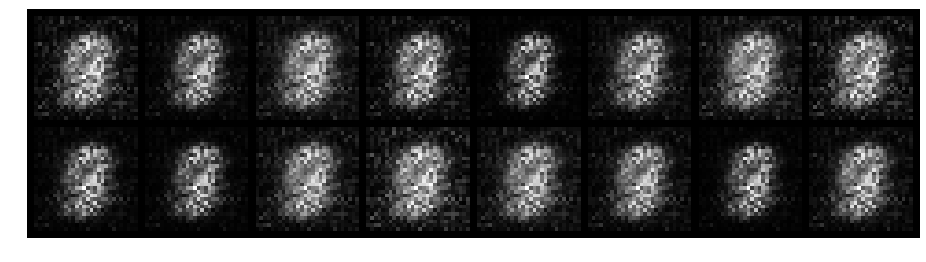

Epoch: [3/50], Batch Num: [0/600]
Discriminator Loss: 0.6260, Generator Loss: 3.1989
D(x): 0.7891, D(G(z)): 0.1843


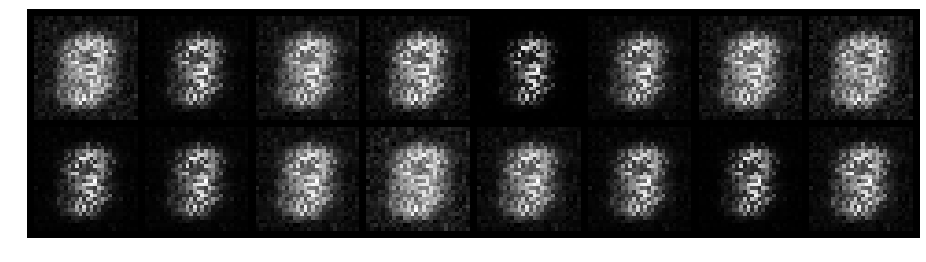

Epoch: [3/50], Batch Num: [100/600]
Discriminator Loss: 0.3278, Generator Loss: 3.5844
D(x): 0.8906, D(G(z)): 0.1159


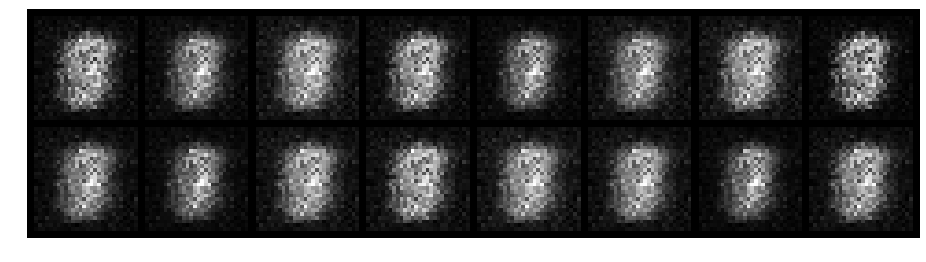

Epoch: [3/50], Batch Num: [200/600]
Discriminator Loss: 0.5090, Generator Loss: 3.4289
D(x): 0.8335, D(G(z)): 0.0697


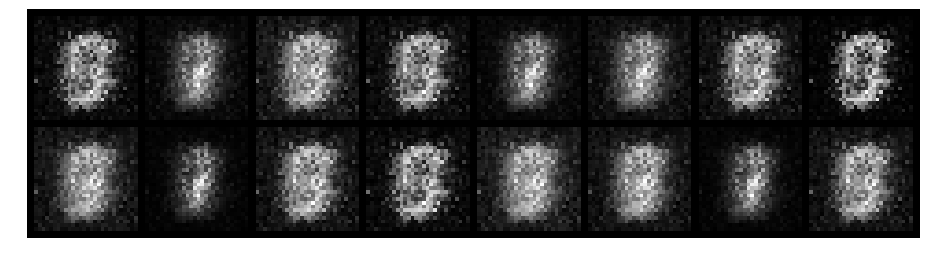

Epoch: [3/50], Batch Num: [300/600]
Discriminator Loss: 0.6216, Generator Loss: 3.0066
D(x): 0.7599, D(G(z)): 0.0874


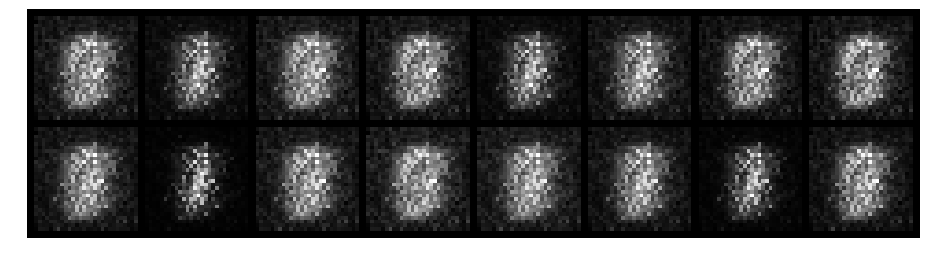

Epoch: [3/50], Batch Num: [400/600]
Discriminator Loss: 0.4268, Generator Loss: 2.3883
D(x): 0.8835, D(G(z)): 0.1180


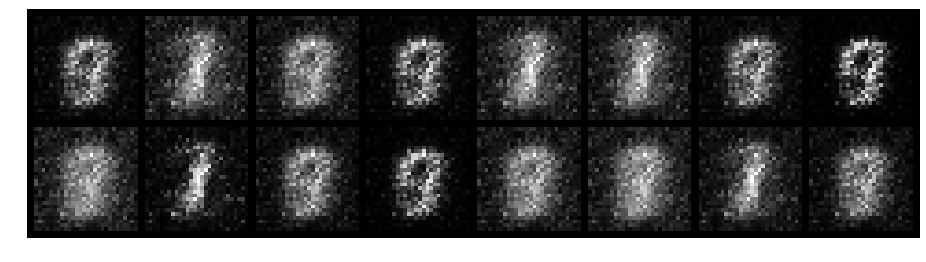

Epoch: [3/50], Batch Num: [500/600]
Discriminator Loss: 0.5464, Generator Loss: 2.1945
D(x): 0.8720, D(G(z)): 0.1979


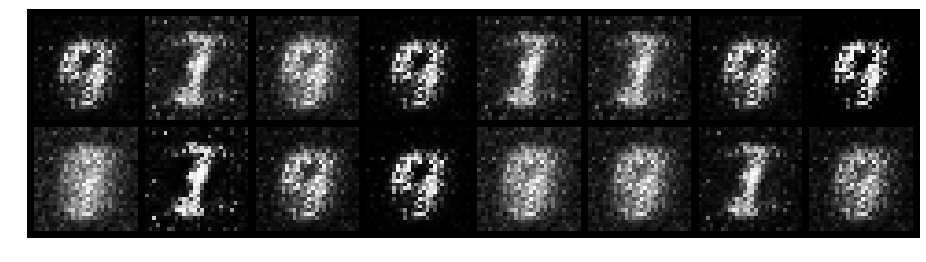

Epoch: [4/50], Batch Num: [0/600]
Discriminator Loss: 0.2913, Generator Loss: 3.9098
D(x): 0.9546, D(G(z)): 0.1364


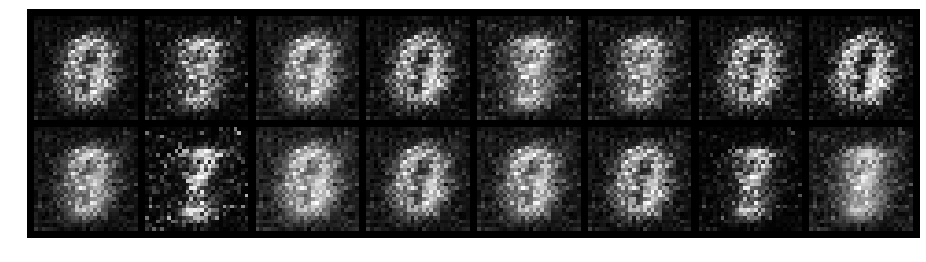

Epoch: [4/50], Batch Num: [100/600]
Discriminator Loss: 0.3510, Generator Loss: 4.6753
D(x): 0.9063, D(G(z)): 0.1292


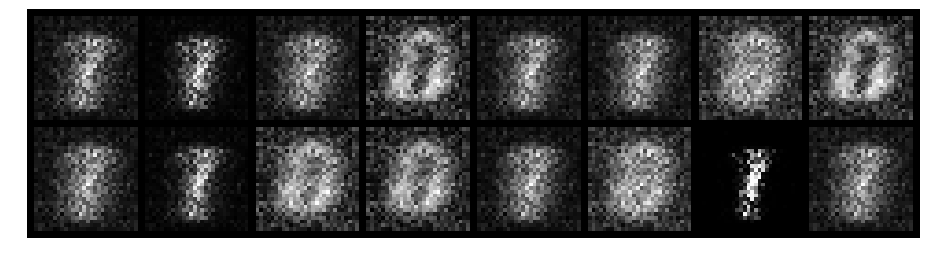

Epoch: [4/50], Batch Num: [200/600]
Discriminator Loss: 0.1694, Generator Loss: 3.0196
D(x): 0.9594, D(G(z)): 0.0874


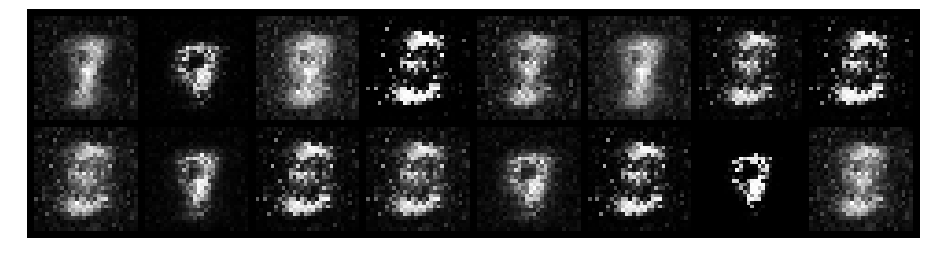

Epoch: [4/50], Batch Num: [300/600]
Discriminator Loss: 0.8014, Generator Loss: 3.9890
D(x): 0.8322, D(G(z)): 0.2230


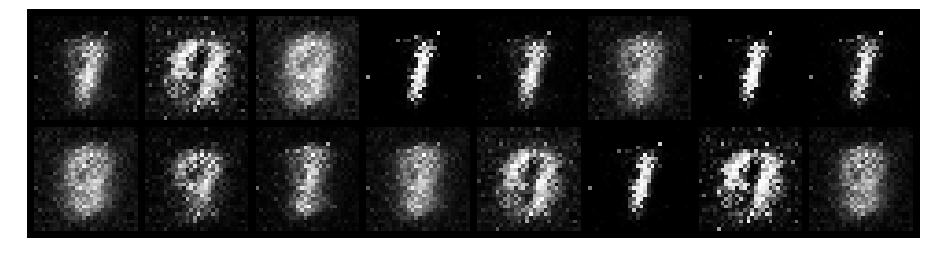

Epoch: [4/50], Batch Num: [400/600]
Discriminator Loss: 0.3598, Generator Loss: 3.2593
D(x): 0.8961, D(G(z)): 0.1438


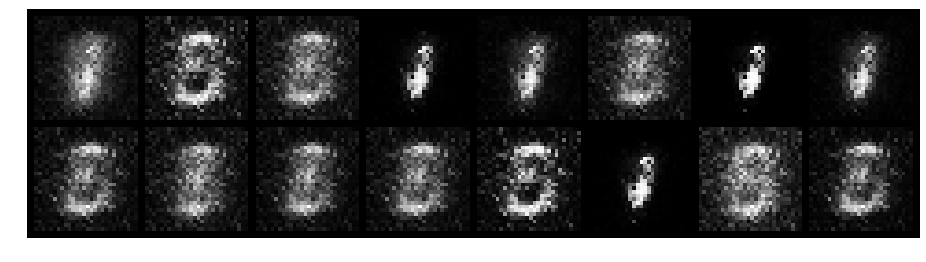

Epoch: [4/50], Batch Num: [500/600]
Discriminator Loss: 0.2673, Generator Loss: 4.1845
D(x): 0.9146, D(G(z)): 0.0702


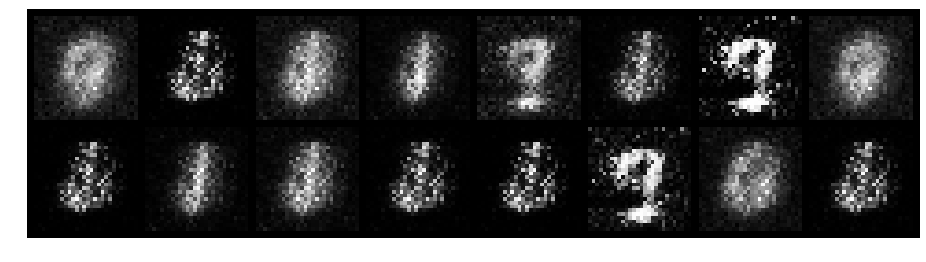

Epoch: [5/50], Batch Num: [0/600]
Discriminator Loss: 0.4547, Generator Loss: 2.6013
D(x): 0.8953, D(G(z)): 0.1954


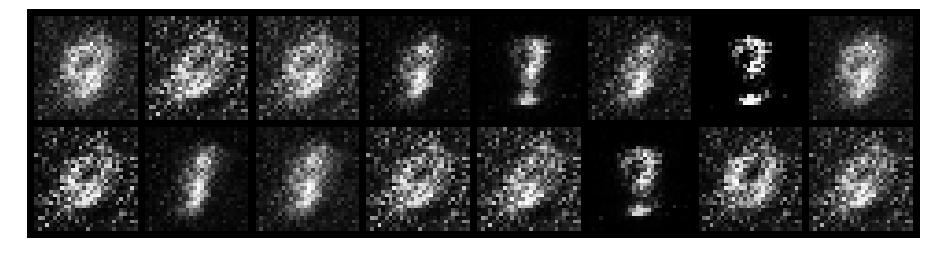

Epoch: [5/50], Batch Num: [100/600]
Discriminator Loss: 0.4112, Generator Loss: 2.3789
D(x): 0.8670, D(G(z)): 0.1222


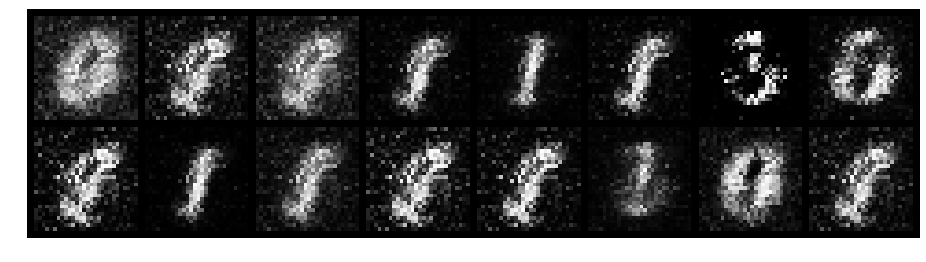

Epoch: [5/50], Batch Num: [200/600]
Discriminator Loss: 0.3621, Generator Loss: 3.3152
D(x): 0.8942, D(G(z)): 0.1319


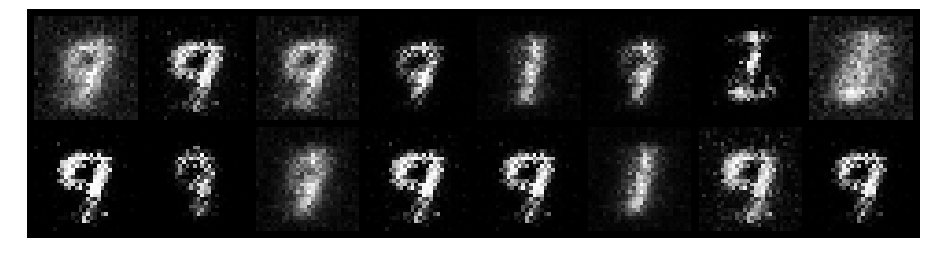

Epoch: [5/50], Batch Num: [300/600]
Discriminator Loss: 0.3064, Generator Loss: 3.5868
D(x): 0.8894, D(G(z)): 0.0713


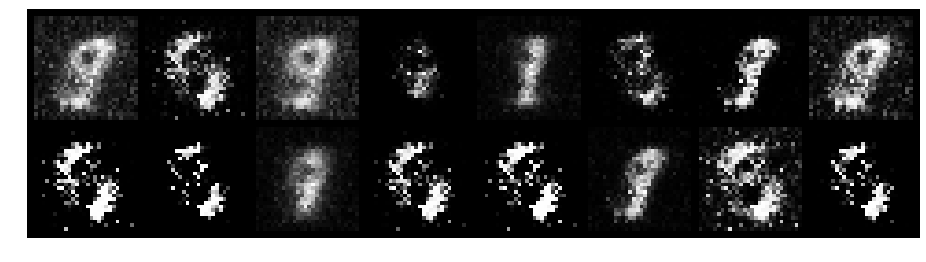

Epoch: [5/50], Batch Num: [400/600]
Discriminator Loss: 0.5435, Generator Loss: 3.0579
D(x): 0.8233, D(G(z)): 0.1284


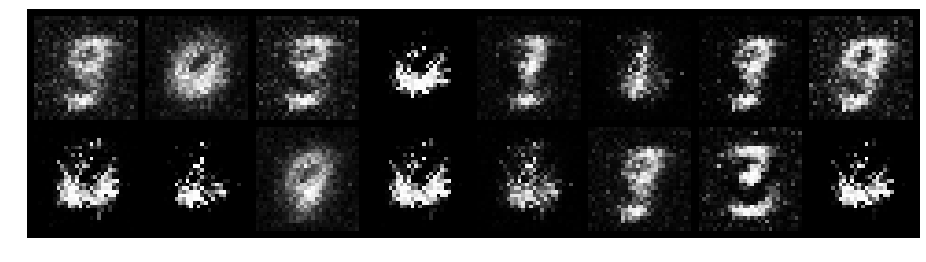

Epoch: [5/50], Batch Num: [500/600]
Discriminator Loss: 0.5042, Generator Loss: 2.9489
D(x): 0.8135, D(G(z)): 0.1086


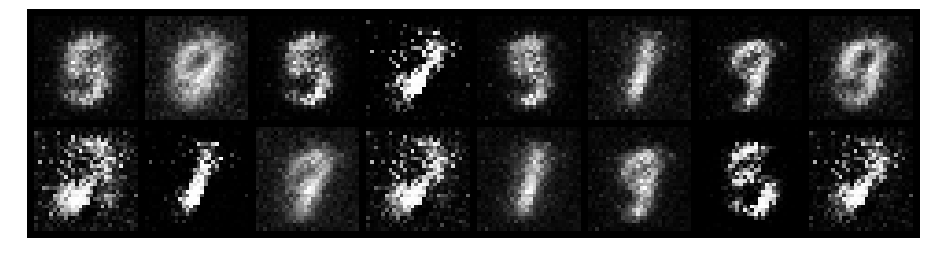

Epoch: [6/50], Batch Num: [0/600]
Discriminator Loss: 0.4322, Generator Loss: 2.8453
D(x): 0.8533, D(G(z)): 0.1264


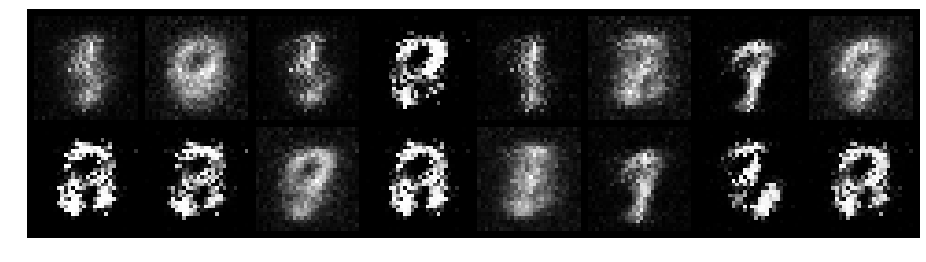

Epoch: [6/50], Batch Num: [100/600]
Discriminator Loss: 0.4057, Generator Loss: 2.8055
D(x): 0.8529, D(G(z)): 0.1246


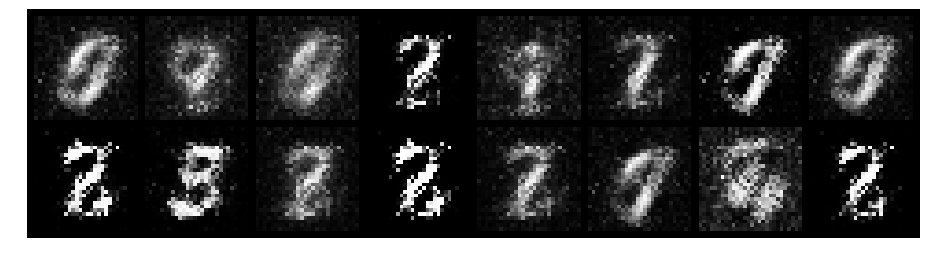

Epoch: [6/50], Batch Num: [200/600]
Discriminator Loss: 0.6553, Generator Loss: 3.2623
D(x): 0.7830, D(G(z)): 0.1095


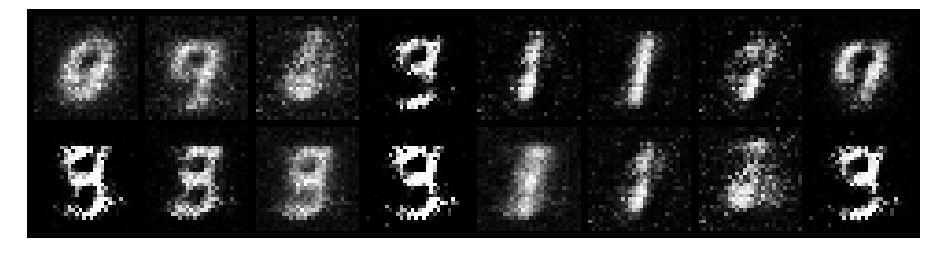

Epoch: [6/50], Batch Num: [300/600]
Discriminator Loss: 0.6534, Generator Loss: 2.4105
D(x): 0.8111, D(G(z)): 0.1614


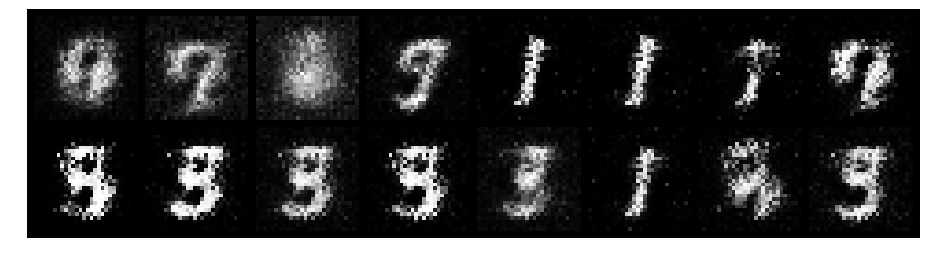

Epoch: [6/50], Batch Num: [400/600]
Discriminator Loss: 0.5461, Generator Loss: 2.5851
D(x): 0.7871, D(G(z)): 0.0803


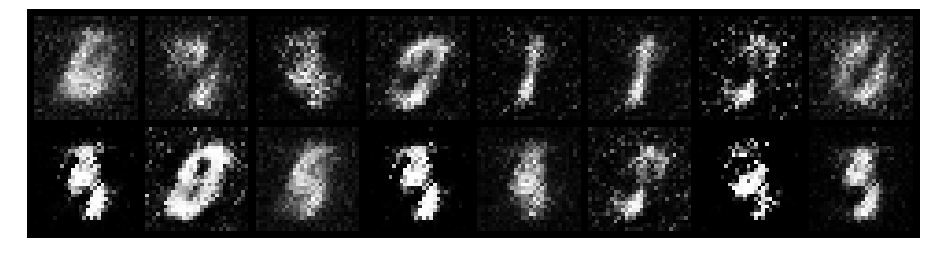

Epoch: [6/50], Batch Num: [500/600]
Discriminator Loss: 0.5421, Generator Loss: 2.4169
D(x): 0.8308, D(G(z)): 0.1761


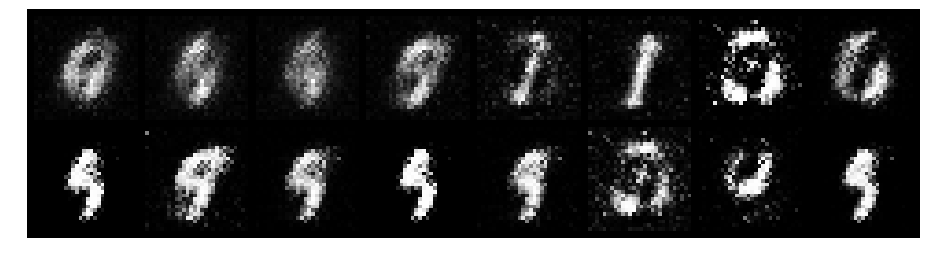

Epoch: [7/50], Batch Num: [0/600]
Discriminator Loss: 0.6201, Generator Loss: 2.1022
D(x): 0.8147, D(G(z)): 0.1921


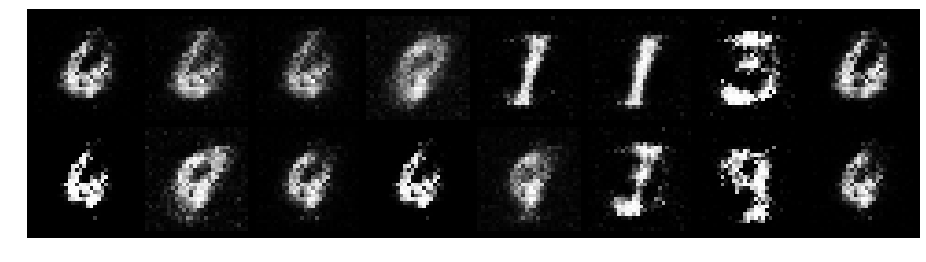

Epoch: [7/50], Batch Num: [100/600]
Discriminator Loss: 0.7373, Generator Loss: 1.8803
D(x): 0.7789, D(G(z)): 0.2298


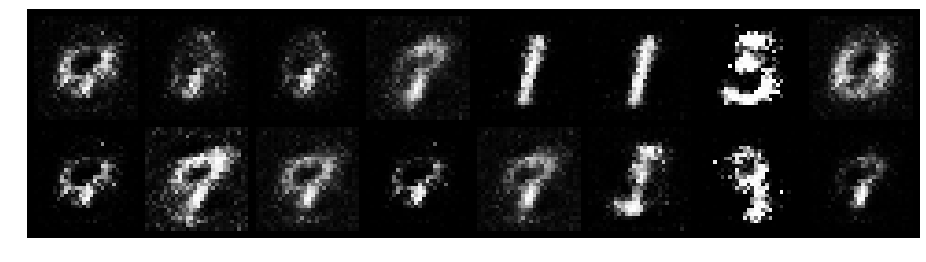

Epoch: [7/50], Batch Num: [200/600]
Discriminator Loss: 0.2670, Generator Loss: 3.0089
D(x): 0.9139, D(G(z)): 0.1038


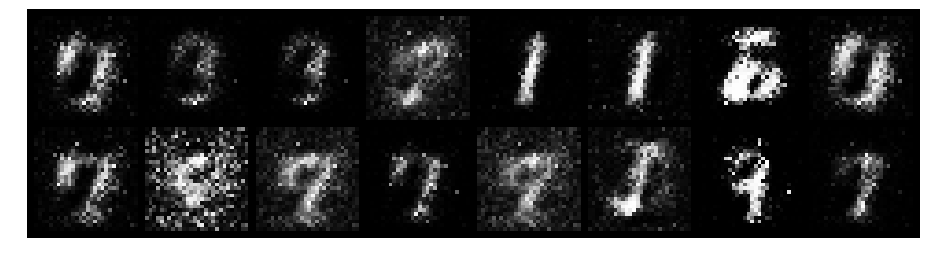

Epoch: [7/50], Batch Num: [300/600]
Discriminator Loss: 0.2892, Generator Loss: 3.5044
D(x): 0.8990, D(G(z)): 0.0894


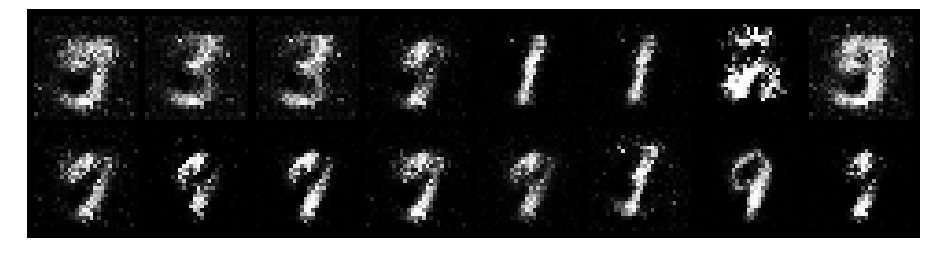

Epoch: [7/50], Batch Num: [400/600]
Discriminator Loss: 0.8945, Generator Loss: 2.8628
D(x): 0.7550, D(G(z)): 0.2069


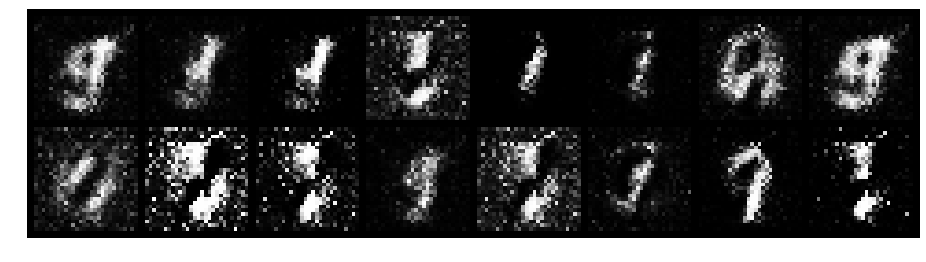

Epoch: [7/50], Batch Num: [500/600]
Discriminator Loss: 0.4594, Generator Loss: 2.4345
D(x): 0.8649, D(G(z)): 0.1732


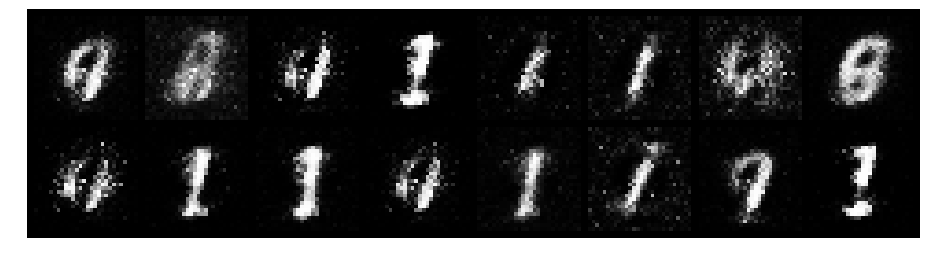

Epoch: [8/50], Batch Num: [0/600]
Discriminator Loss: 0.4164, Generator Loss: 3.6038
D(x): 0.8850, D(G(z)): 0.1345


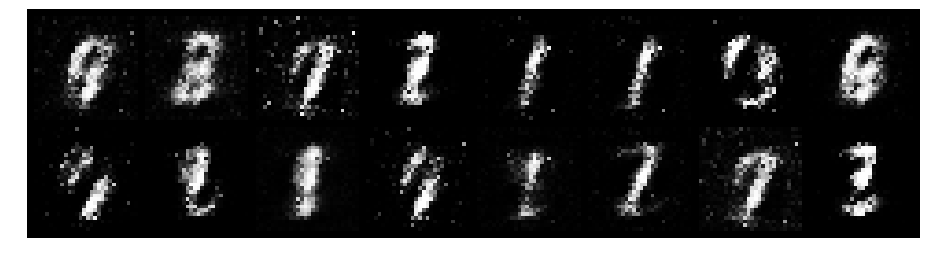

Epoch: [8/50], Batch Num: [100/600]
Discriminator Loss: 0.4566, Generator Loss: 2.7406
D(x): 0.8600, D(G(z)): 0.1444


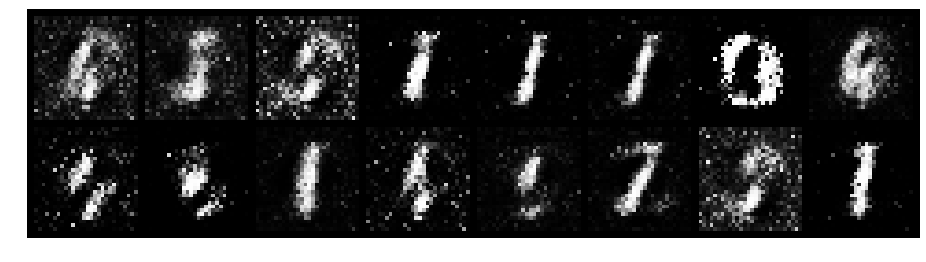

Epoch: [8/50], Batch Num: [200/600]
Discriminator Loss: 0.5253, Generator Loss: 2.6030
D(x): 0.8779, D(G(z)): 0.2192


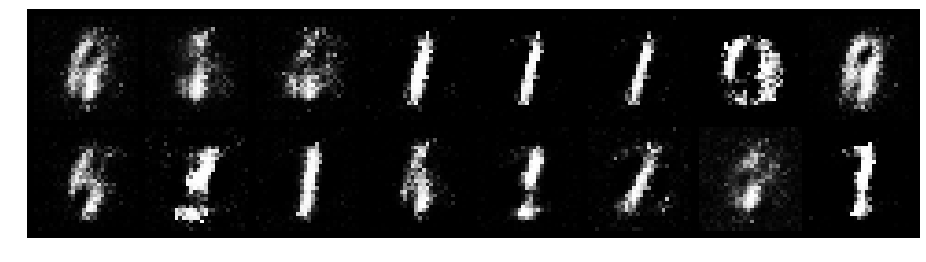

Epoch: [8/50], Batch Num: [300/600]
Discriminator Loss: 0.3736, Generator Loss: 3.4077
D(x): 0.8878, D(G(z)): 0.1333


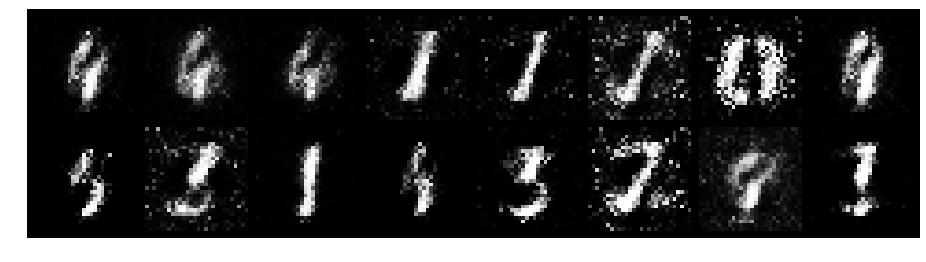

Epoch: [8/50], Batch Num: [400/600]
Discriminator Loss: 0.5631, Generator Loss: 2.4471
D(x): 0.8200, D(G(z)): 0.1626


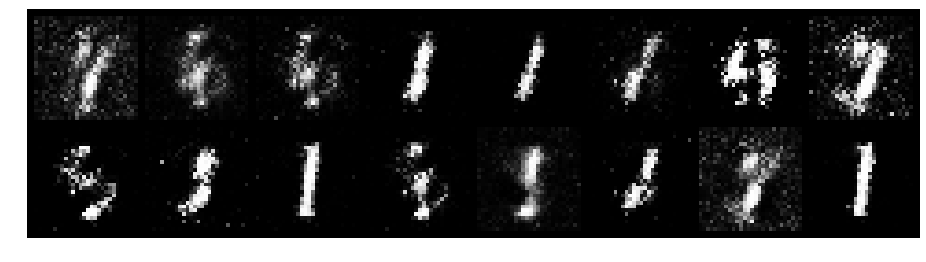

Epoch: [8/50], Batch Num: [500/600]
Discriminator Loss: 0.3738, Generator Loss: 2.6206
D(x): 0.8876, D(G(z)): 0.1527


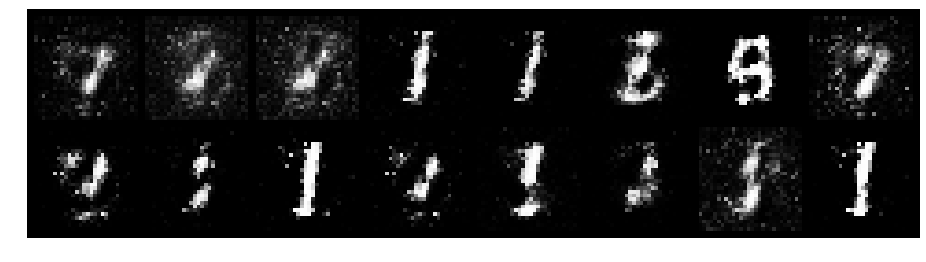

Epoch: [9/50], Batch Num: [0/600]
Discriminator Loss: 0.6416, Generator Loss: 2.1437
D(x): 0.8073, D(G(z)): 0.1751


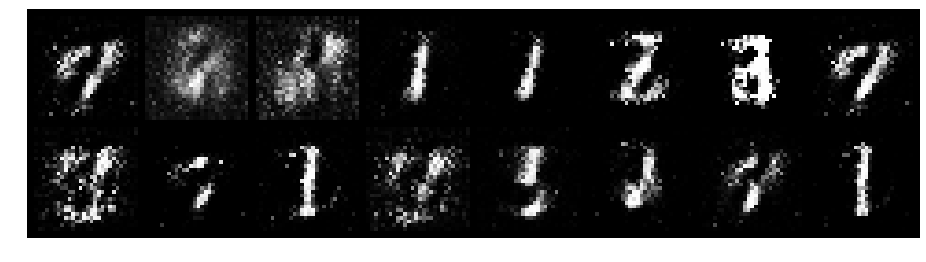

Epoch: [9/50], Batch Num: [100/600]
Discriminator Loss: 0.3546, Generator Loss: 2.8386
D(x): 0.8777, D(G(z)): 0.1219


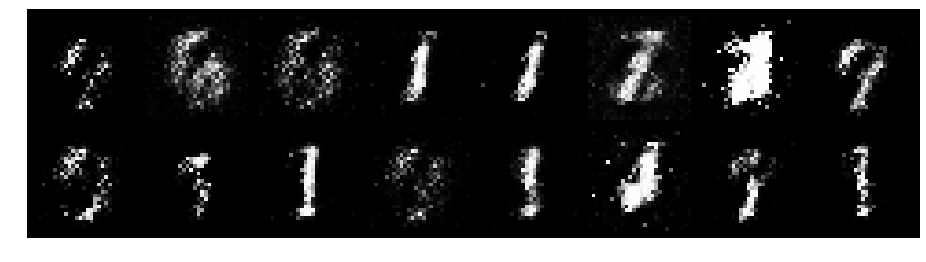

Epoch: [9/50], Batch Num: [200/600]
Discriminator Loss: 0.5563, Generator Loss: 2.0200
D(x): 0.8546, D(G(z)): 0.2724


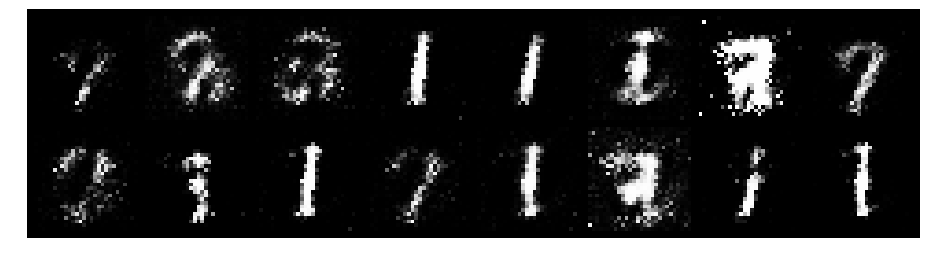

Epoch: [9/50], Batch Num: [300/600]
Discriminator Loss: 0.5866, Generator Loss: 2.7259
D(x): 0.7964, D(G(z)): 0.1763


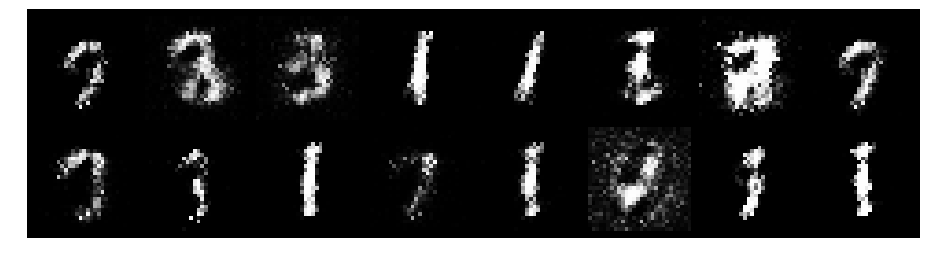

Epoch: [9/50], Batch Num: [400/600]
Discriminator Loss: 0.3839, Generator Loss: 3.8932
D(x): 0.8346, D(G(z)): 0.0856


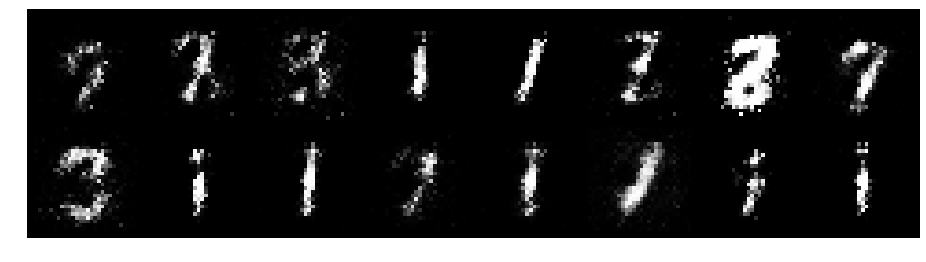

Epoch: [9/50], Batch Num: [500/600]
Discriminator Loss: 0.5377, Generator Loss: 2.6358
D(x): 0.7881, D(G(z)): 0.1273


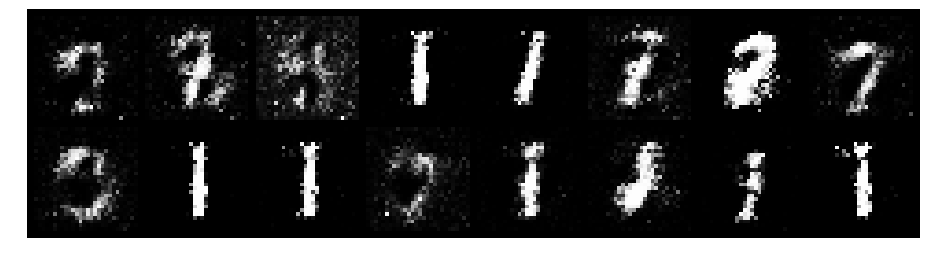

Epoch: [10/50], Batch Num: [0/600]
Discriminator Loss: 0.6947, Generator Loss: 2.5389
D(x): 0.7651, D(G(z)): 0.2014


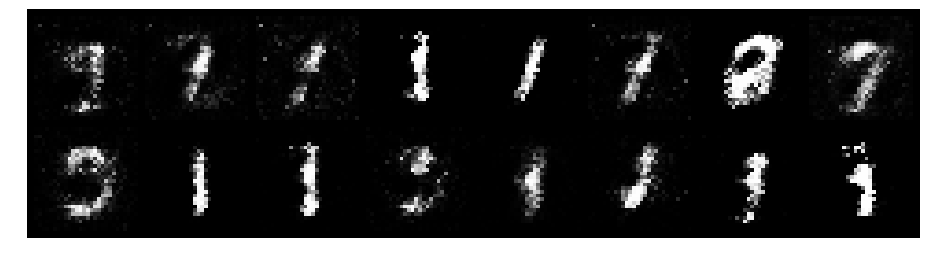

Epoch: [10/50], Batch Num: [100/600]
Discriminator Loss: 0.8246, Generator Loss: 2.2190
D(x): 0.6565, D(G(z)): 0.1203


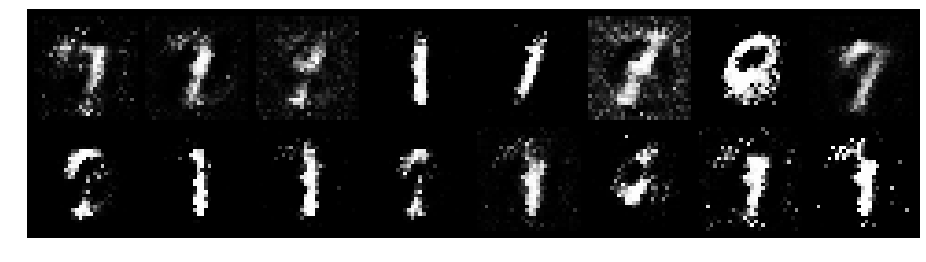

Epoch: [10/50], Batch Num: [200/600]
Discriminator Loss: 0.6202, Generator Loss: 2.3471
D(x): 0.7810, D(G(z)): 0.1915


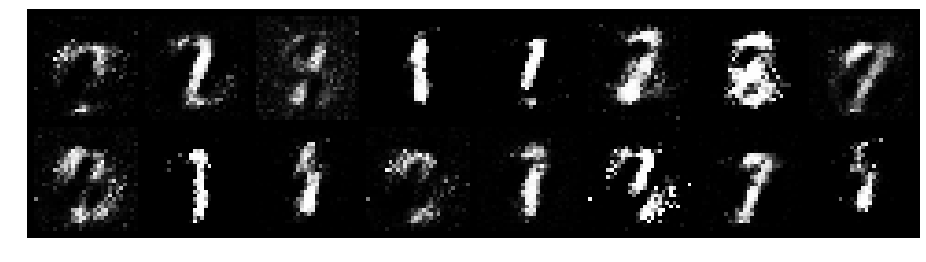

Epoch: [10/50], Batch Num: [300/600]
Discriminator Loss: 0.6923, Generator Loss: 1.7206
D(x): 0.8086, D(G(z)): 0.2551


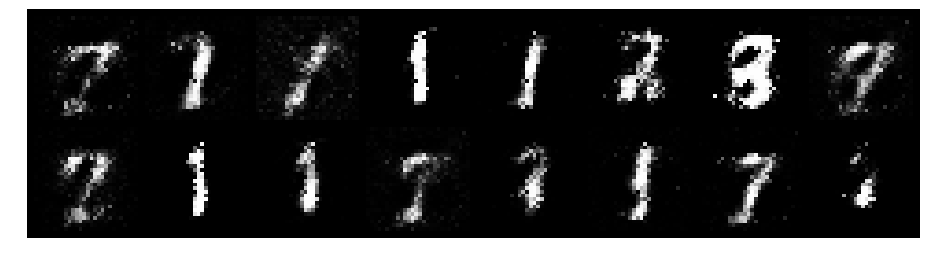

Epoch: [10/50], Batch Num: [400/600]
Discriminator Loss: 0.6563, Generator Loss: 1.9233
D(x): 0.8316, D(G(z)): 0.2549


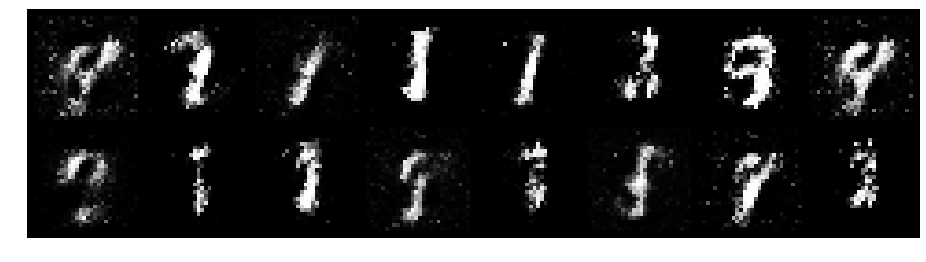

Epoch: [10/50], Batch Num: [500/600]
Discriminator Loss: 0.6073, Generator Loss: 2.2430
D(x): 0.8273, D(G(z)): 0.2048


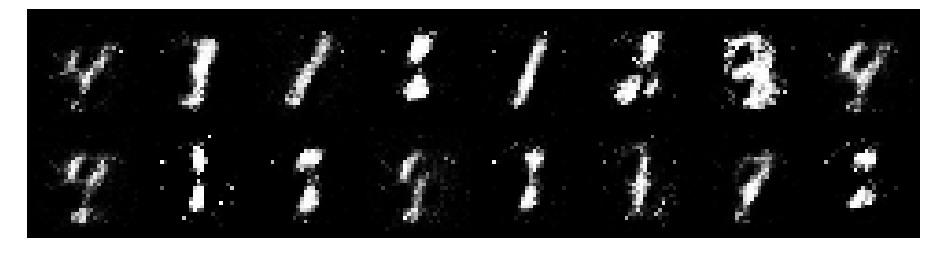

Epoch: [11/50], Batch Num: [0/600]
Discriminator Loss: 0.7762, Generator Loss: 2.1988
D(x): 0.7540, D(G(z)): 0.1670


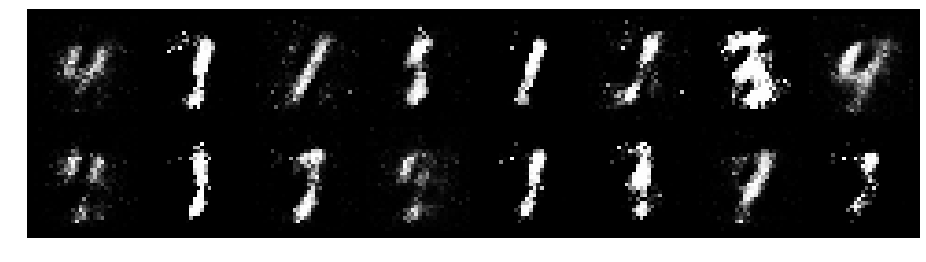

Epoch: [11/50], Batch Num: [100/600]
Discriminator Loss: 0.5942, Generator Loss: 2.1306
D(x): 0.8391, D(G(z)): 0.2388


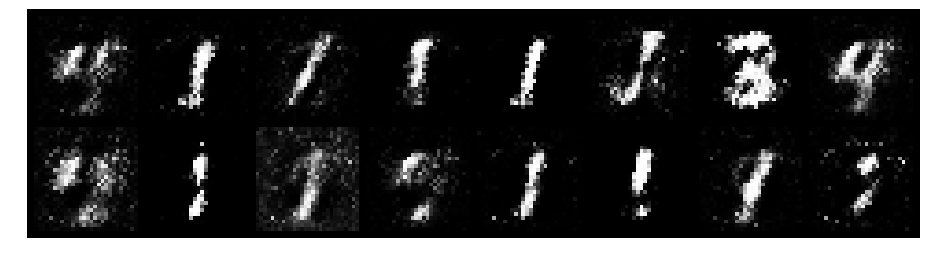

Epoch: [11/50], Batch Num: [200/600]
Discriminator Loss: 0.4520, Generator Loss: 2.7148
D(x): 0.8386, D(G(z)): 0.1279


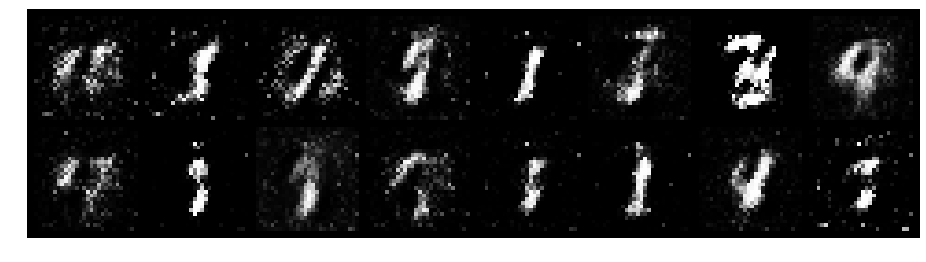

Epoch: [11/50], Batch Num: [300/600]
Discriminator Loss: 0.5317, Generator Loss: 2.5386
D(x): 0.8361, D(G(z)): 0.1872


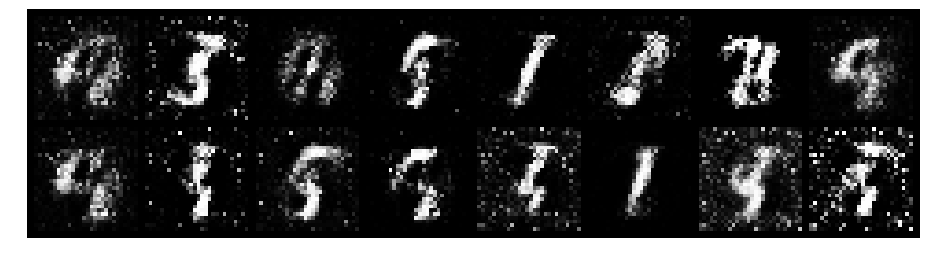

Epoch: [11/50], Batch Num: [400/600]
Discriminator Loss: 0.5579, Generator Loss: 2.2975
D(x): 0.8272, D(G(z)): 0.1994


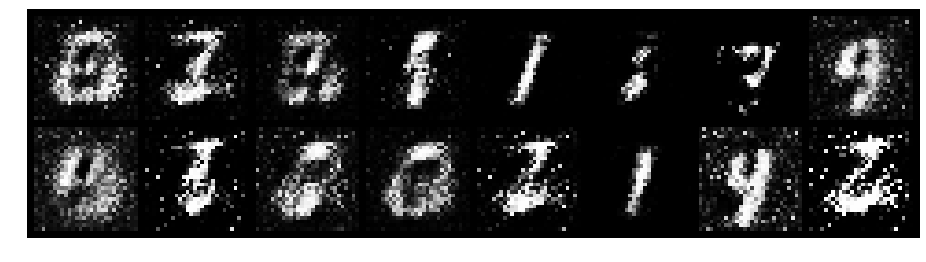

Epoch: [11/50], Batch Num: [500/600]
Discriminator Loss: 0.5455, Generator Loss: 2.3792
D(x): 0.7868, D(G(z)): 0.1707


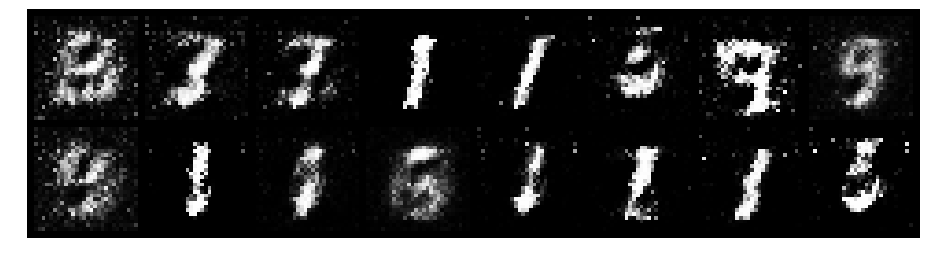

Epoch: [12/50], Batch Num: [0/600]
Discriminator Loss: 0.3914, Generator Loss: 2.6450
D(x): 0.8956, D(G(z)): 0.1816


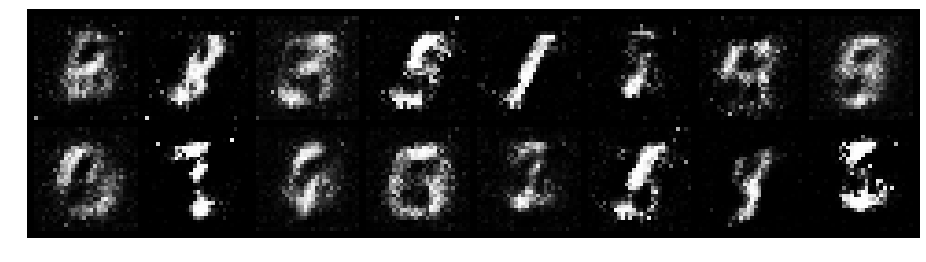

Epoch: [12/50], Batch Num: [100/600]
Discriminator Loss: 0.6082, Generator Loss: 2.4529
D(x): 0.7533, D(G(z)): 0.1200


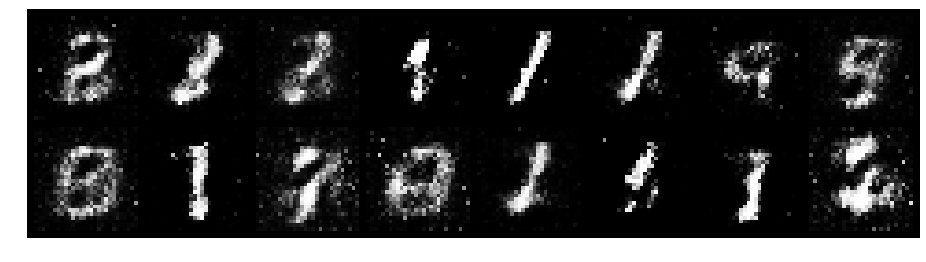

Epoch: [12/50], Batch Num: [200/600]
Discriminator Loss: 0.6236, Generator Loss: 2.1107
D(x): 0.8432, D(G(z)): 0.2432


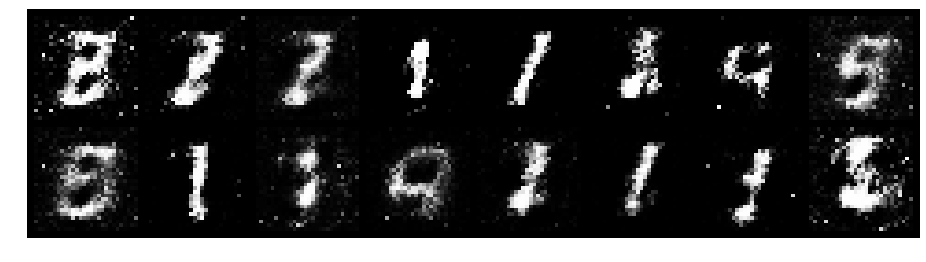

Epoch: [12/50], Batch Num: [300/600]
Discriminator Loss: 0.7024, Generator Loss: 2.6452
D(x): 0.7686, D(G(z)): 0.2268


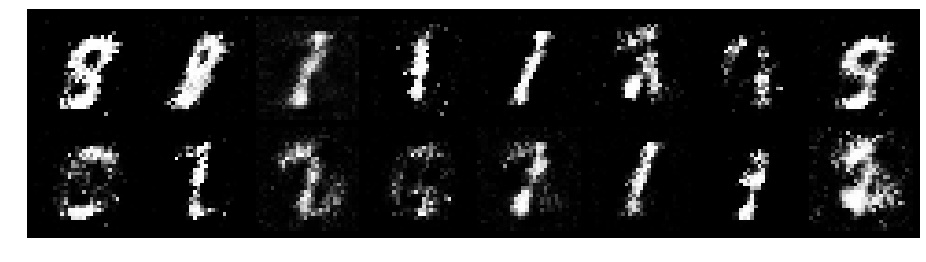

Epoch: [12/50], Batch Num: [400/600]
Discriminator Loss: 0.7205, Generator Loss: 2.2519
D(x): 0.7321, D(G(z)): 0.1530


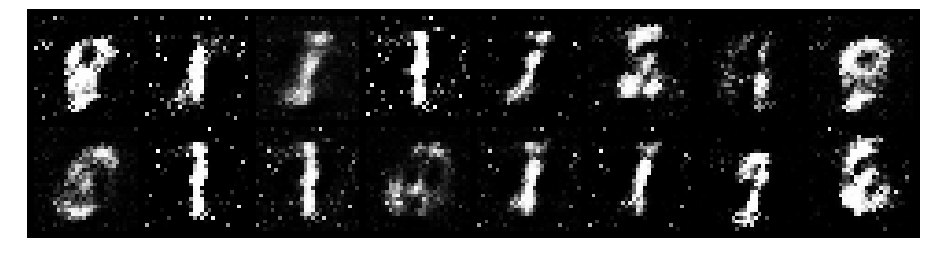

Epoch: [12/50], Batch Num: [500/600]
Discriminator Loss: 0.5736, Generator Loss: 2.2006
D(x): 0.8458, D(G(z)): 0.2324


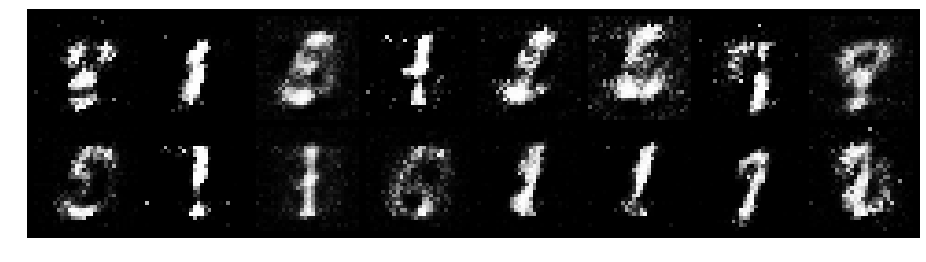

Epoch: [13/50], Batch Num: [0/600]
Discriminator Loss: 0.6798, Generator Loss: 2.5883
D(x): 0.7600, D(G(z)): 0.1510


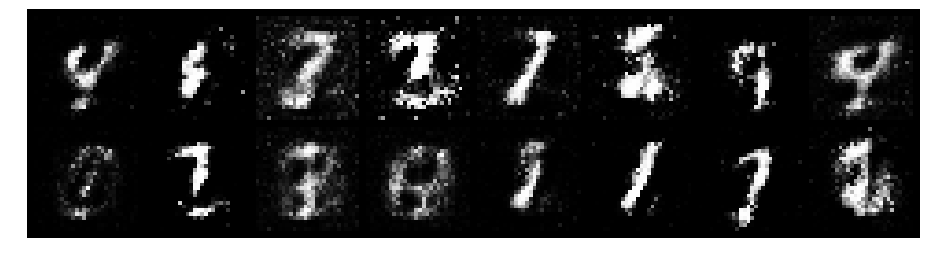

Epoch: [13/50], Batch Num: [100/600]
Discriminator Loss: 0.6608, Generator Loss: 2.1562
D(x): 0.7241, D(G(z)): 0.1549


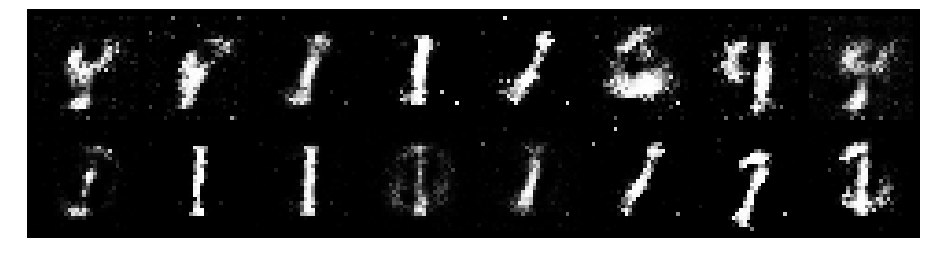

Epoch: [13/50], Batch Num: [200/600]
Discriminator Loss: 0.7328, Generator Loss: 2.1312
D(x): 0.7745, D(G(z)): 0.2416


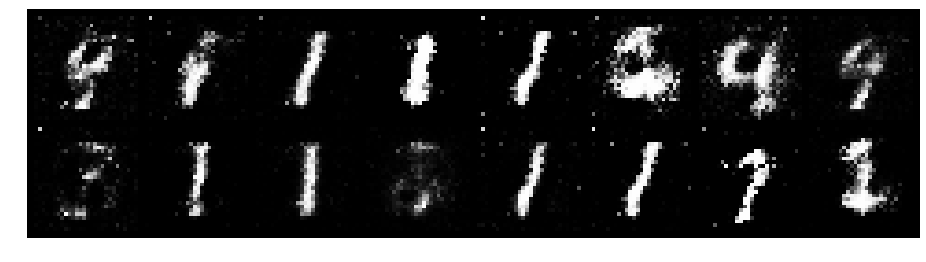

Epoch: [13/50], Batch Num: [300/600]
Discriminator Loss: 0.6656, Generator Loss: 2.0407
D(x): 0.8095, D(G(z)): 0.2117


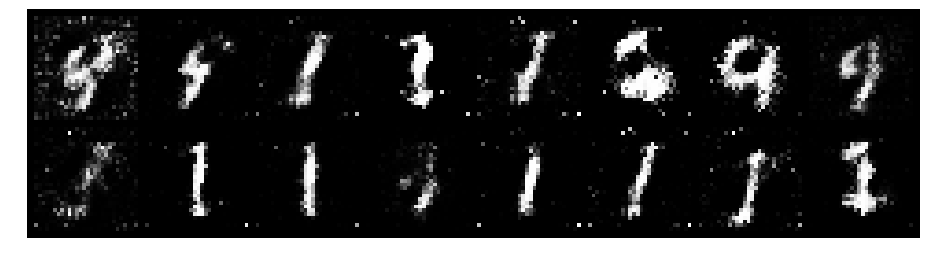

Epoch: [13/50], Batch Num: [400/600]
Discriminator Loss: 0.8076, Generator Loss: 2.1266
D(x): 0.7045, D(G(z)): 0.1858


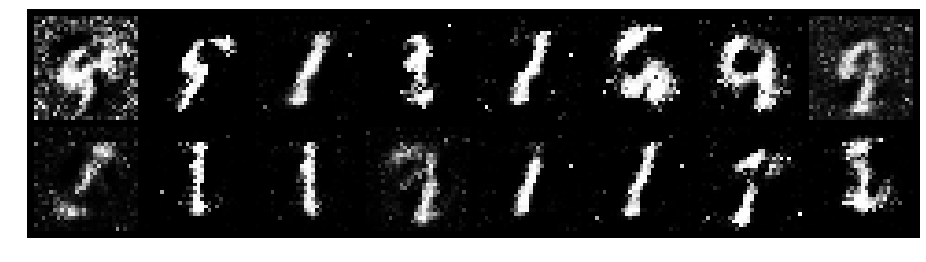

Epoch: [13/50], Batch Num: [500/600]
Discriminator Loss: 0.9387, Generator Loss: 1.1689
D(x): 0.8263, D(G(z)): 0.4162


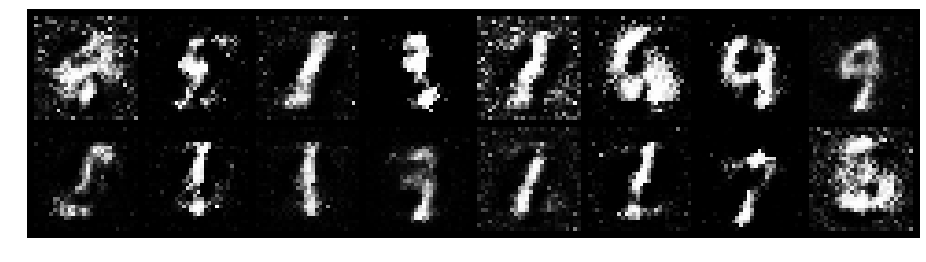

Epoch: [14/50], Batch Num: [0/600]
Discriminator Loss: 1.0510, Generator Loss: 1.8709
D(x): 0.8174, D(G(z)): 0.4239


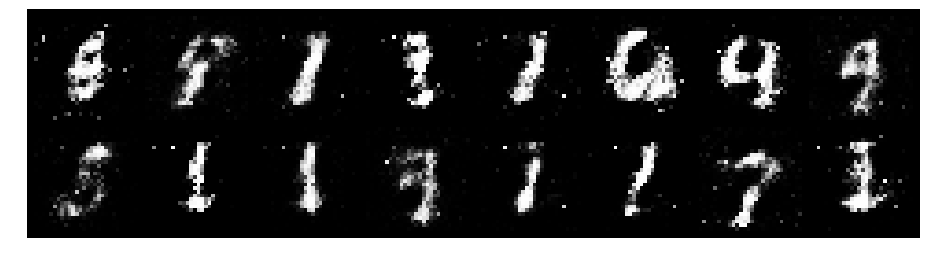

Epoch: [14/50], Batch Num: [100/600]
Discriminator Loss: 0.7713, Generator Loss: 2.1544
D(x): 0.7029, D(G(z)): 0.2081


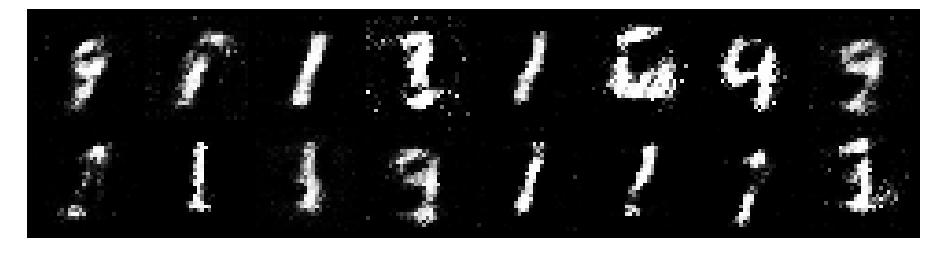

Epoch: [14/50], Batch Num: [200/600]
Discriminator Loss: 0.7418, Generator Loss: 1.8919
D(x): 0.7213, D(G(z)): 0.1953


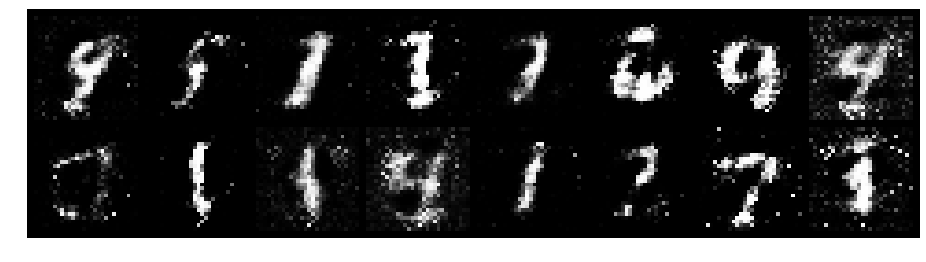

Epoch: [14/50], Batch Num: [300/600]
Discriminator Loss: 0.9738, Generator Loss: 2.1830
D(x): 0.7049, D(G(z)): 0.2740


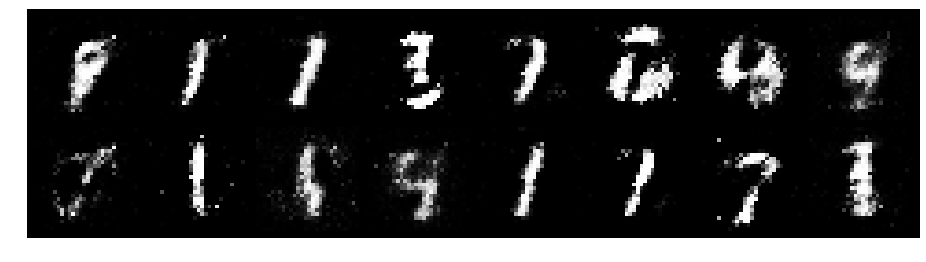

Epoch: [14/50], Batch Num: [400/600]
Discriminator Loss: 0.7972, Generator Loss: 1.7388
D(x): 0.7691, D(G(z)): 0.3131


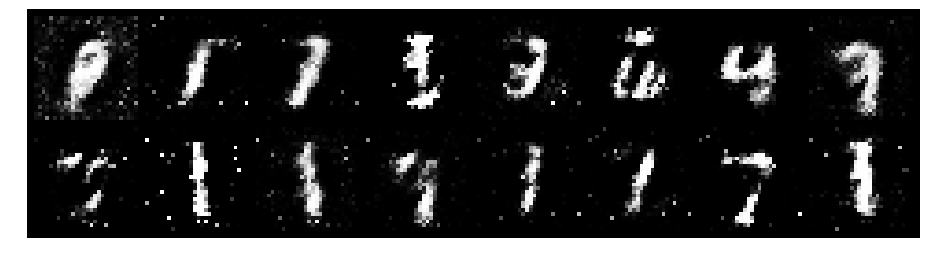

Epoch: [14/50], Batch Num: [500/600]
Discriminator Loss: 0.9319, Generator Loss: 1.7896
D(x): 0.6921, D(G(z)): 0.2447


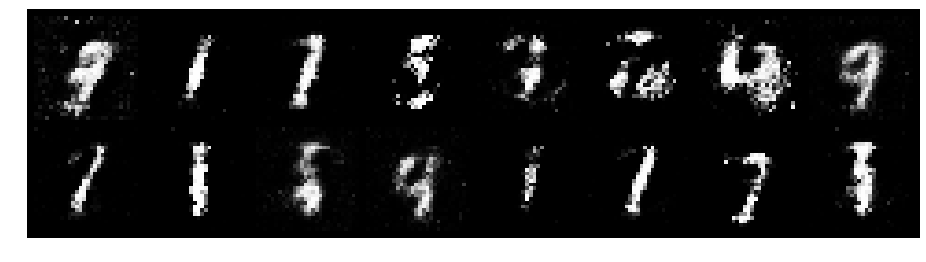

Epoch: [15/50], Batch Num: [0/600]
Discriminator Loss: 0.5669, Generator Loss: 2.2977
D(x): 0.7910, D(G(z)): 0.1659


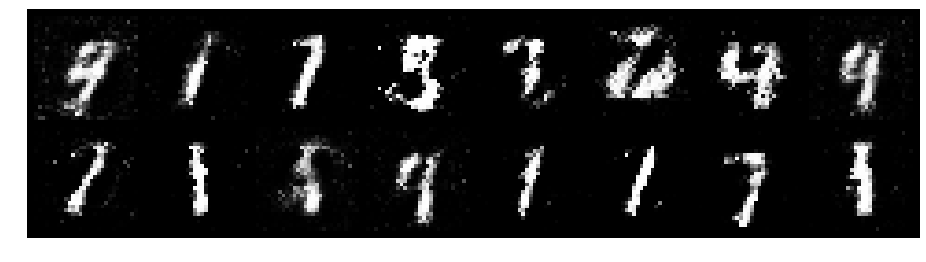

Epoch: [15/50], Batch Num: [100/600]
Discriminator Loss: 0.6576, Generator Loss: 2.6846
D(x): 0.7887, D(G(z)): 0.2054


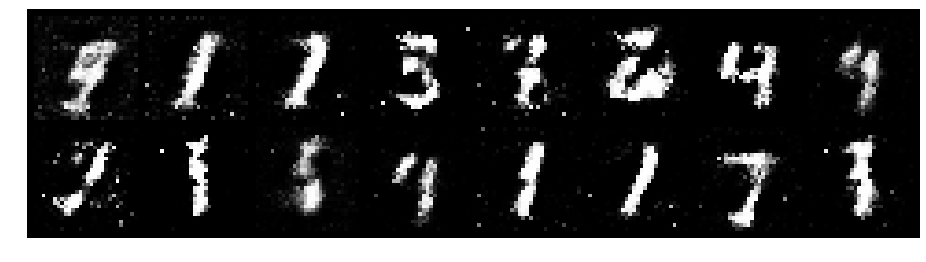

Epoch: [15/50], Batch Num: [200/600]
Discriminator Loss: 0.5147, Generator Loss: 2.0753
D(x): 0.8229, D(G(z)): 0.2116


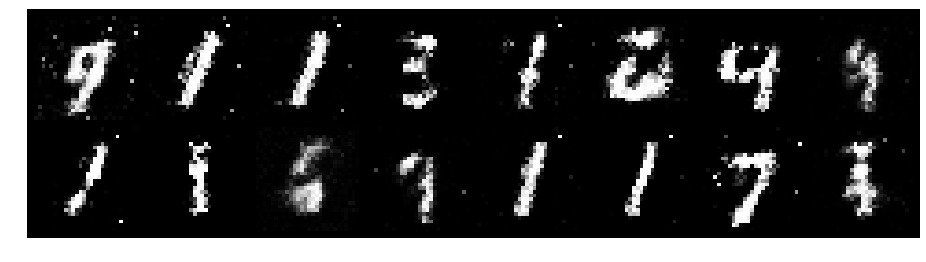

Epoch: [15/50], Batch Num: [300/600]
Discriminator Loss: 0.5904, Generator Loss: 2.2824
D(x): 0.7827, D(G(z)): 0.1922


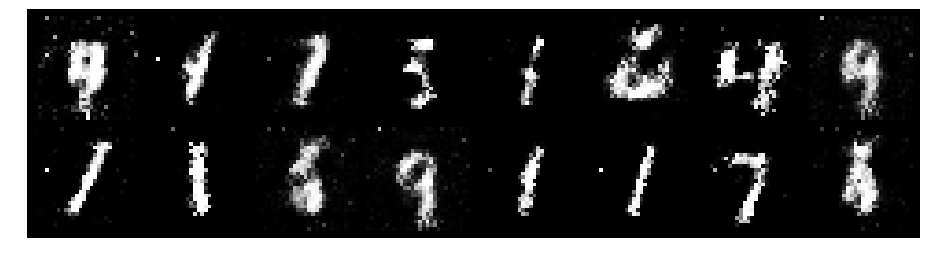

Epoch: [15/50], Batch Num: [400/600]
Discriminator Loss: 0.8608, Generator Loss: 1.7570
D(x): 0.7219, D(G(z)): 0.2584


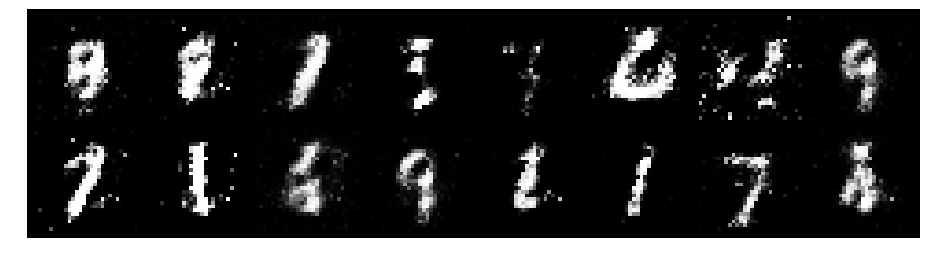

Epoch: [15/50], Batch Num: [500/600]
Discriminator Loss: 0.7761, Generator Loss: 2.2055
D(x): 0.7618, D(G(z)): 0.2617


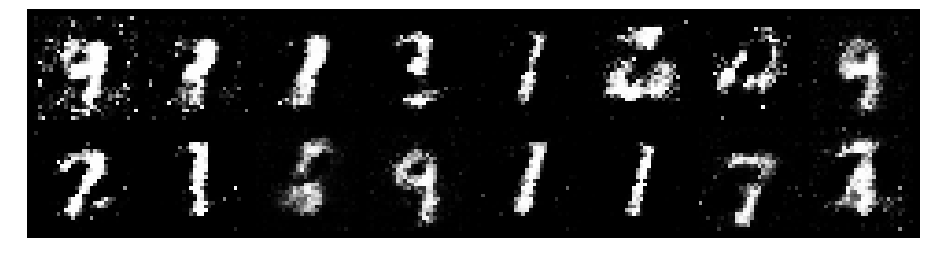

Epoch: [16/50], Batch Num: [0/600]
Discriminator Loss: 0.8264, Generator Loss: 2.1369
D(x): 0.6970, D(G(z)): 0.2240


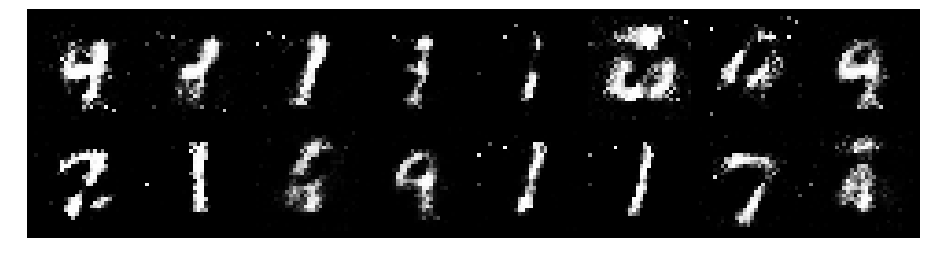

Epoch: [16/50], Batch Num: [100/600]
Discriminator Loss: 0.5915, Generator Loss: 2.1196
D(x): 0.7901, D(G(z)): 0.1969


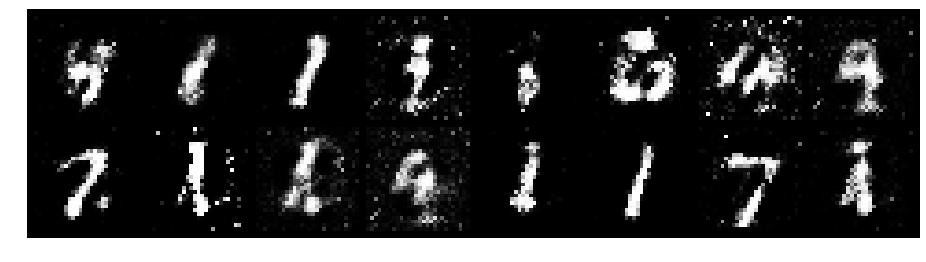

Epoch: [16/50], Batch Num: [200/600]
Discriminator Loss: 0.9020, Generator Loss: 1.9058
D(x): 0.6758, D(G(z)): 0.2616


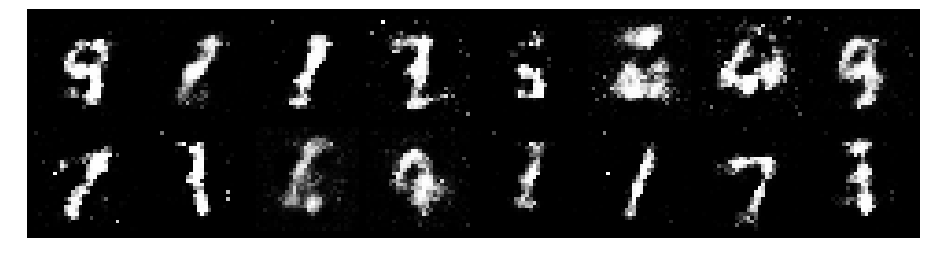

Epoch: [16/50], Batch Num: [300/600]
Discriminator Loss: 0.9103, Generator Loss: 1.4404
D(x): 0.6971, D(G(z)): 0.3198


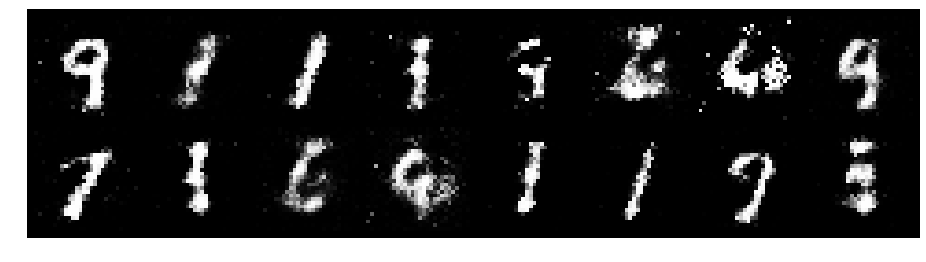

Epoch: [16/50], Batch Num: [400/600]
Discriminator Loss: 0.7706, Generator Loss: 1.4105
D(x): 0.7453, D(G(z)): 0.2893


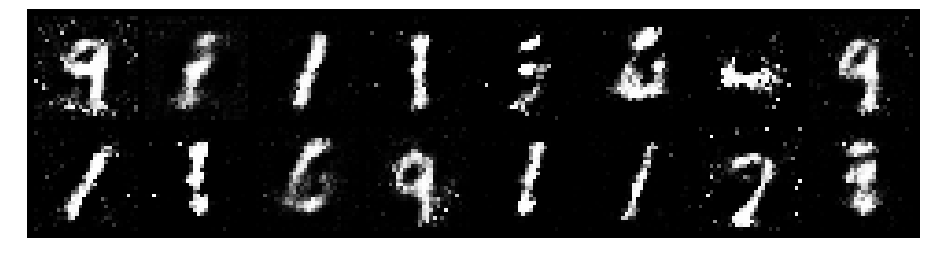

Epoch: [16/50], Batch Num: [500/600]
Discriminator Loss: 0.6934, Generator Loss: 1.9363
D(x): 0.7684, D(G(z)): 0.2557


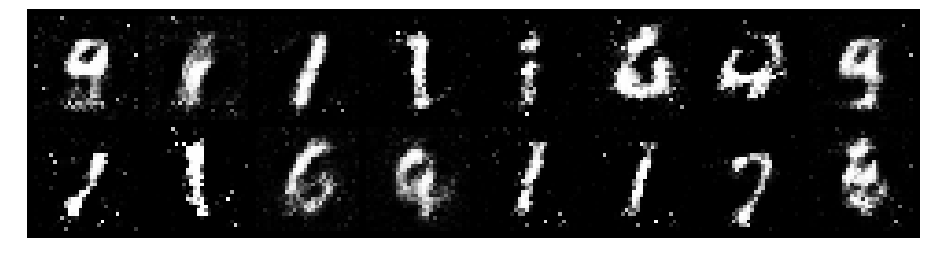

Epoch: [17/50], Batch Num: [0/600]
Discriminator Loss: 0.9536, Generator Loss: 1.5259
D(x): 0.7260, D(G(z)): 0.3512


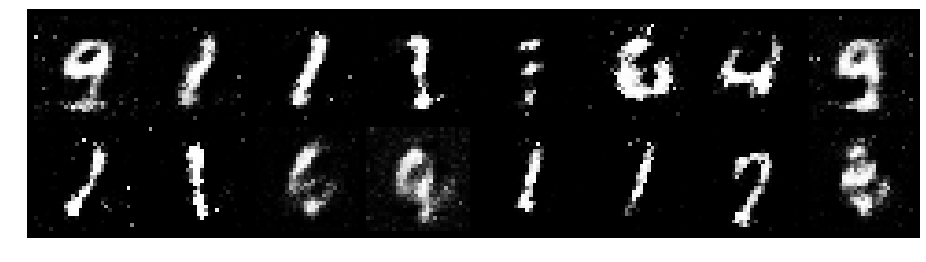

Epoch: [17/50], Batch Num: [100/600]
Discriminator Loss: 1.1291, Generator Loss: 1.6896
D(x): 0.7922, D(G(z)): 0.4479


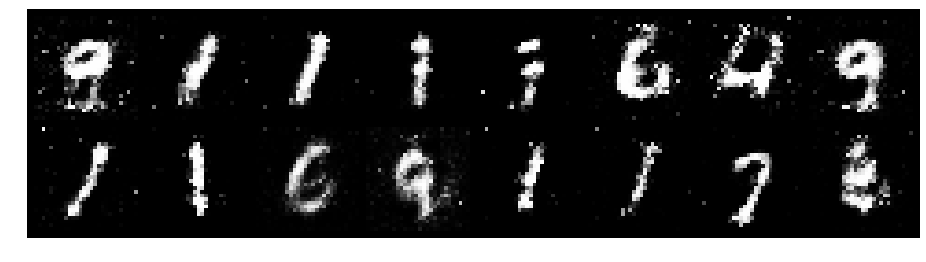

Epoch: [17/50], Batch Num: [200/600]
Discriminator Loss: 0.8929, Generator Loss: 2.1643
D(x): 0.6664, D(G(z)): 0.2174


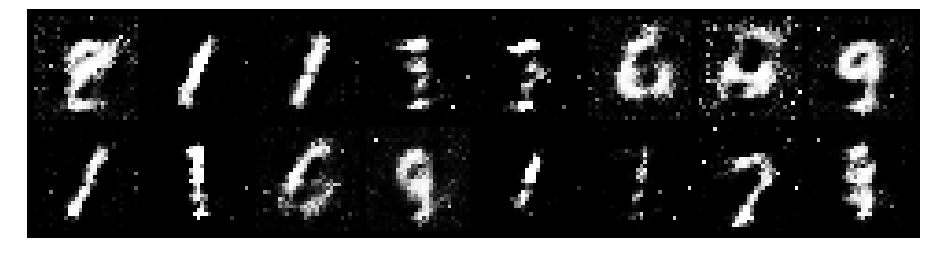

Epoch: [17/50], Batch Num: [300/600]
Discriminator Loss: 0.8054, Generator Loss: 1.7780
D(x): 0.7599, D(G(z)): 0.2704


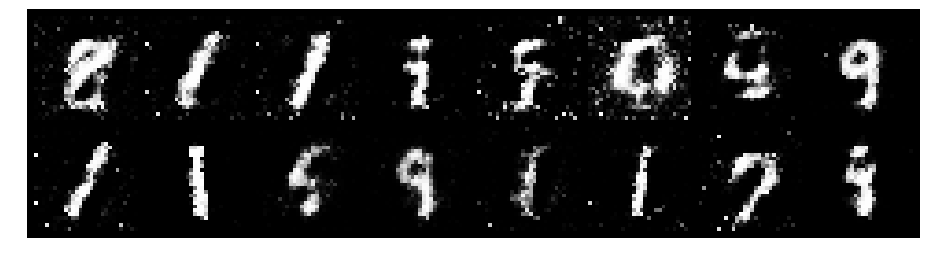

Epoch: [17/50], Batch Num: [400/600]
Discriminator Loss: 0.7308, Generator Loss: 1.9994
D(x): 0.7946, D(G(z)): 0.2503


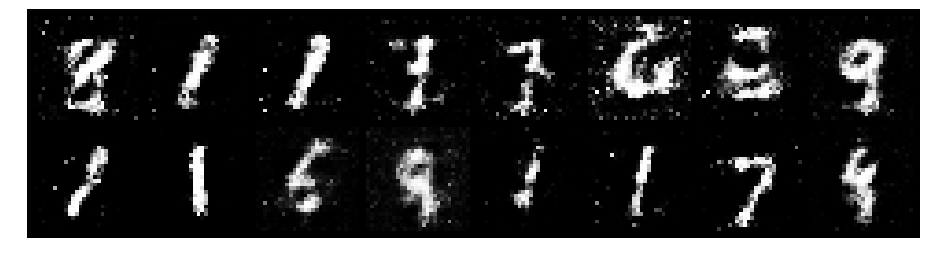

Epoch: [17/50], Batch Num: [500/600]
Discriminator Loss: 0.5990, Generator Loss: 1.7729
D(x): 0.7865, D(G(z)): 0.2130


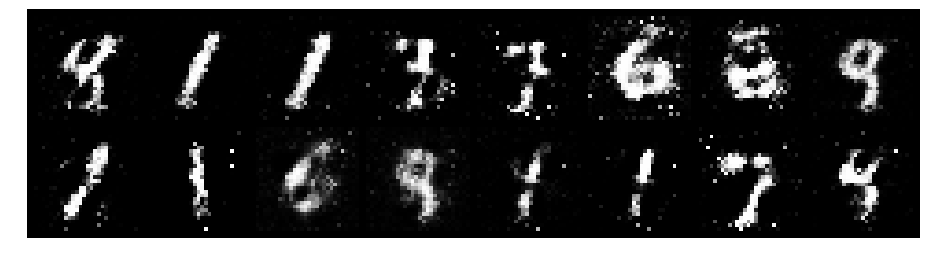

Epoch: [18/50], Batch Num: [0/600]
Discriminator Loss: 1.1096, Generator Loss: 1.4442
D(x): 0.6190, D(G(z)): 0.2838


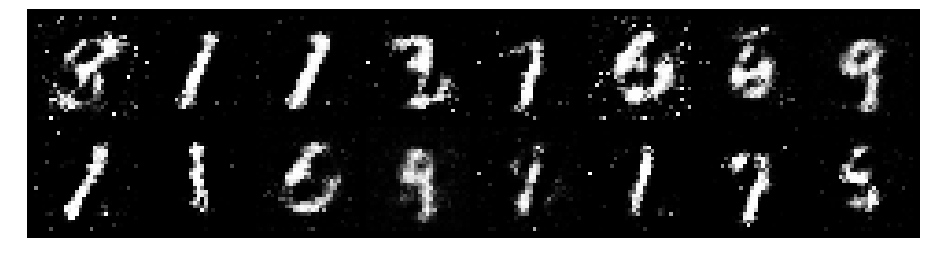

Epoch: [18/50], Batch Num: [100/600]
Discriminator Loss: 0.8091, Generator Loss: 2.5127
D(x): 0.7897, D(G(z)): 0.3005


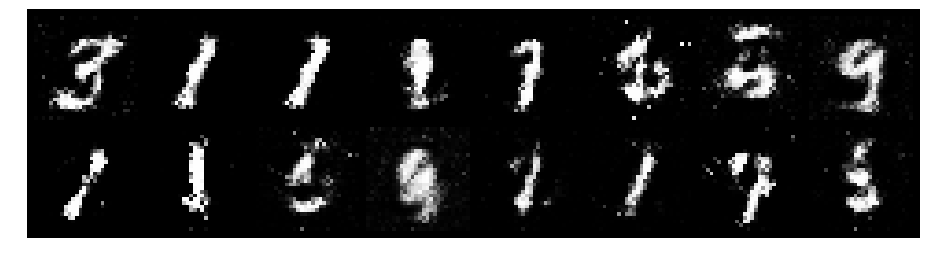

Epoch: [18/50], Batch Num: [200/600]
Discriminator Loss: 0.8101, Generator Loss: 1.7416
D(x): 0.7457, D(G(z)): 0.2807


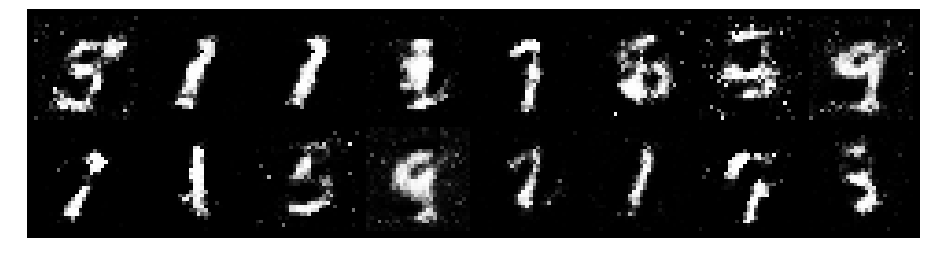

Epoch: [18/50], Batch Num: [300/600]
Discriminator Loss: 0.7120, Generator Loss: 1.9530
D(x): 0.7371, D(G(z)): 0.2069


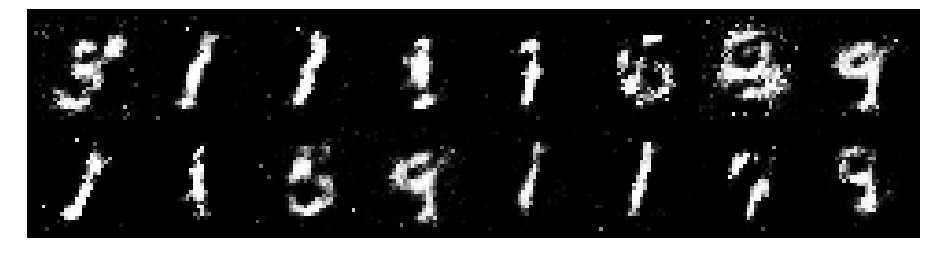

Epoch: [18/50], Batch Num: [400/600]
Discriminator Loss: 0.9070, Generator Loss: 1.7846
D(x): 0.6844, D(G(z)): 0.2739


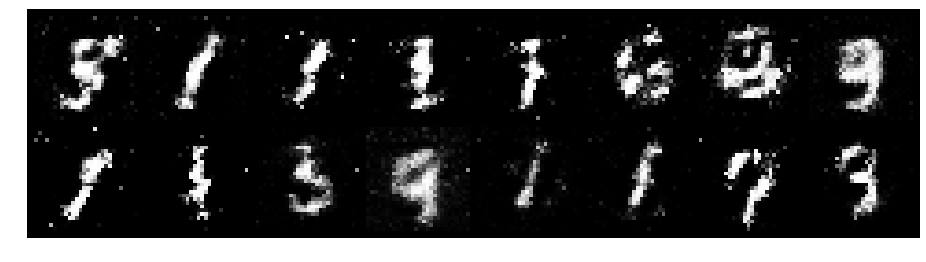

Epoch: [18/50], Batch Num: [500/600]
Discriminator Loss: 0.8001, Generator Loss: 1.7110
D(x): 0.7100, D(G(z)): 0.2377


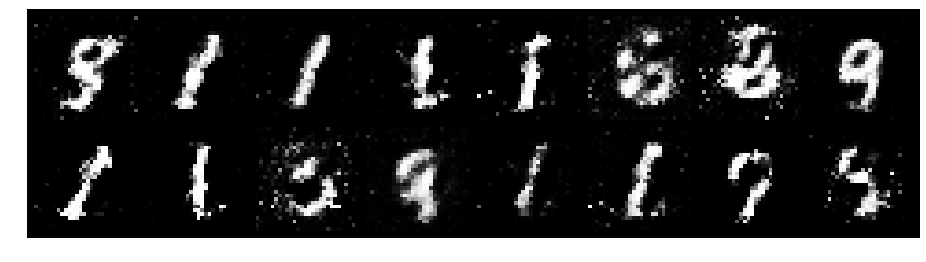

Epoch: [19/50], Batch Num: [0/600]
Discriminator Loss: 0.7413, Generator Loss: 2.1908
D(x): 0.7289, D(G(z)): 0.2344


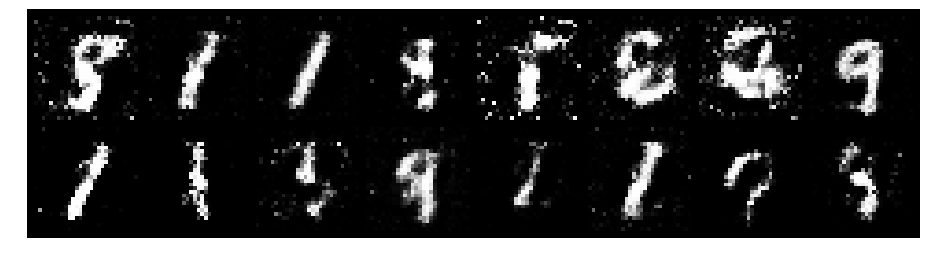

Epoch: [19/50], Batch Num: [100/600]
Discriminator Loss: 0.8898, Generator Loss: 1.7266
D(x): 0.7327, D(G(z)): 0.2991


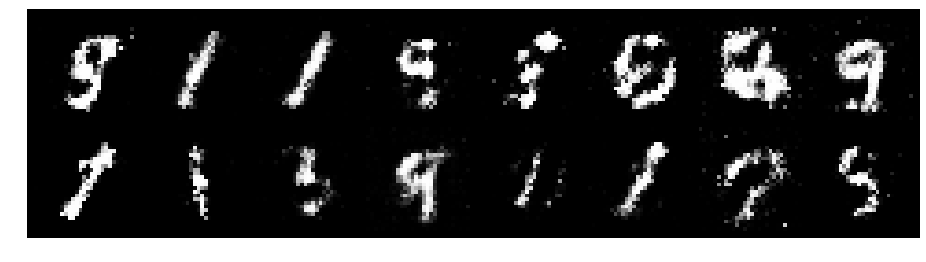

Epoch: [19/50], Batch Num: [200/600]
Discriminator Loss: 0.9006, Generator Loss: 1.8657
D(x): 0.6651, D(G(z)): 0.2570


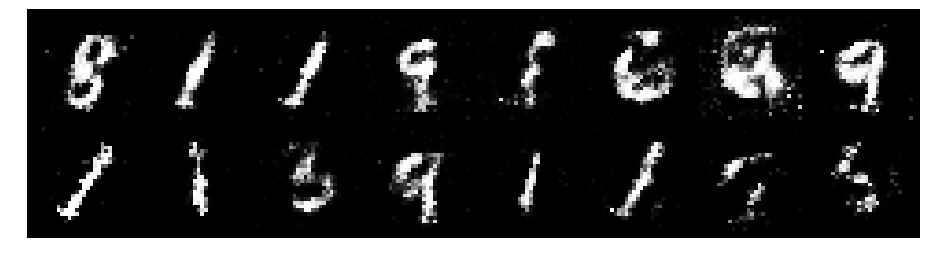

Epoch: [19/50], Batch Num: [300/600]
Discriminator Loss: 0.8829, Generator Loss: 1.6407
D(x): 0.7076, D(G(z)): 0.2753


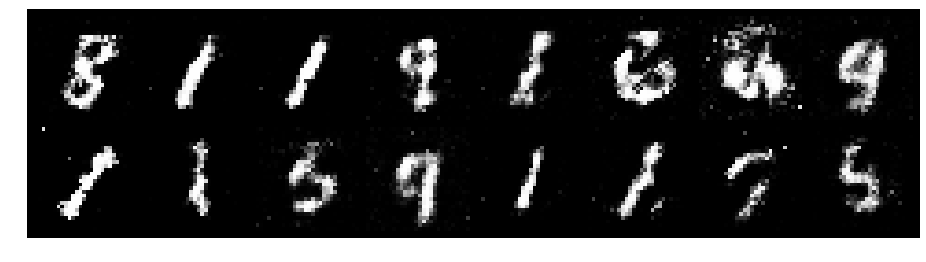

Epoch: [19/50], Batch Num: [400/600]
Discriminator Loss: 0.9223, Generator Loss: 1.6393
D(x): 0.6236, D(G(z)): 0.2079


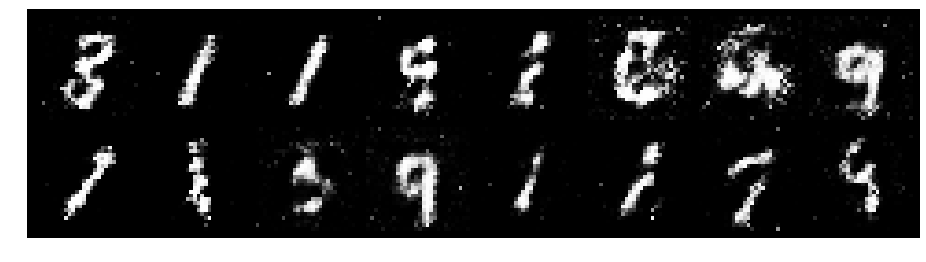

Epoch: [19/50], Batch Num: [500/600]
Discriminator Loss: 0.9128, Generator Loss: 1.6242
D(x): 0.6460, D(G(z)): 0.2321


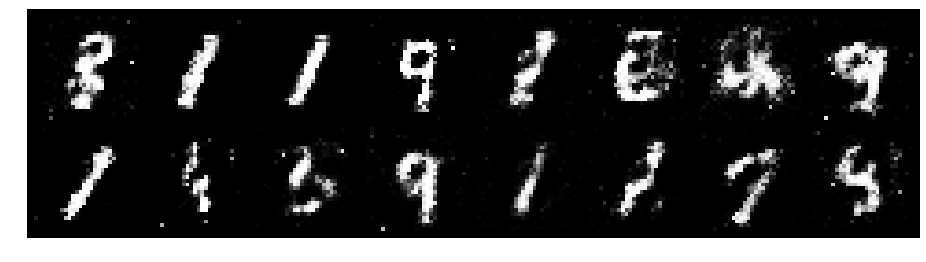

Epoch: [20/50], Batch Num: [0/600]
Discriminator Loss: 0.9614, Generator Loss: 1.2416
D(x): 0.7068, D(G(z)): 0.3304


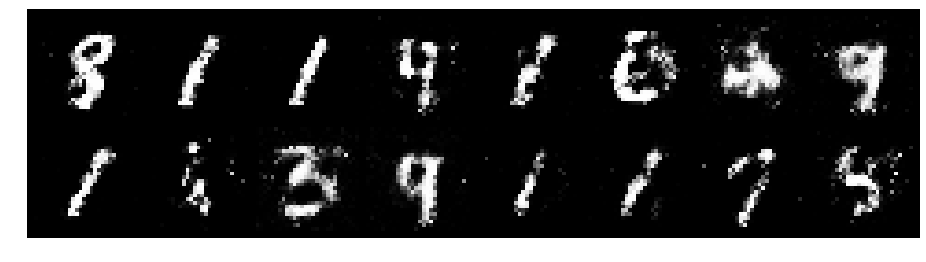

Epoch: [20/50], Batch Num: [100/600]
Discriminator Loss: 0.7198, Generator Loss: 1.6739
D(x): 0.8056, D(G(z)): 0.2938


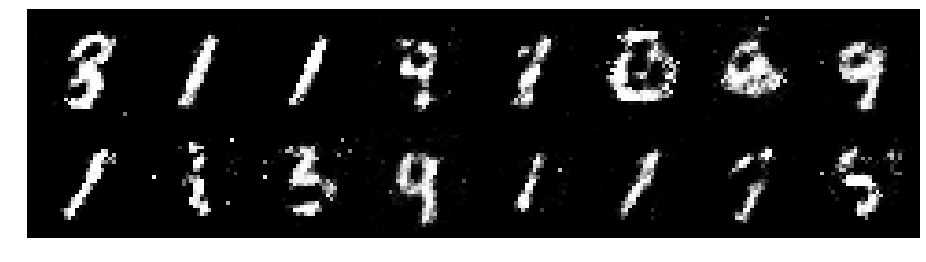

Epoch: [20/50], Batch Num: [200/600]
Discriminator Loss: 0.9555, Generator Loss: 1.4427
D(x): 0.7164, D(G(z)): 0.3297


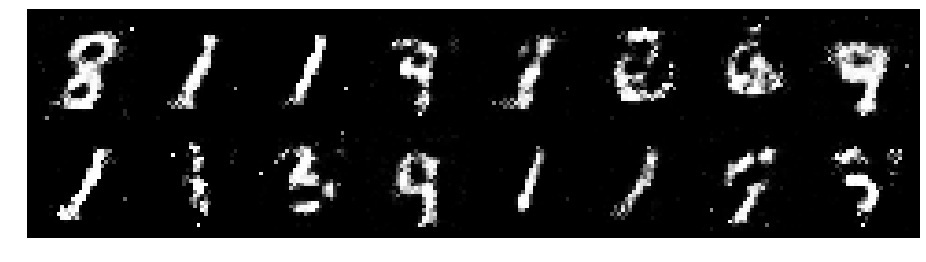

Epoch: [20/50], Batch Num: [300/600]
Discriminator Loss: 0.9432, Generator Loss: 1.6424
D(x): 0.6527, D(G(z)): 0.3056


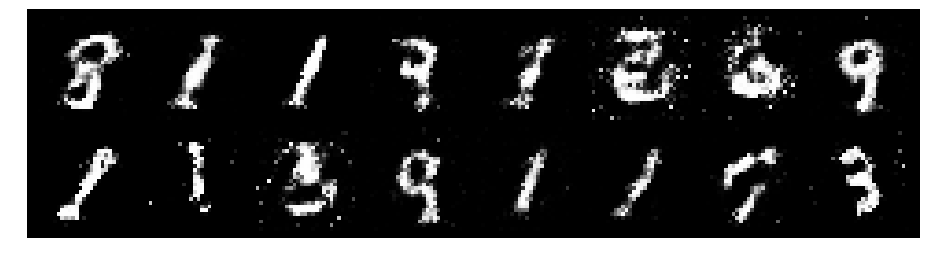

Epoch: [20/50], Batch Num: [400/600]
Discriminator Loss: 0.9302, Generator Loss: 1.4534
D(x): 0.6522, D(G(z)): 0.2656


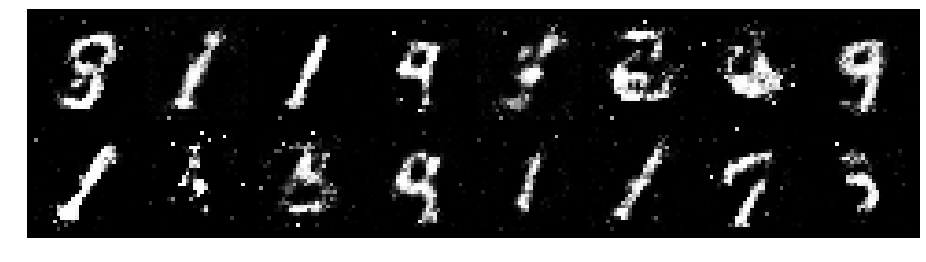

Epoch: [20/50], Batch Num: [500/600]
Discriminator Loss: 0.7724, Generator Loss: 1.8559
D(x): 0.7454, D(G(z)): 0.2703


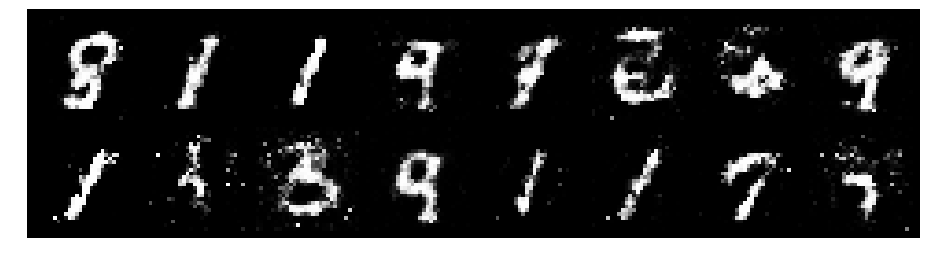

Epoch: [21/50], Batch Num: [0/600]
Discriminator Loss: 0.9009, Generator Loss: 1.4743
D(x): 0.6776, D(G(z)): 0.2697


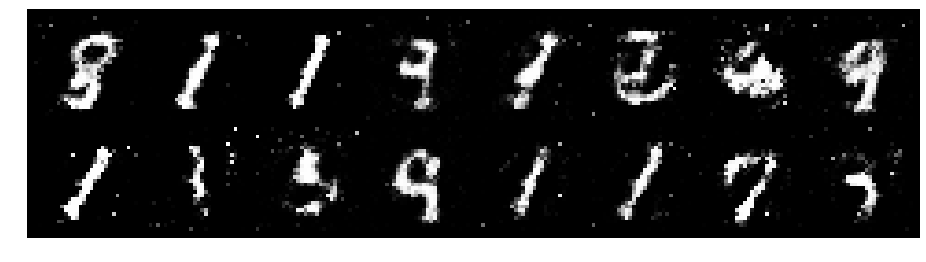

Epoch: [21/50], Batch Num: [100/600]
Discriminator Loss: 0.8588, Generator Loss: 1.7723
D(x): 0.6689, D(G(z)): 0.2329


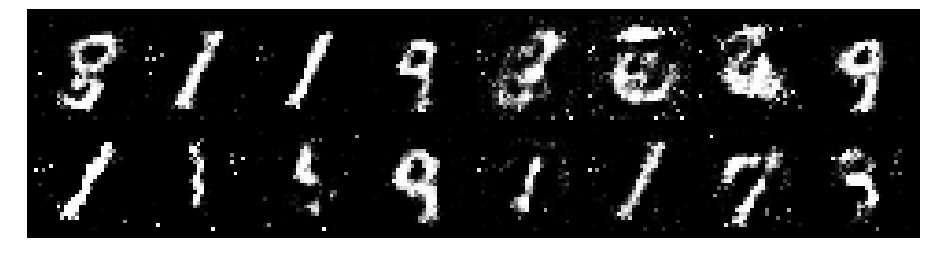

Epoch: [21/50], Batch Num: [200/600]
Discriminator Loss: 0.6923, Generator Loss: 1.6623
D(x): 0.7701, D(G(z)): 0.2643


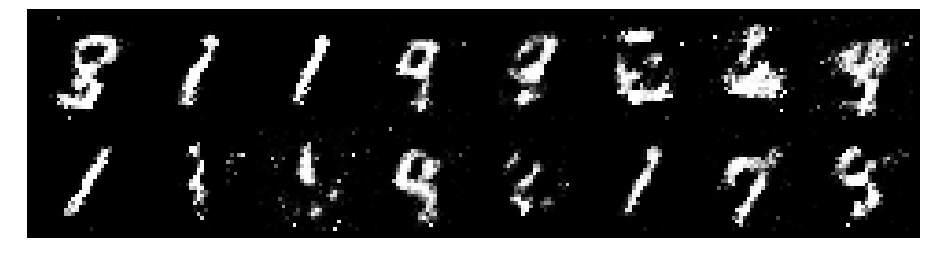

Epoch: [21/50], Batch Num: [300/600]
Discriminator Loss: 0.8186, Generator Loss: 1.6587
D(x): 0.6856, D(G(z)): 0.2436


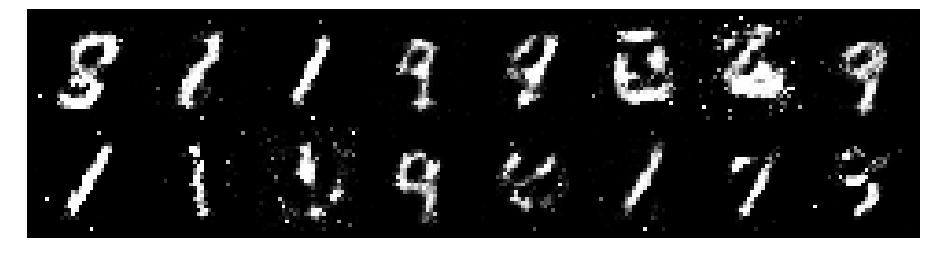

Epoch: [21/50], Batch Num: [400/600]
Discriminator Loss: 0.7062, Generator Loss: 1.6025
D(x): 0.7735, D(G(z)): 0.2803


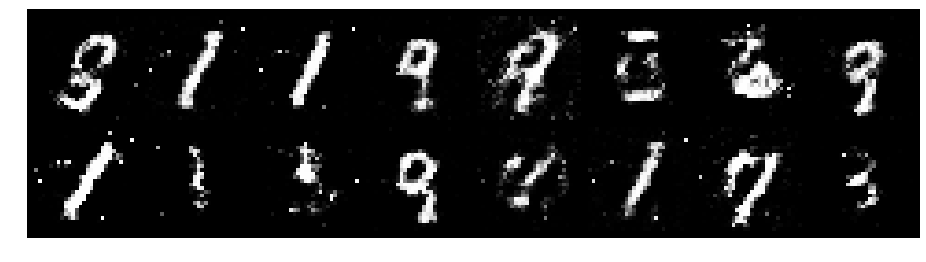

Epoch: [21/50], Batch Num: [500/600]
Discriminator Loss: 0.9473, Generator Loss: 1.6853
D(x): 0.7050, D(G(z)): 0.3191


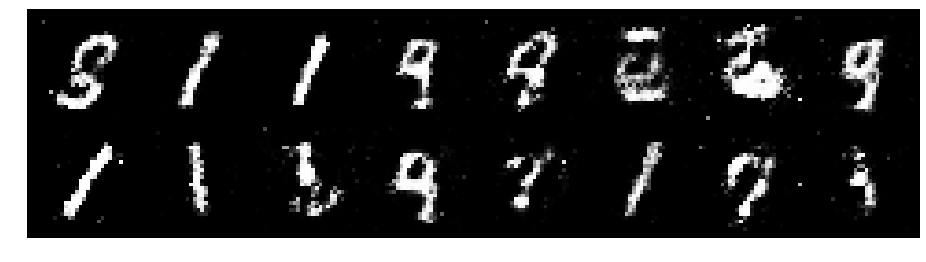

Epoch: [22/50], Batch Num: [0/600]
Discriminator Loss: 1.1451, Generator Loss: 1.1427
D(x): 0.6864, D(G(z)): 0.3955


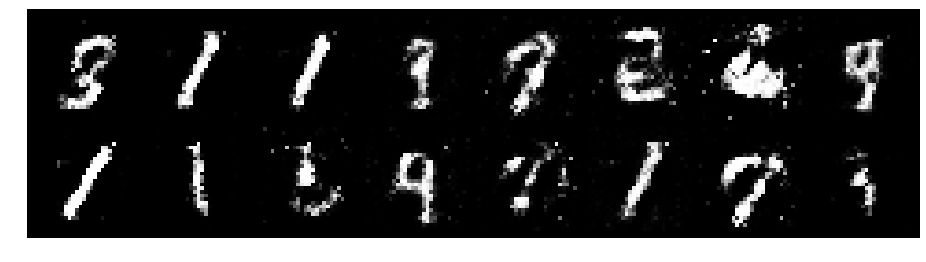

Epoch: [22/50], Batch Num: [100/600]
Discriminator Loss: 0.8815, Generator Loss: 1.4776
D(x): 0.7498, D(G(z)): 0.3374


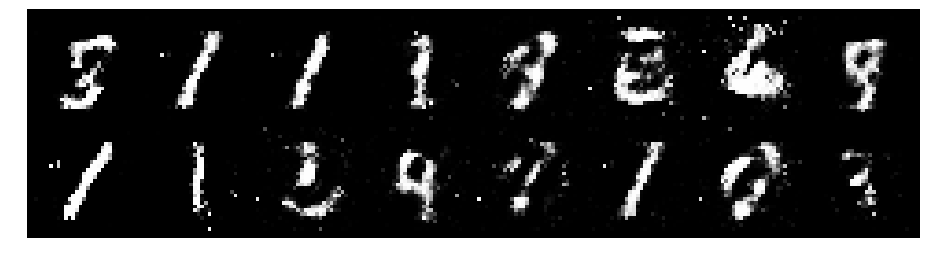

Epoch: [22/50], Batch Num: [200/600]
Discriminator Loss: 0.7572, Generator Loss: 1.7187
D(x): 0.7154, D(G(z)): 0.2481


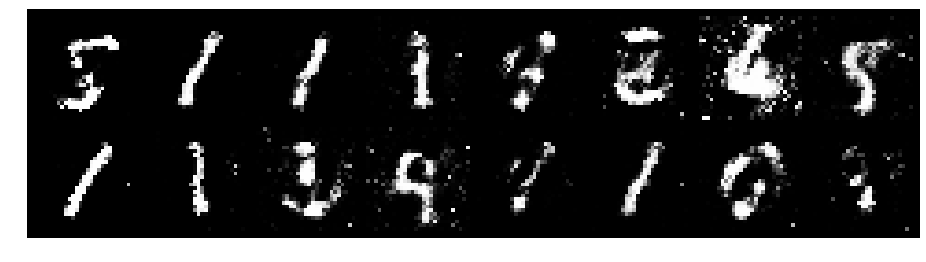

Epoch: [22/50], Batch Num: [300/600]
Discriminator Loss: 0.9385, Generator Loss: 1.5915
D(x): 0.7193, D(G(z)): 0.3442


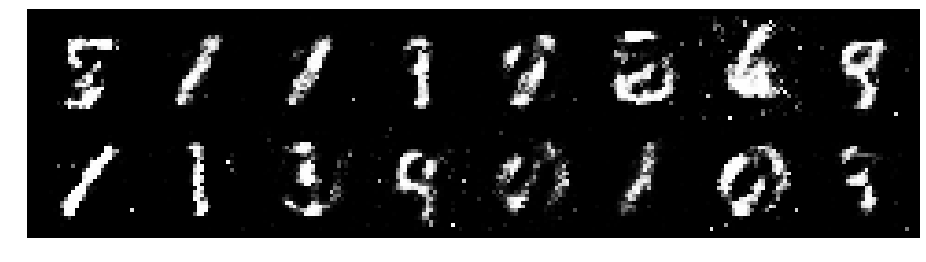

Epoch: [22/50], Batch Num: [400/600]
Discriminator Loss: 0.8658, Generator Loss: 1.3411
D(x): 0.7416, D(G(z)): 0.3289


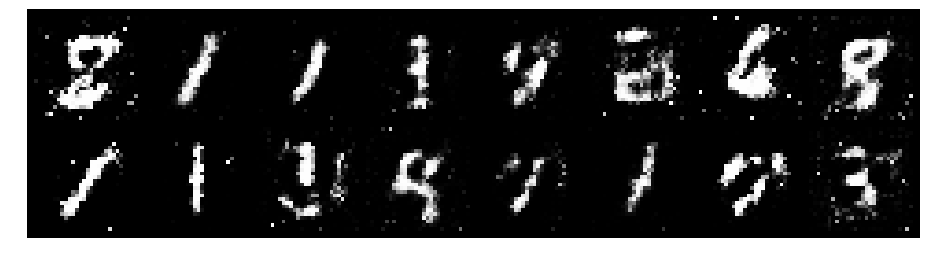

Epoch: [22/50], Batch Num: [500/600]
Discriminator Loss: 1.2002, Generator Loss: 1.3009
D(x): 0.5977, D(G(z)): 0.3519


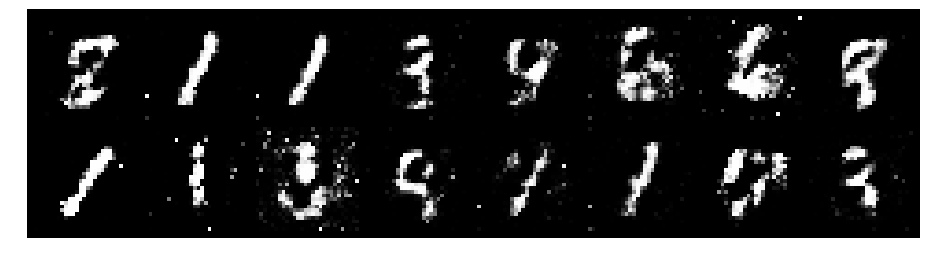

Epoch: [23/50], Batch Num: [0/600]
Discriminator Loss: 1.0774, Generator Loss: 1.1675
D(x): 0.6218, D(G(z)): 0.3491


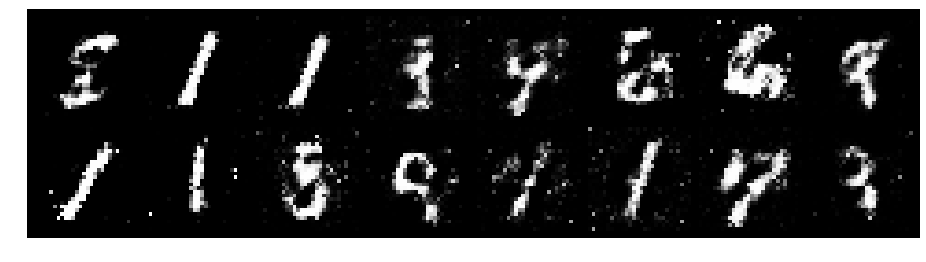

Epoch: [23/50], Batch Num: [100/600]
Discriminator Loss: 0.9787, Generator Loss: 1.5063
D(x): 0.7302, D(G(z)): 0.3652


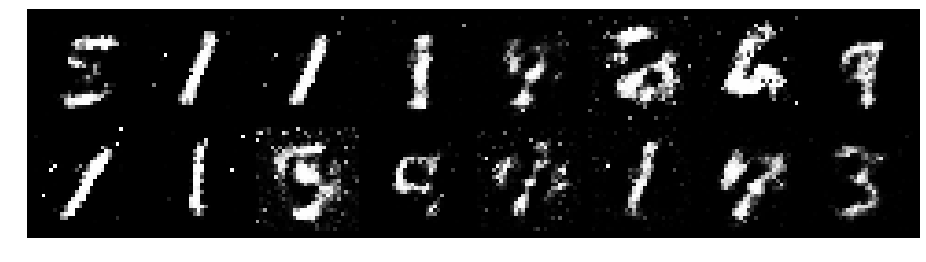

Epoch: [23/50], Batch Num: [200/600]
Discriminator Loss: 0.9844, Generator Loss: 1.7987
D(x): 0.7195, D(G(z)): 0.3390


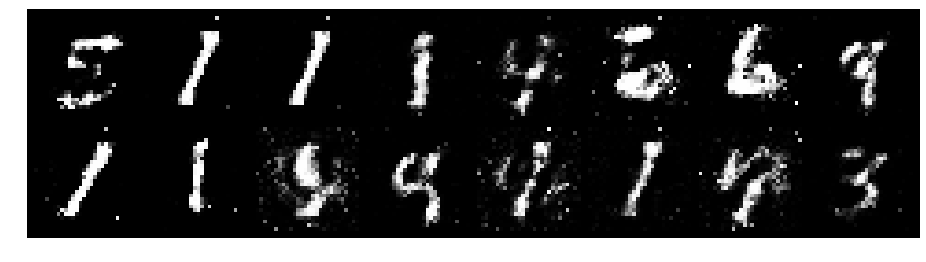

Epoch: [23/50], Batch Num: [300/600]
Discriminator Loss: 1.1198, Generator Loss: 1.3227
D(x): 0.7716, D(G(z)): 0.4281


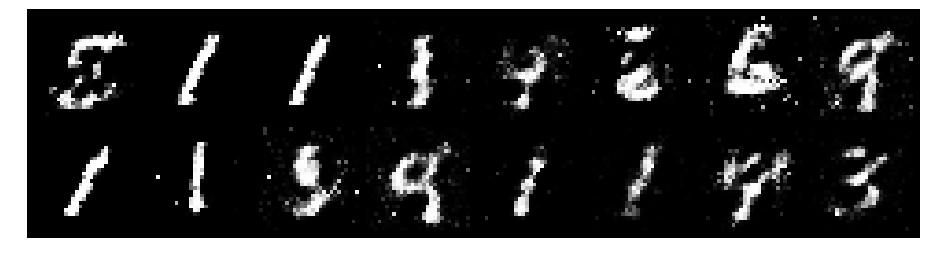

Epoch: [23/50], Batch Num: [400/600]
Discriminator Loss: 0.9591, Generator Loss: 1.3689
D(x): 0.6939, D(G(z)): 0.3207


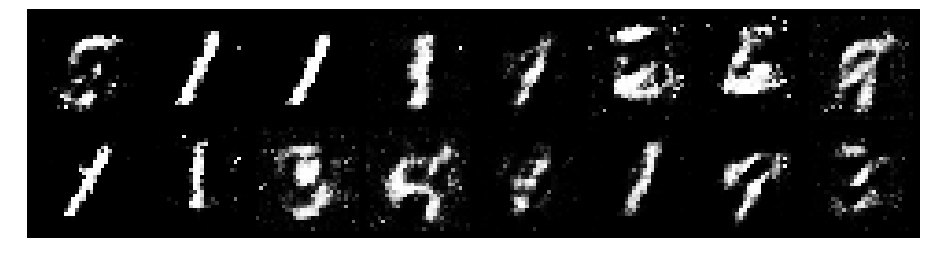

Epoch: [23/50], Batch Num: [500/600]
Discriminator Loss: 0.9385, Generator Loss: 1.6293
D(x): 0.7111, D(G(z)): 0.3377


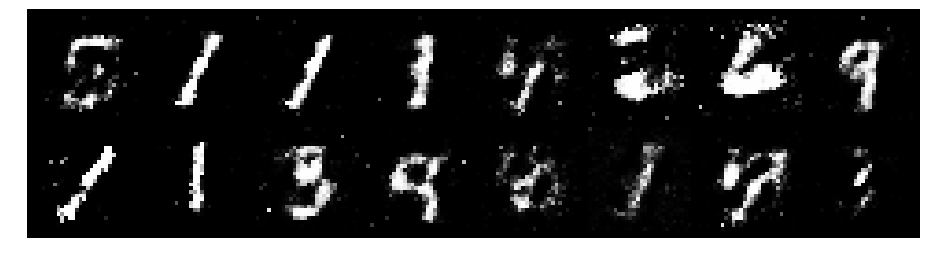

Epoch: [24/50], Batch Num: [0/600]
Discriminator Loss: 0.9247, Generator Loss: 1.6725
D(x): 0.6305, D(G(z)): 0.2253


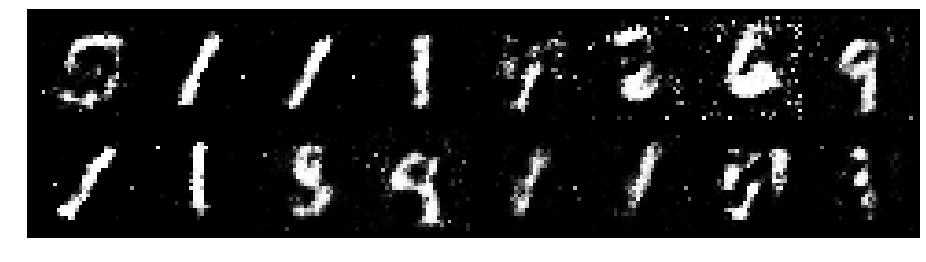

Epoch: [24/50], Batch Num: [100/600]
Discriminator Loss: 0.8086, Generator Loss: 1.7877
D(x): 0.7237, D(G(z)): 0.2937


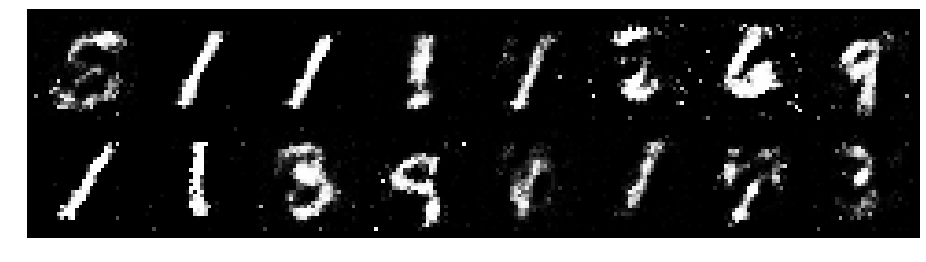

Epoch: [24/50], Batch Num: [200/600]
Discriminator Loss: 0.9075, Generator Loss: 1.0462
D(x): 0.7837, D(G(z)): 0.3846


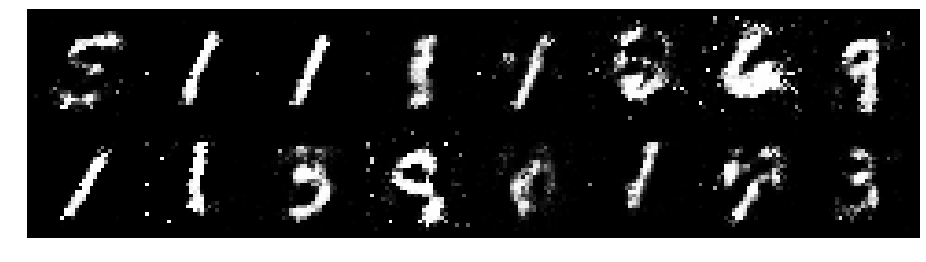

Epoch: [24/50], Batch Num: [300/600]
Discriminator Loss: 0.8893, Generator Loss: 1.4495
D(x): 0.7281, D(G(z)): 0.3399


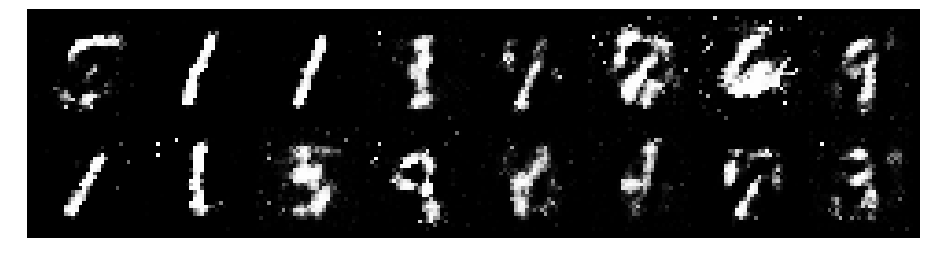

Epoch: [24/50], Batch Num: [400/600]
Discriminator Loss: 0.9895, Generator Loss: 1.7120
D(x): 0.6534, D(G(z)): 0.2916


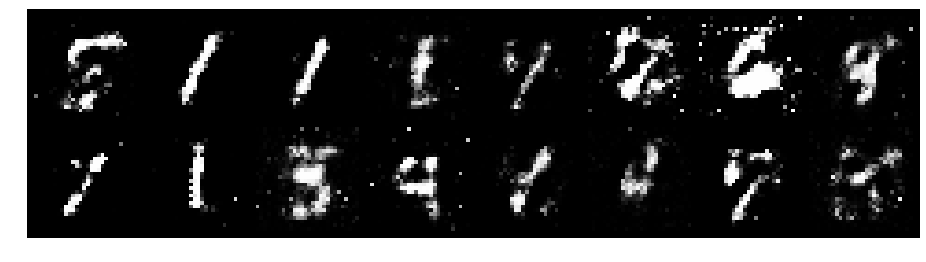

Epoch: [24/50], Batch Num: [500/600]
Discriminator Loss: 0.8571, Generator Loss: 1.3930
D(x): 0.7218, D(G(z)): 0.2900


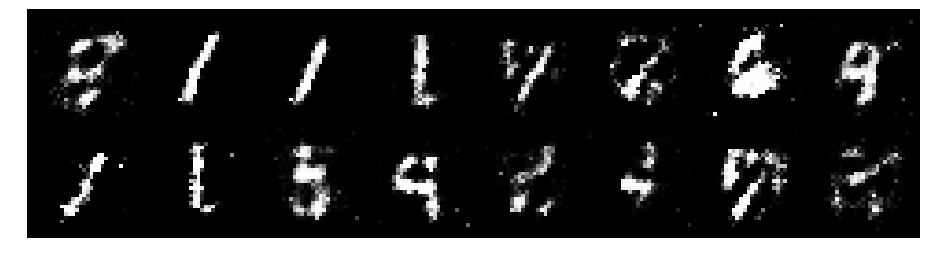

Epoch: [25/50], Batch Num: [0/600]
Discriminator Loss: 0.8565, Generator Loss: 1.6506
D(x): 0.7204, D(G(z)): 0.3237


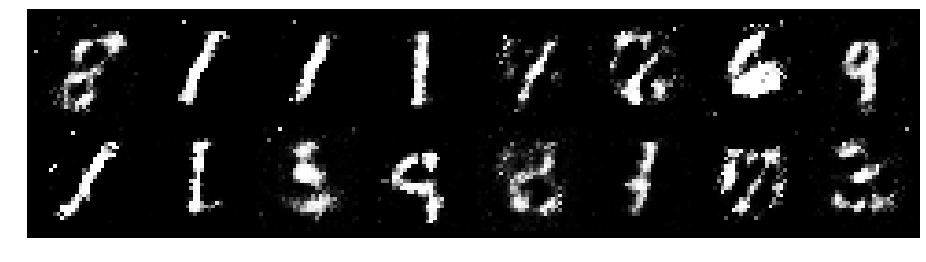

Epoch: [25/50], Batch Num: [100/600]
Discriminator Loss: 1.0810, Generator Loss: 1.2621
D(x): 0.7162, D(G(z)): 0.4245


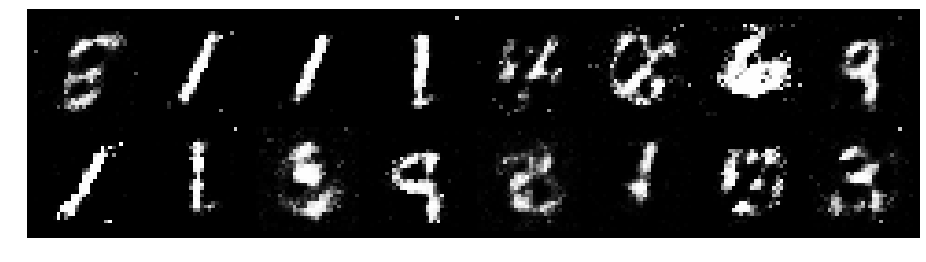

Epoch: [25/50], Batch Num: [200/600]
Discriminator Loss: 0.9096, Generator Loss: 1.2547
D(x): 0.7223, D(G(z)): 0.3690


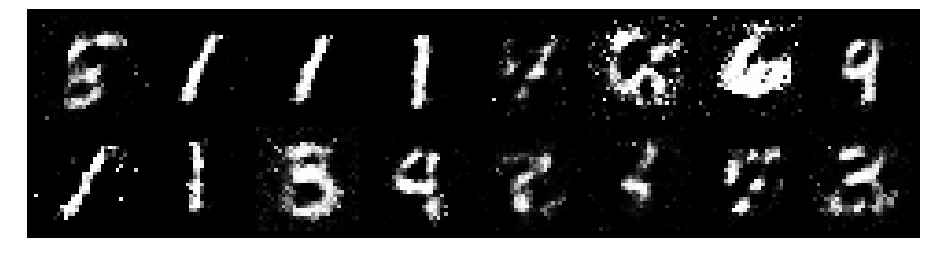

Epoch: [25/50], Batch Num: [300/600]
Discriminator Loss: 0.9092, Generator Loss: 1.5823
D(x): 0.6458, D(G(z)): 0.2680


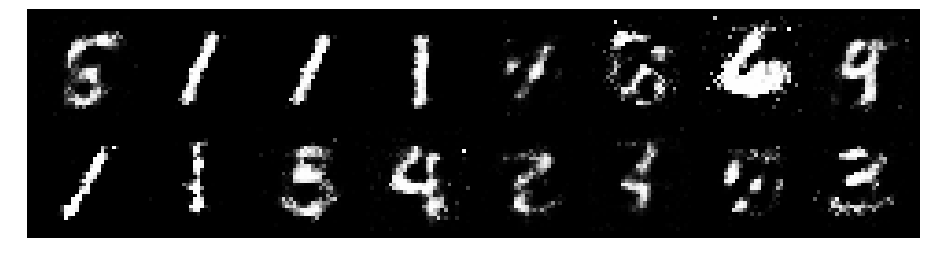

Epoch: [25/50], Batch Num: [400/600]
Discriminator Loss: 1.1117, Generator Loss: 1.3096
D(x): 0.5570, D(G(z)): 0.2686


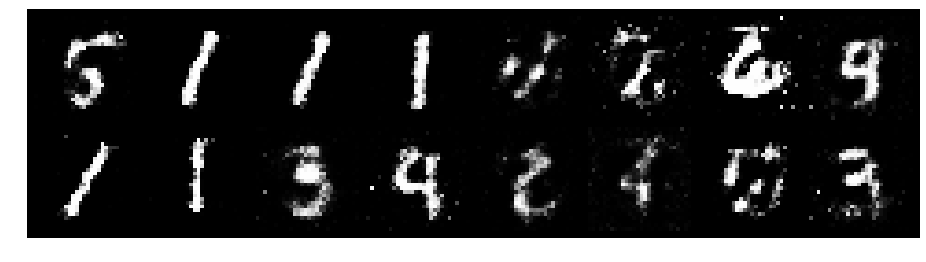

Epoch: [25/50], Batch Num: [500/600]
Discriminator Loss: 1.0582, Generator Loss: 1.1749
D(x): 0.6160, D(G(z)): 0.3117


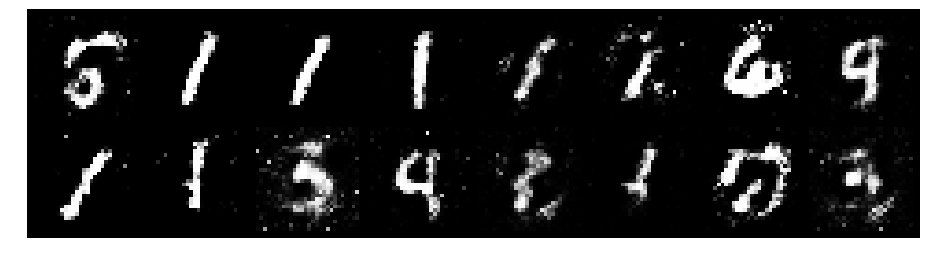

Epoch: [26/50], Batch Num: [0/600]
Discriminator Loss: 1.0786, Generator Loss: 1.6235
D(x): 0.6356, D(G(z)): 0.3056


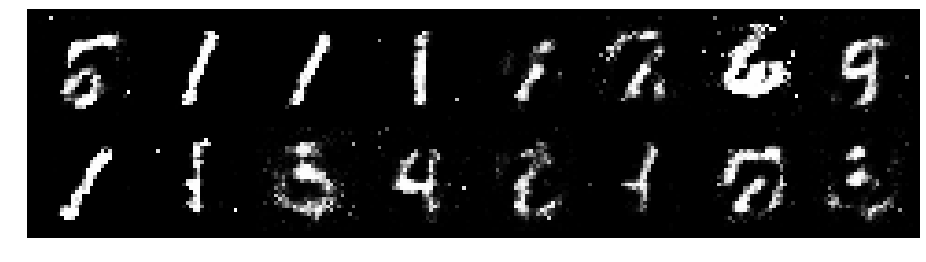

Epoch: [26/50], Batch Num: [100/600]
Discriminator Loss: 0.8608, Generator Loss: 1.7670
D(x): 0.6647, D(G(z)): 0.2506


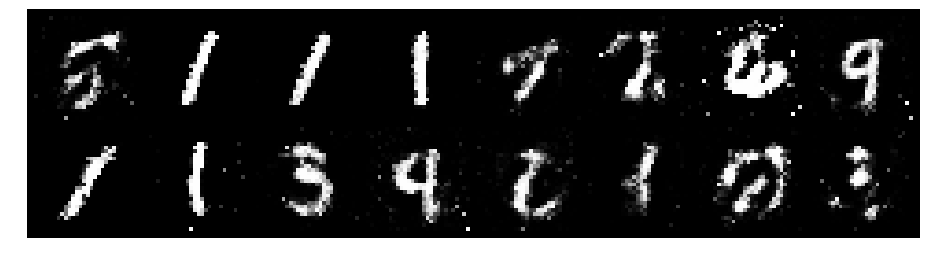

Epoch: [26/50], Batch Num: [200/600]
Discriminator Loss: 0.9134, Generator Loss: 1.5106
D(x): 0.7177, D(G(z)): 0.3388


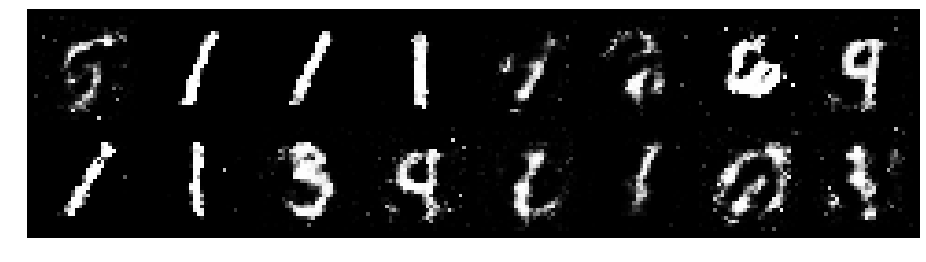

Epoch: [26/50], Batch Num: [300/600]
Discriminator Loss: 1.1834, Generator Loss: 1.6718
D(x): 0.5608, D(G(z)): 0.2280


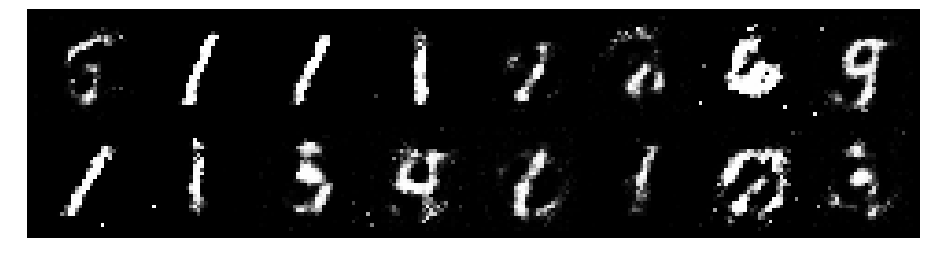

Epoch: [26/50], Batch Num: [400/600]
Discriminator Loss: 0.9794, Generator Loss: 1.4758
D(x): 0.6631, D(G(z)): 0.3093


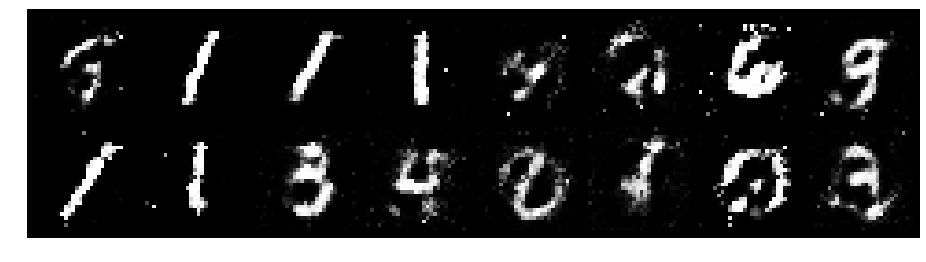

Epoch: [26/50], Batch Num: [500/600]
Discriminator Loss: 0.9861, Generator Loss: 1.0596
D(x): 0.6703, D(G(z)): 0.3342


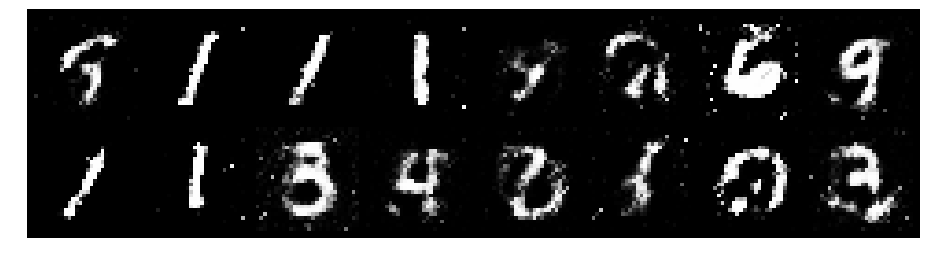

Epoch: [27/50], Batch Num: [0/600]
Discriminator Loss: 1.1450, Generator Loss: 1.5825
D(x): 0.6837, D(G(z)): 0.4015


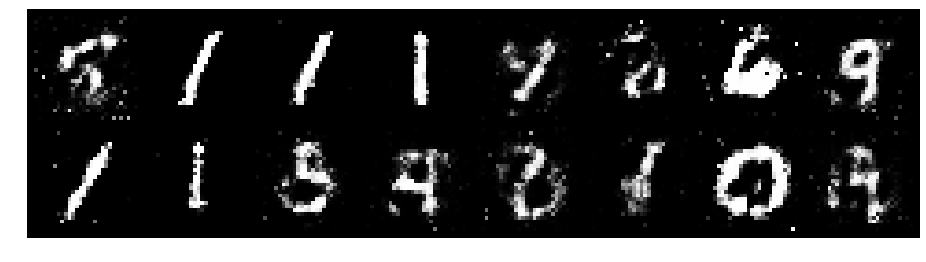

Epoch: [27/50], Batch Num: [100/600]
Discriminator Loss: 0.8696, Generator Loss: 2.0048
D(x): 0.6817, D(G(z)): 0.2445


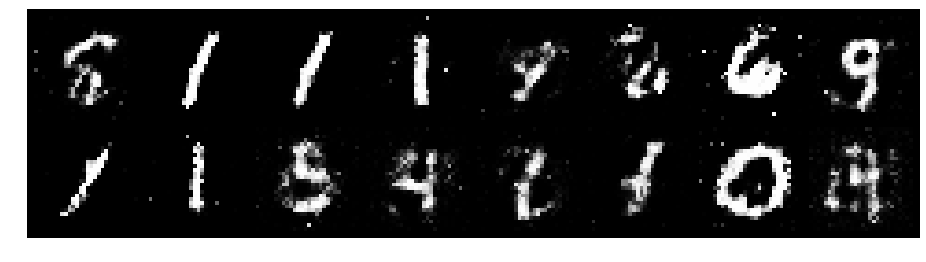

Epoch: [27/50], Batch Num: [200/600]
Discriminator Loss: 1.1242, Generator Loss: 1.5634
D(x): 0.6858, D(G(z)): 0.3785


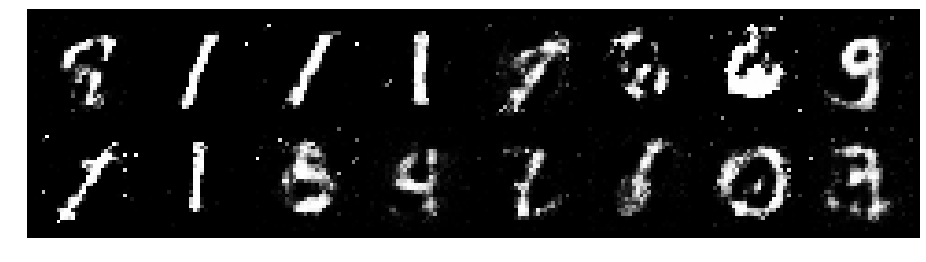

Epoch: [27/50], Batch Num: [300/600]
Discriminator Loss: 0.9140, Generator Loss: 1.6277
D(x): 0.6530, D(G(z)): 0.2338


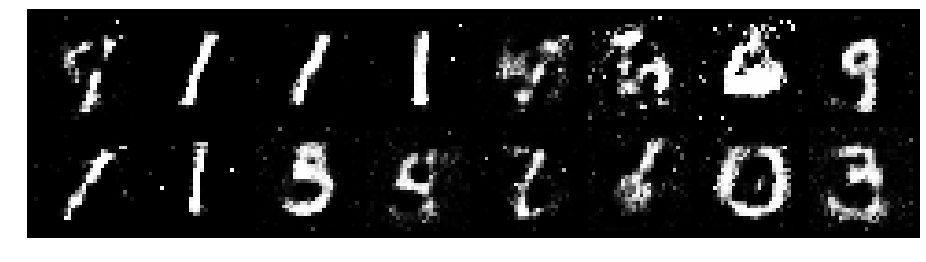

Epoch: [27/50], Batch Num: [400/600]
Discriminator Loss: 1.0588, Generator Loss: 1.4643
D(x): 0.6746, D(G(z)): 0.3559


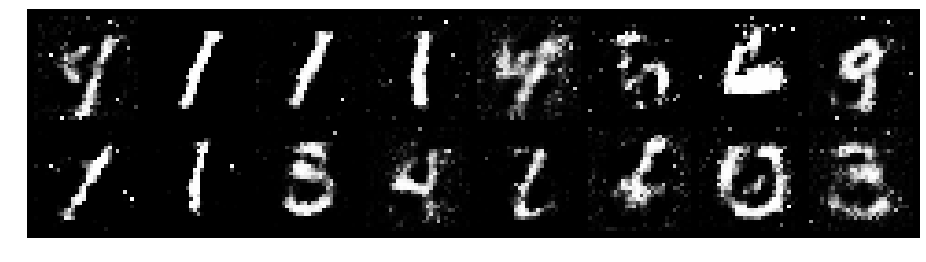

Epoch: [27/50], Batch Num: [500/600]
Discriminator Loss: 1.0905, Generator Loss: 1.3559
D(x): 0.7159, D(G(z)): 0.3636


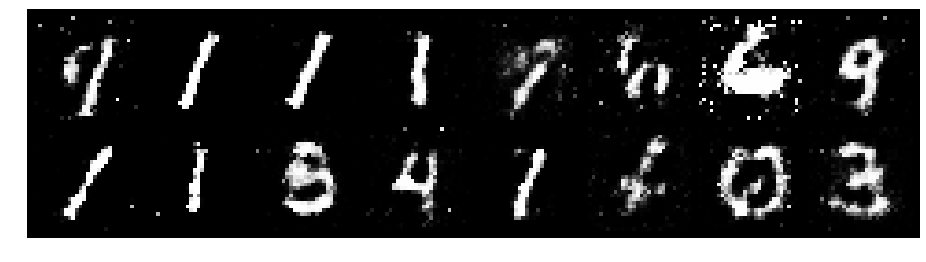

Epoch: [28/50], Batch Num: [0/600]
Discriminator Loss: 1.0217, Generator Loss: 1.2642
D(x): 0.6916, D(G(z)): 0.3847


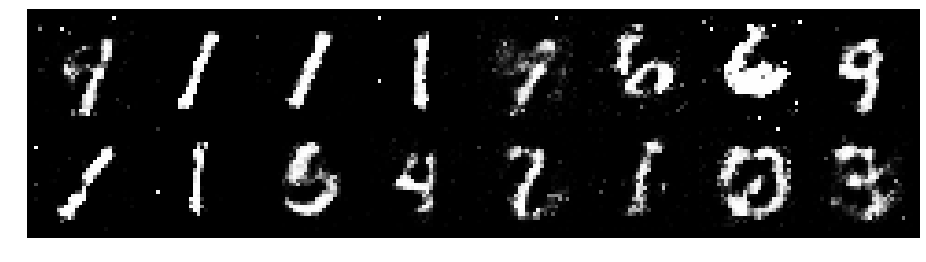

Epoch: [28/50], Batch Num: [100/600]
Discriminator Loss: 1.0097, Generator Loss: 1.2368
D(x): 0.6693, D(G(z)): 0.3524


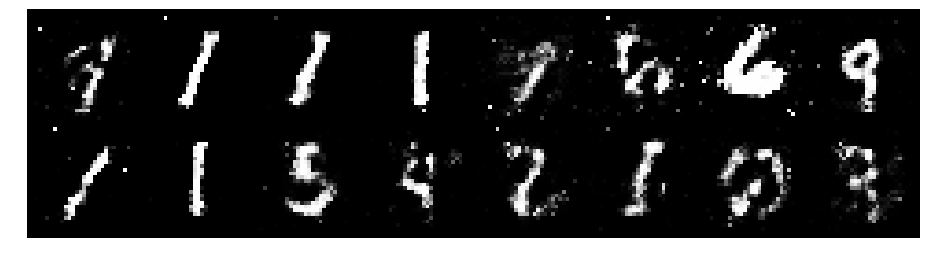

Epoch: [28/50], Batch Num: [200/600]
Discriminator Loss: 0.9529, Generator Loss: 1.3845
D(x): 0.6814, D(G(z)): 0.3297


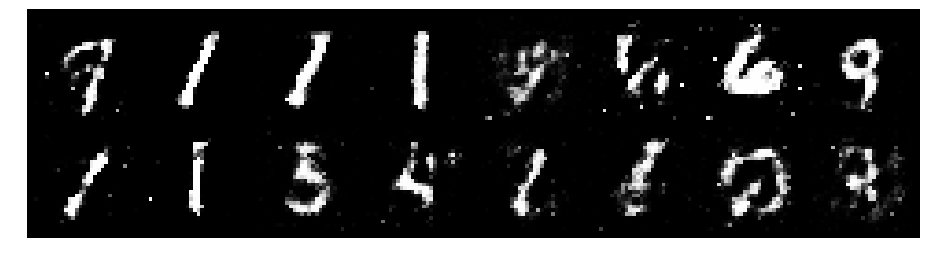

Epoch: [28/50], Batch Num: [300/600]
Discriminator Loss: 0.9930, Generator Loss: 1.3129
D(x): 0.6538, D(G(z)): 0.3203


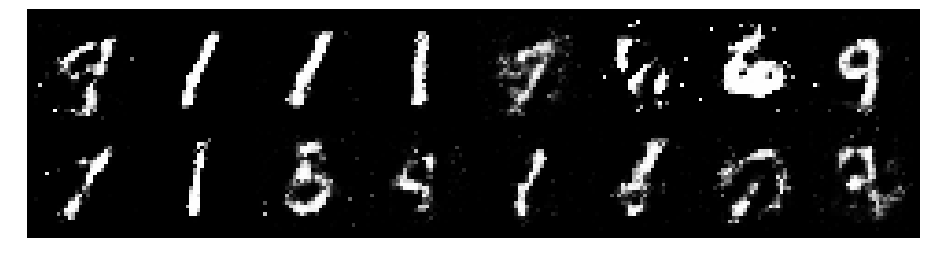

Epoch: [28/50], Batch Num: [400/600]
Discriminator Loss: 1.0474, Generator Loss: 1.0794
D(x): 0.7035, D(G(z)): 0.4234


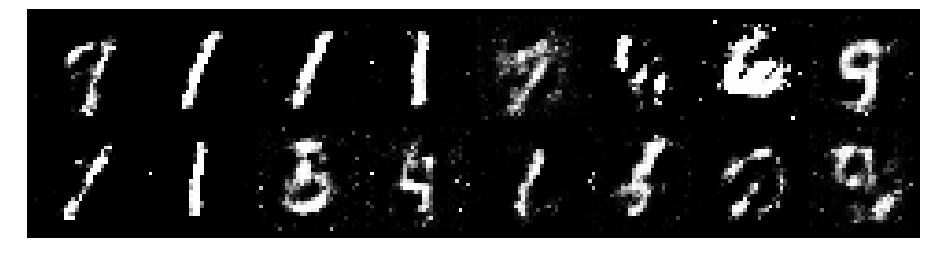

Epoch: [28/50], Batch Num: [500/600]
Discriminator Loss: 1.1462, Generator Loss: 1.7204
D(x): 0.6744, D(G(z)): 0.3773


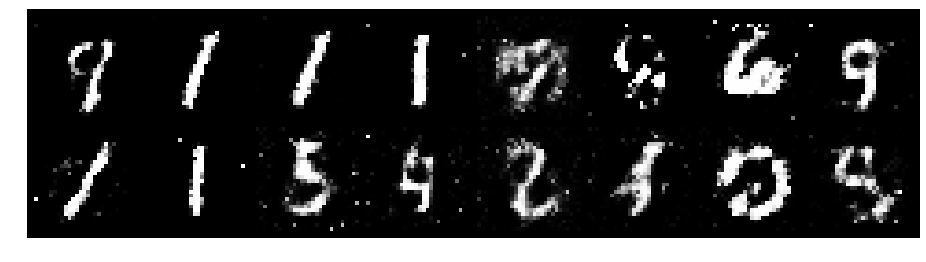

Epoch: [29/50], Batch Num: [0/600]
Discriminator Loss: 1.0403, Generator Loss: 1.3893
D(x): 0.7008, D(G(z)): 0.3762


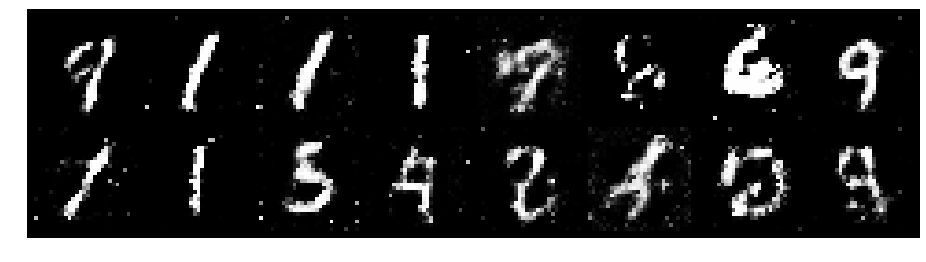

Epoch: [29/50], Batch Num: [100/600]
Discriminator Loss: 1.1008, Generator Loss: 1.2319
D(x): 0.6260, D(G(z)): 0.3121


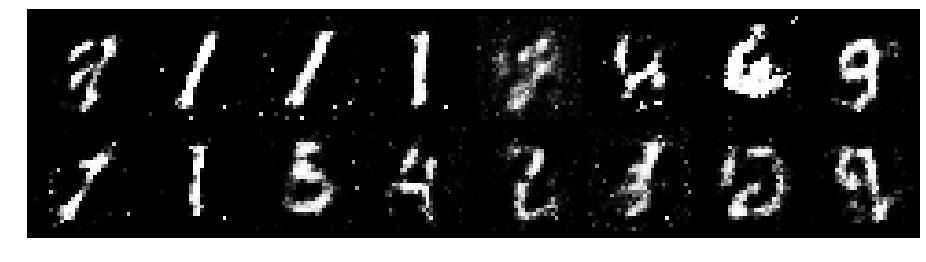

Epoch: [29/50], Batch Num: [200/600]
Discriminator Loss: 1.1023, Generator Loss: 1.4263
D(x): 0.6324, D(G(z)): 0.3185


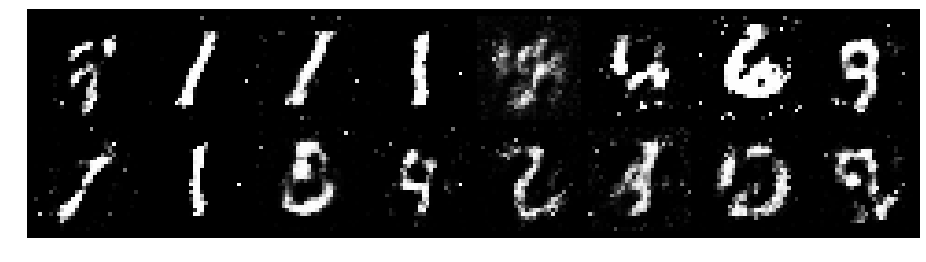

Epoch: [29/50], Batch Num: [300/600]
Discriminator Loss: 0.8758, Generator Loss: 1.5627
D(x): 0.6821, D(G(z)): 0.3028


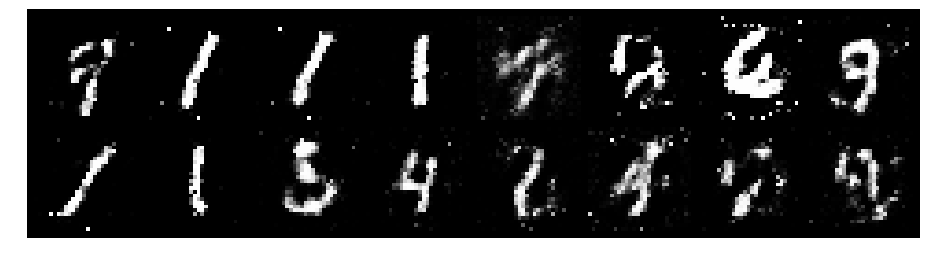

Epoch: [29/50], Batch Num: [400/600]
Discriminator Loss: 1.1650, Generator Loss: 1.1474
D(x): 0.6073, D(G(z)): 0.3602


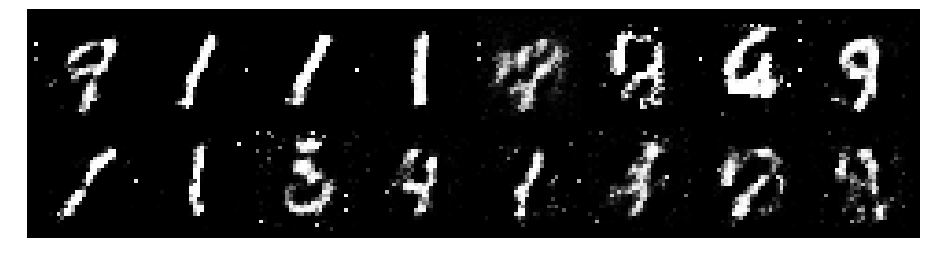

Epoch: [29/50], Batch Num: [500/600]
Discriminator Loss: 1.0329, Generator Loss: 1.4400
D(x): 0.5864, D(G(z)): 0.2622


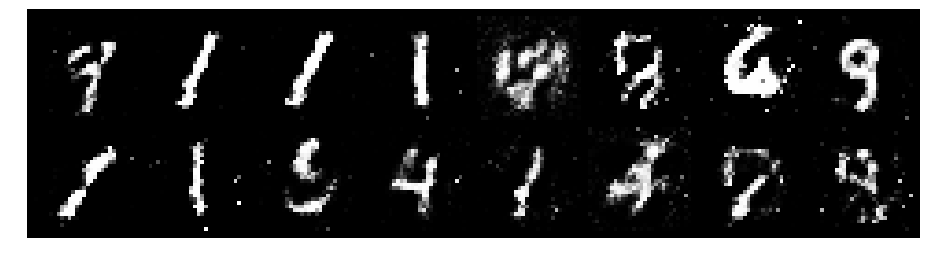

Epoch: [30/50], Batch Num: [0/600]
Discriminator Loss: 0.7365, Generator Loss: 1.3396
D(x): 0.7201, D(G(z)): 0.2525


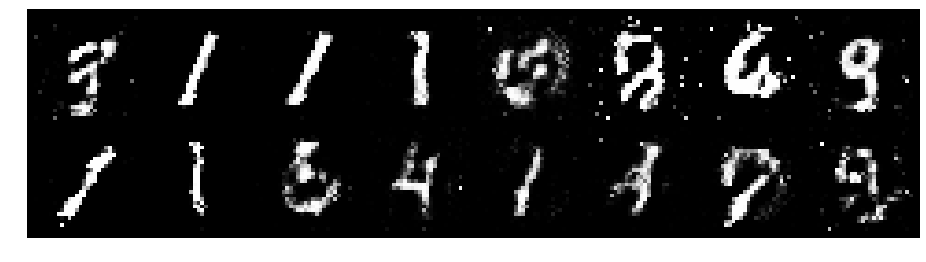

Epoch: [30/50], Batch Num: [100/600]
Discriminator Loss: 0.9661, Generator Loss: 1.2389
D(x): 0.6740, D(G(z)): 0.3367


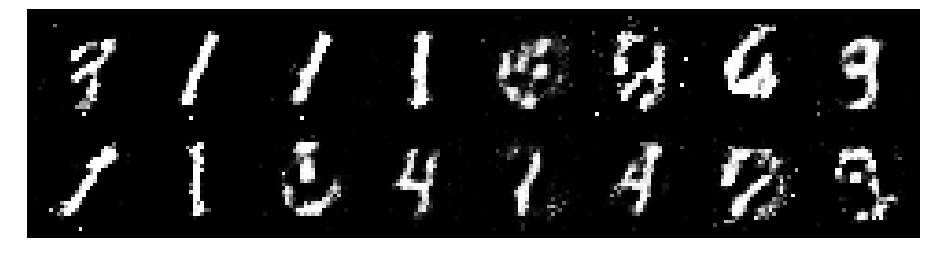

Epoch: [30/50], Batch Num: [200/600]
Discriminator Loss: 1.0990, Generator Loss: 1.2531
D(x): 0.7166, D(G(z)): 0.4431


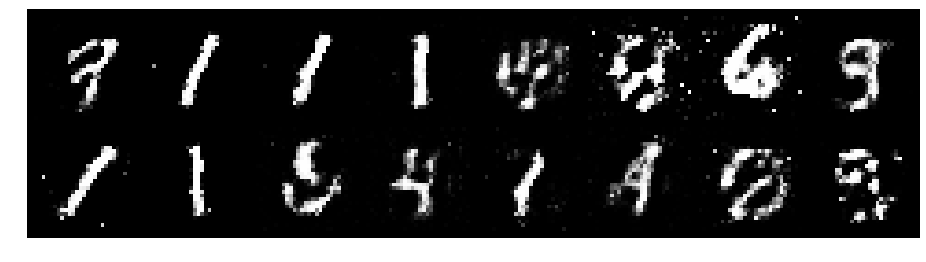

Epoch: [30/50], Batch Num: [300/600]
Discriminator Loss: 0.9628, Generator Loss: 1.4362
D(x): 0.6509, D(G(z)): 0.3066


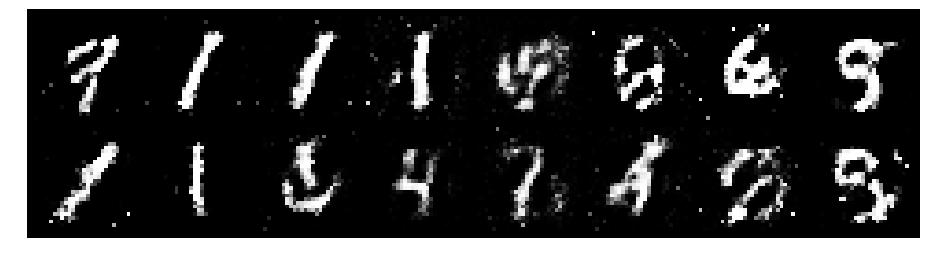

Epoch: [30/50], Batch Num: [400/600]
Discriminator Loss: 1.0053, Generator Loss: 1.2788
D(x): 0.6477, D(G(z)): 0.3250


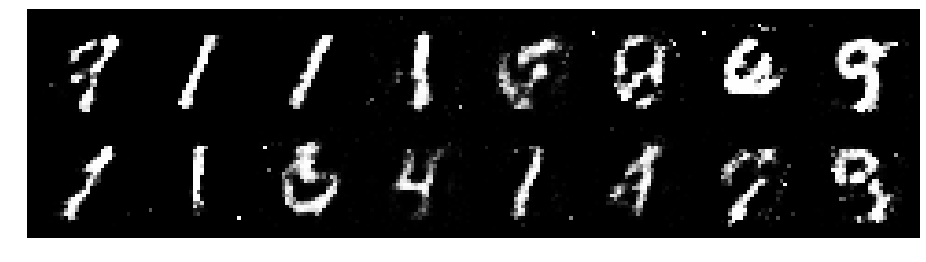

Epoch: [30/50], Batch Num: [500/600]
Discriminator Loss: 0.9695, Generator Loss: 1.4065
D(x): 0.6584, D(G(z)): 0.2879


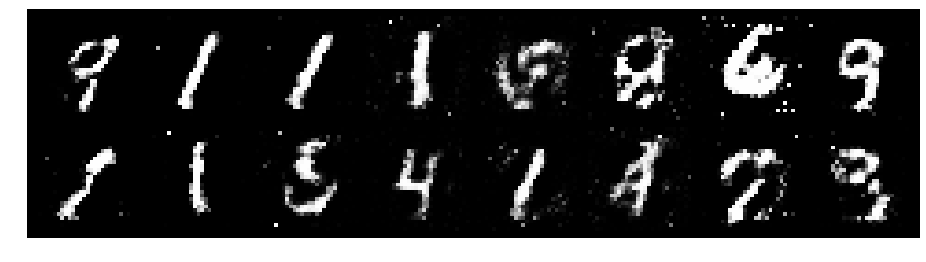

Epoch: [31/50], Batch Num: [0/600]
Discriminator Loss: 1.0706, Generator Loss: 1.5223
D(x): 0.6297, D(G(z)): 0.3361


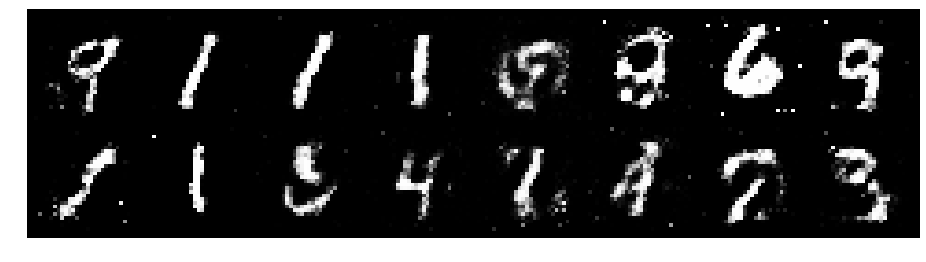

Epoch: [31/50], Batch Num: [100/600]
Discriminator Loss: 1.0878, Generator Loss: 1.2755
D(x): 0.6206, D(G(z)): 0.3225


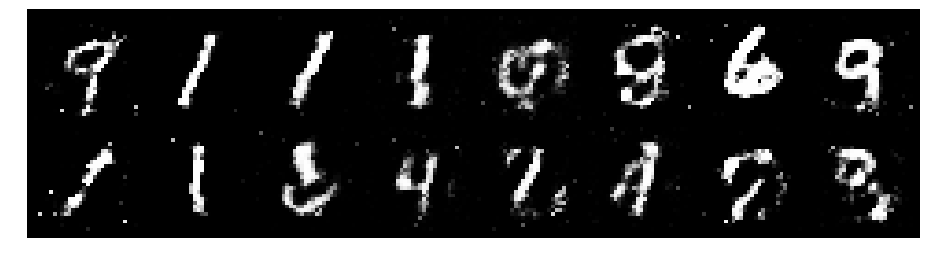

Epoch: [31/50], Batch Num: [200/600]
Discriminator Loss: 1.0073, Generator Loss: 1.3241
D(x): 0.6942, D(G(z)): 0.3469


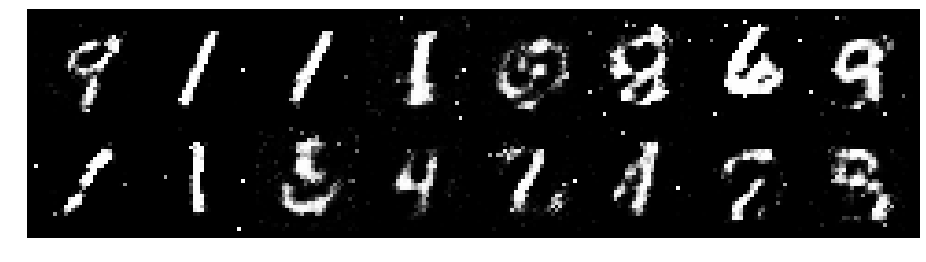

Epoch: [31/50], Batch Num: [300/600]
Discriminator Loss: 0.9776, Generator Loss: 1.3739
D(x): 0.6673, D(G(z)): 0.3306


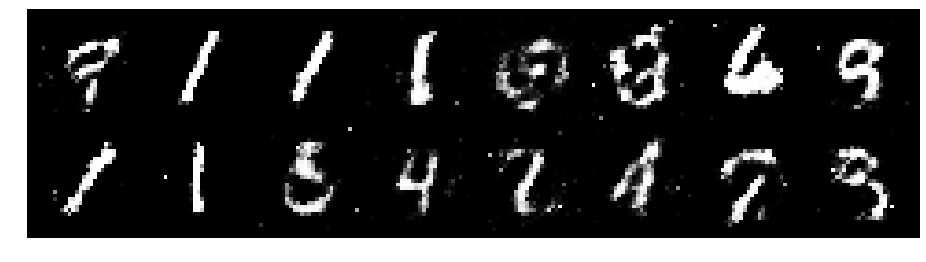

Epoch: [31/50], Batch Num: [400/600]
Discriminator Loss: 0.9490, Generator Loss: 1.2255
D(x): 0.6462, D(G(z)): 0.3215


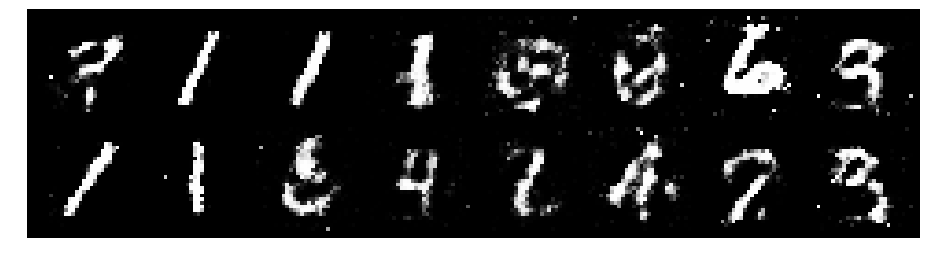

Epoch: [31/50], Batch Num: [500/600]
Discriminator Loss: 1.0922, Generator Loss: 1.3283
D(x): 0.6009, D(G(z)): 0.3364


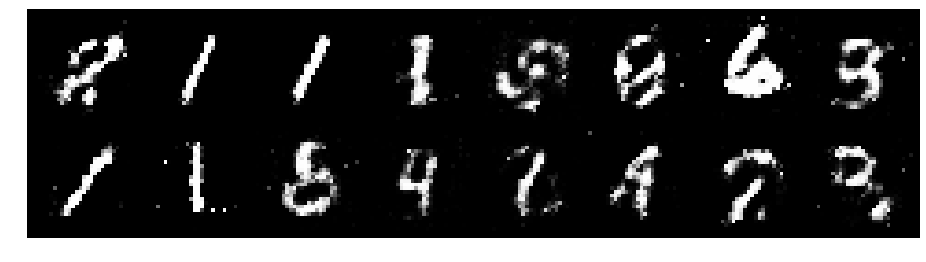

Epoch: [32/50], Batch Num: [0/600]
Discriminator Loss: 1.1304, Generator Loss: 1.3953
D(x): 0.5941, D(G(z)): 0.3537


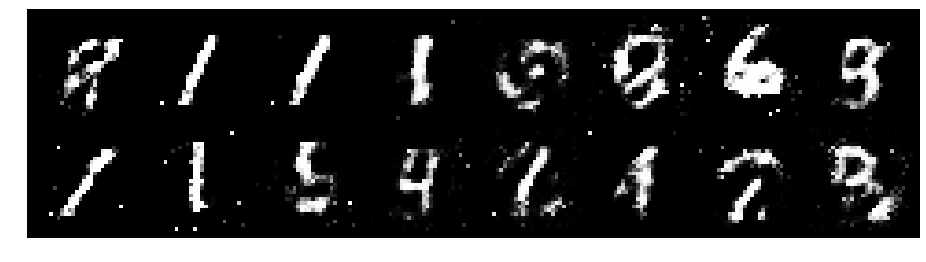

Epoch: [32/50], Batch Num: [100/600]
Discriminator Loss: 0.9941, Generator Loss: 1.1792
D(x): 0.6620, D(G(z)): 0.3583


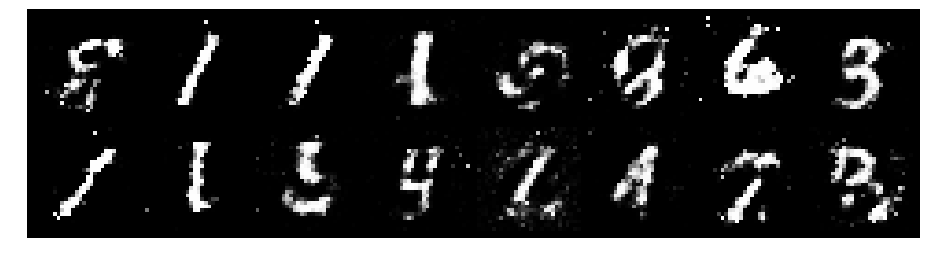

Epoch: [32/50], Batch Num: [200/600]
Discriminator Loss: 0.9370, Generator Loss: 1.0770
D(x): 0.7240, D(G(z)): 0.3743


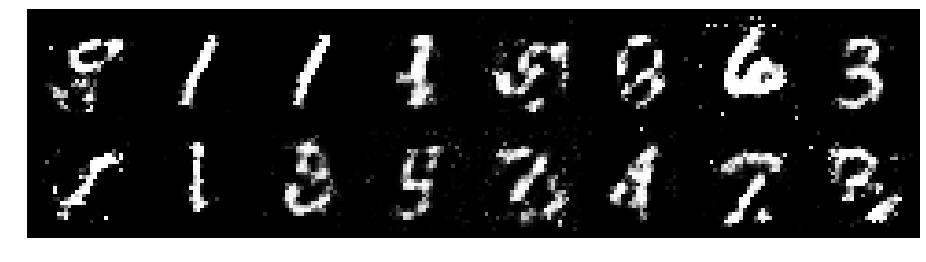

Epoch: [32/50], Batch Num: [300/600]
Discriminator Loss: 1.1209, Generator Loss: 1.2669
D(x): 0.6074, D(G(z)): 0.3720


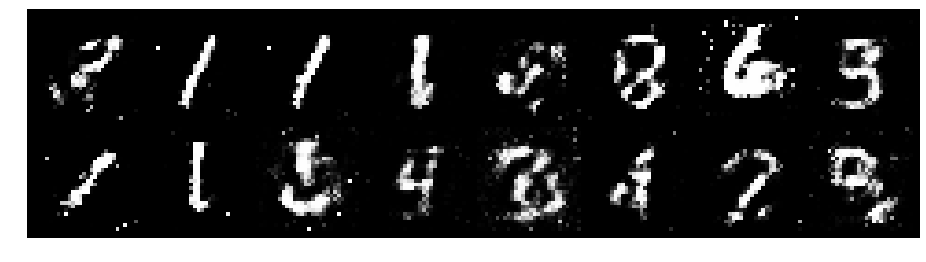

Epoch: [32/50], Batch Num: [400/600]
Discriminator Loss: 1.0012, Generator Loss: 1.1950
D(x): 0.6255, D(G(z)): 0.2989


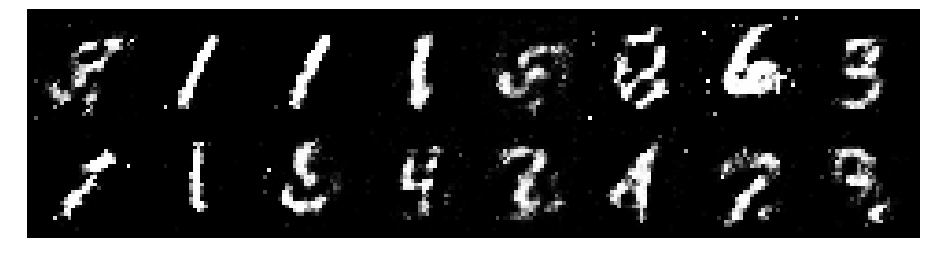

Epoch: [32/50], Batch Num: [500/600]
Discriminator Loss: 0.9670, Generator Loss: 1.3819
D(x): 0.6204, D(G(z)): 0.2895


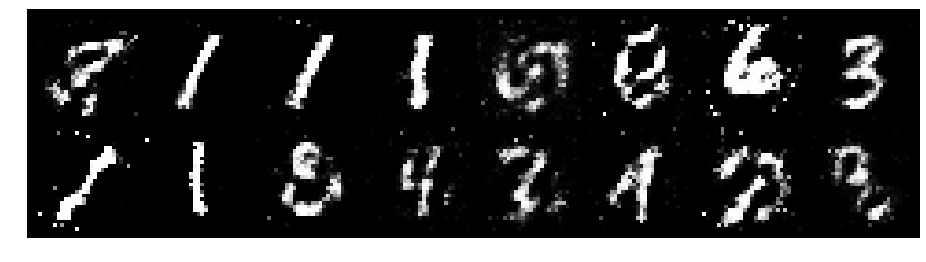

Epoch: [33/50], Batch Num: [0/600]
Discriminator Loss: 1.1066, Generator Loss: 1.2024
D(x): 0.6191, D(G(z)): 0.3076


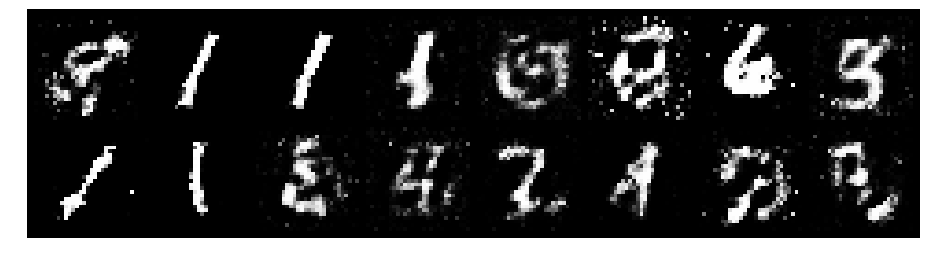

Epoch: [33/50], Batch Num: [100/600]
Discriminator Loss: 1.0558, Generator Loss: 1.3623
D(x): 0.6595, D(G(z)): 0.3479


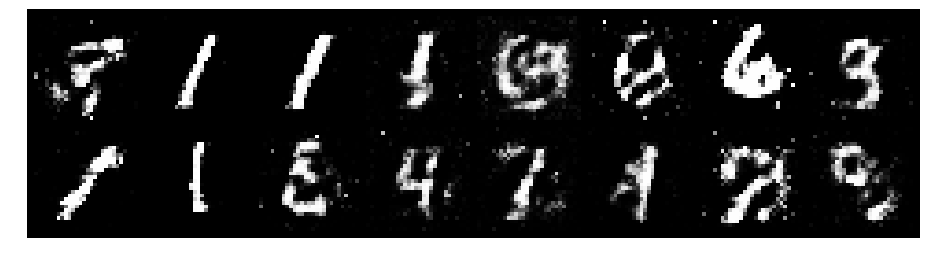

Epoch: [33/50], Batch Num: [200/600]
Discriminator Loss: 1.0593, Generator Loss: 1.1820
D(x): 0.6972, D(G(z)): 0.3844


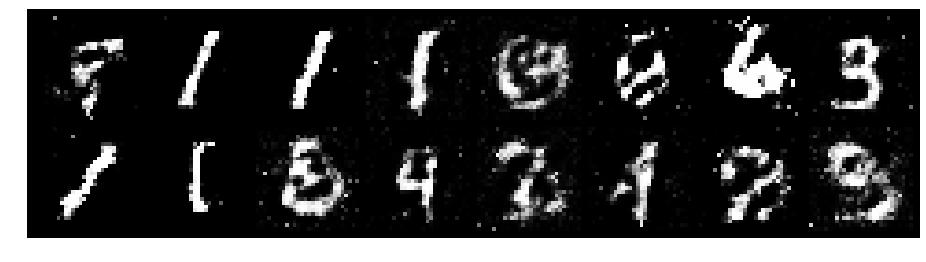

Epoch: [33/50], Batch Num: [300/600]
Discriminator Loss: 1.1560, Generator Loss: 1.2554
D(x): 0.6044, D(G(z)): 0.3678


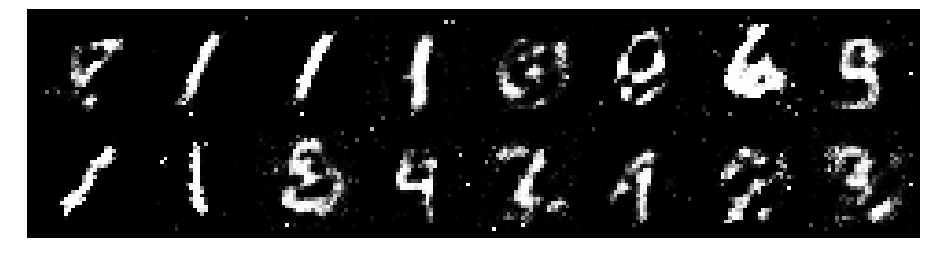

Epoch: [33/50], Batch Num: [400/600]
Discriminator Loss: 1.1520, Generator Loss: 1.5938
D(x): 0.5587, D(G(z)): 0.2901


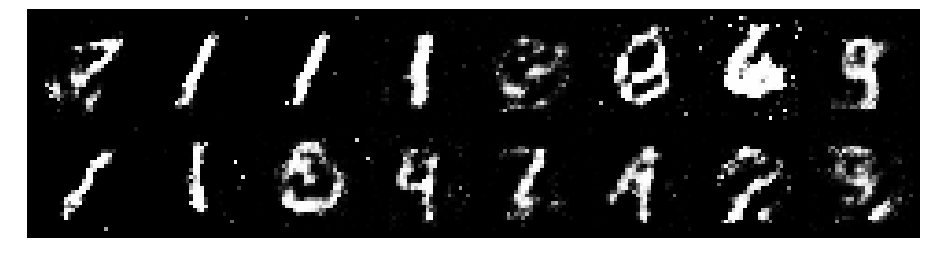

Epoch: [33/50], Batch Num: [500/600]
Discriminator Loss: 1.0542, Generator Loss: 1.0990
D(x): 0.6219, D(G(z)): 0.3499


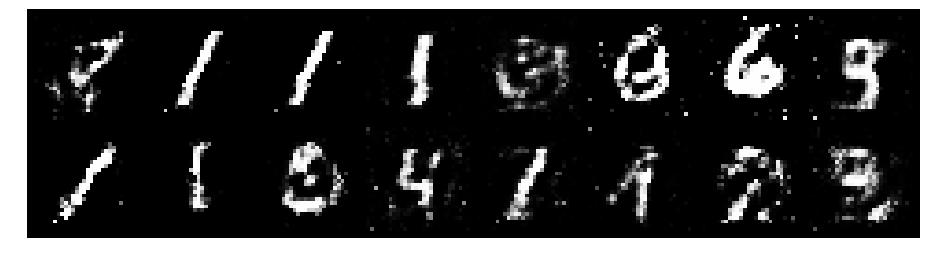

Epoch: [34/50], Batch Num: [0/600]
Discriminator Loss: 1.0869, Generator Loss: 1.1575
D(x): 0.6197, D(G(z)): 0.3494


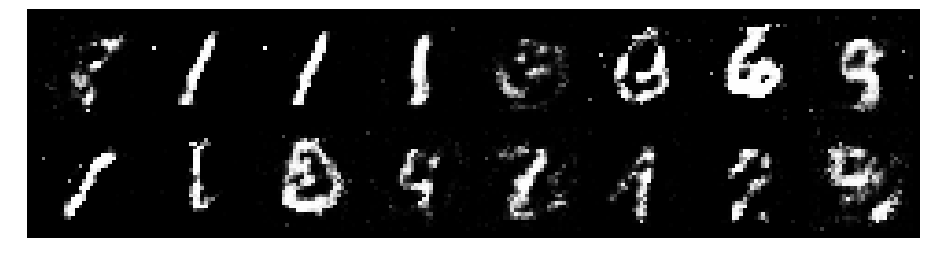

Epoch: [34/50], Batch Num: [100/600]
Discriminator Loss: 1.1158, Generator Loss: 1.2706
D(x): 0.6904, D(G(z)): 0.3966


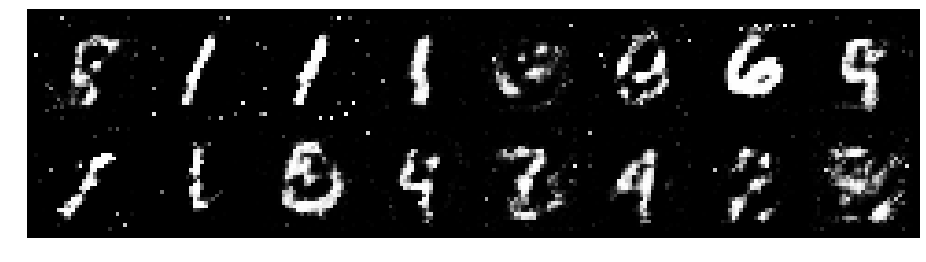

Epoch: [34/50], Batch Num: [200/600]
Discriminator Loss: 1.1159, Generator Loss: 1.0818
D(x): 0.6191, D(G(z)): 0.3592


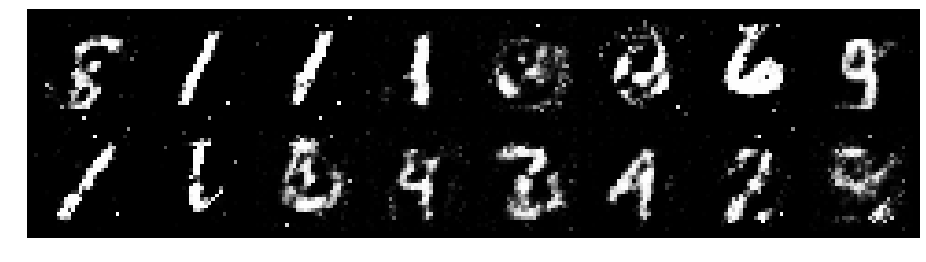

Epoch: [34/50], Batch Num: [300/600]
Discriminator Loss: 1.0207, Generator Loss: 1.2925
D(x): 0.6503, D(G(z)): 0.3754


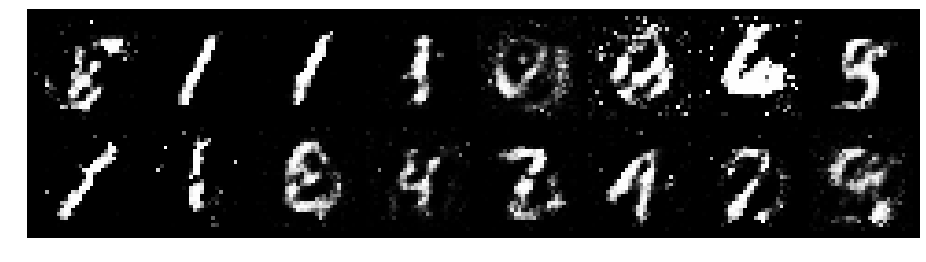

Epoch: [34/50], Batch Num: [400/600]
Discriminator Loss: 1.1774, Generator Loss: 1.3255
D(x): 0.6144, D(G(z)): 0.3819


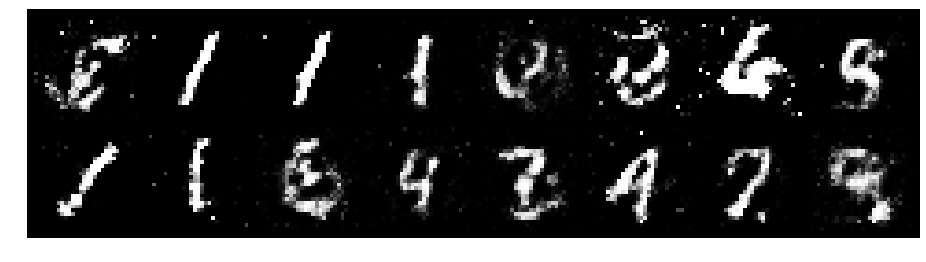

Epoch: [34/50], Batch Num: [500/600]
Discriminator Loss: 1.1528, Generator Loss: 1.2427
D(x): 0.5456, D(G(z)): 0.3235


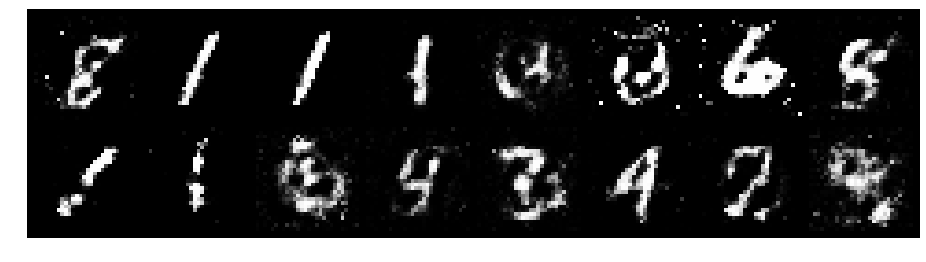

Epoch: [35/50], Batch Num: [0/600]
Discriminator Loss: 1.0355, Generator Loss: 1.3571
D(x): 0.6490, D(G(z)): 0.3482


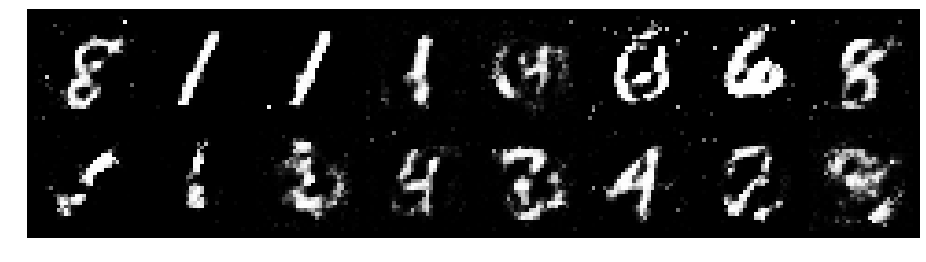

Epoch: [35/50], Batch Num: [100/600]
Discriminator Loss: 1.0160, Generator Loss: 1.0023
D(x): 0.7312, D(G(z)): 0.4040


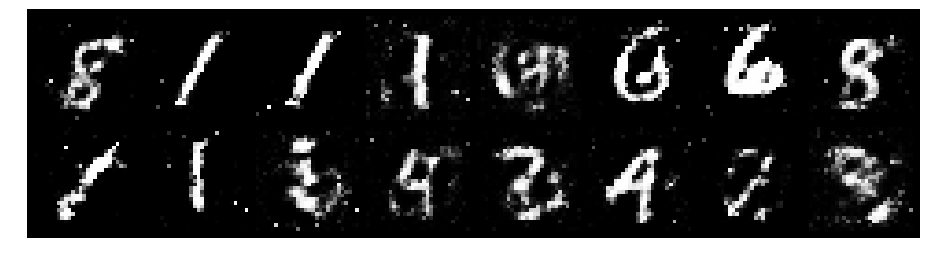

Epoch: [35/50], Batch Num: [200/600]
Discriminator Loss: 1.0607, Generator Loss: 1.0496
D(x): 0.6443, D(G(z)): 0.3764


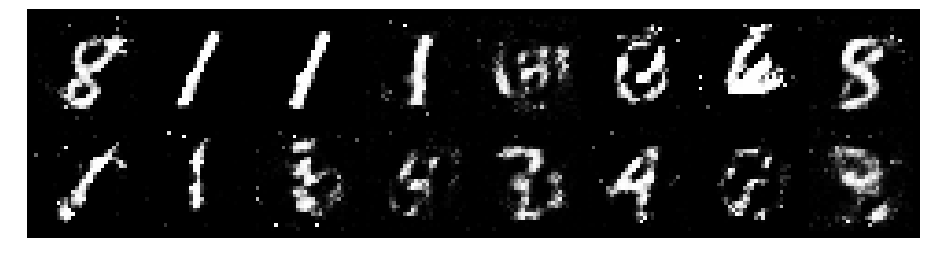

Epoch: [35/50], Batch Num: [300/600]
Discriminator Loss: 1.1903, Generator Loss: 1.1702
D(x): 0.6135, D(G(z)): 0.4160


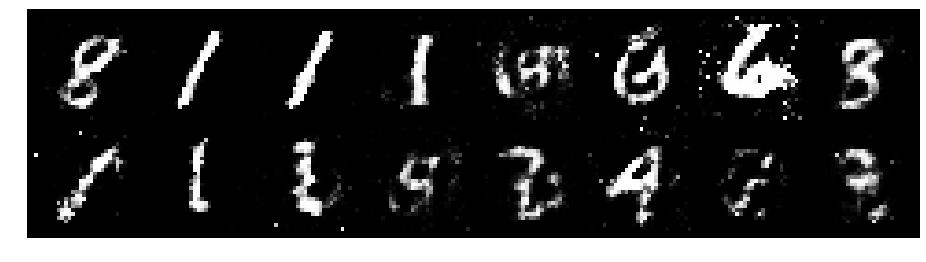

Epoch: [35/50], Batch Num: [400/600]
Discriminator Loss: 1.1935, Generator Loss: 1.1156
D(x): 0.6055, D(G(z)): 0.3985


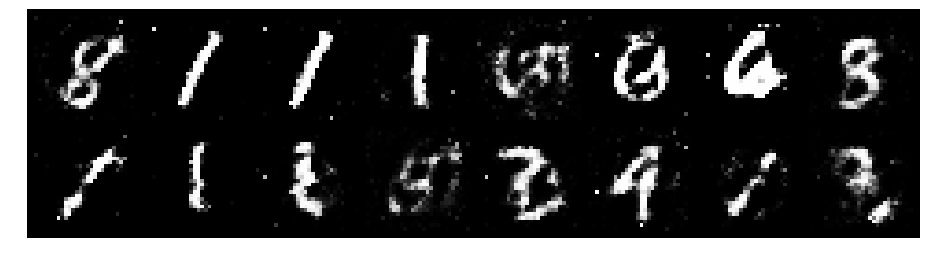

Epoch: [35/50], Batch Num: [500/600]
Discriminator Loss: 1.0101, Generator Loss: 1.1886
D(x): 0.6728, D(G(z)): 0.3796


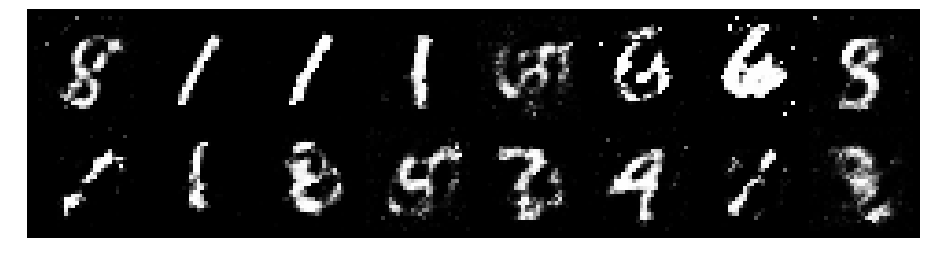

Epoch: [36/50], Batch Num: [0/600]
Discriminator Loss: 1.0927, Generator Loss: 0.8985
D(x): 0.6250, D(G(z)): 0.3843


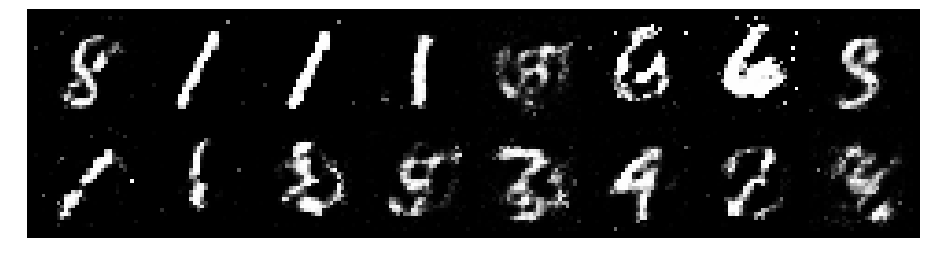

Epoch: [36/50], Batch Num: [100/600]
Discriminator Loss: 1.1251, Generator Loss: 1.6728
D(x): 0.6080, D(G(z)): 0.3023


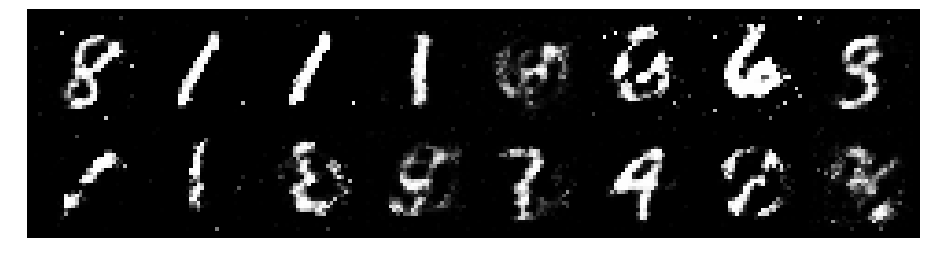

Epoch: [36/50], Batch Num: [200/600]
Discriminator Loss: 1.2649, Generator Loss: 1.0705
D(x): 0.5856, D(G(z)): 0.4366


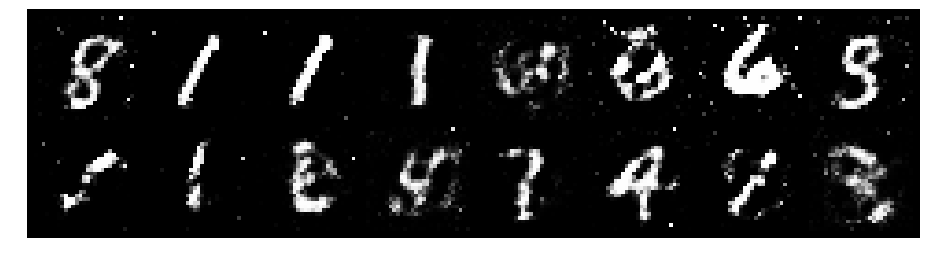

Epoch: [36/50], Batch Num: [300/600]
Discriminator Loss: 1.0620, Generator Loss: 0.9859
D(x): 0.6730, D(G(z)): 0.4152


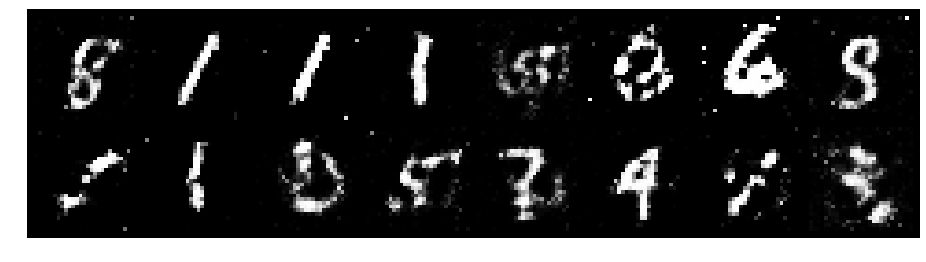

Epoch: [36/50], Batch Num: [400/600]
Discriminator Loss: 1.0175, Generator Loss: 0.9941
D(x): 0.7080, D(G(z)): 0.4096


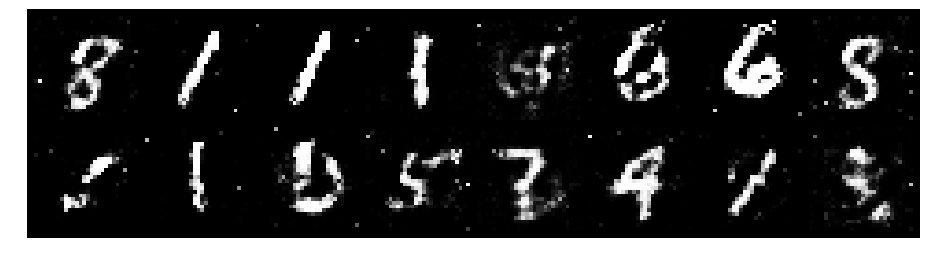

Epoch: [36/50], Batch Num: [500/600]
Discriminator Loss: 1.2511, Generator Loss: 1.0531
D(x): 0.6114, D(G(z)): 0.4430


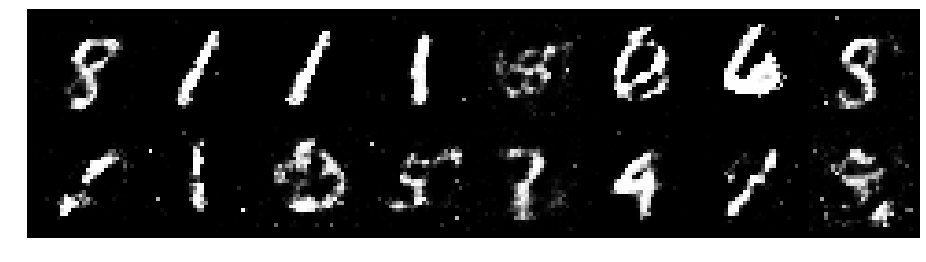

Epoch: [37/50], Batch Num: [0/600]
Discriminator Loss: 1.0937, Generator Loss: 1.1316
D(x): 0.6247, D(G(z)): 0.3450


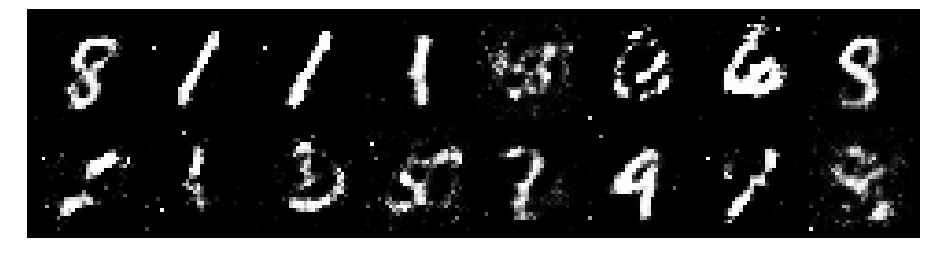

Epoch: [37/50], Batch Num: [100/600]
Discriminator Loss: 1.0472, Generator Loss: 1.3265
D(x): 0.6096, D(G(z)): 0.3359


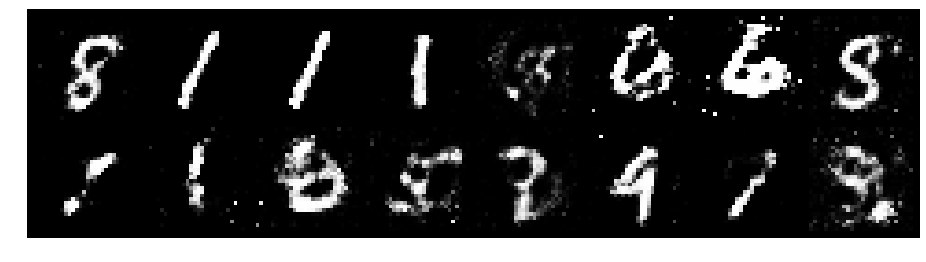

Epoch: [37/50], Batch Num: [200/600]
Discriminator Loss: 1.1198, Generator Loss: 1.4086
D(x): 0.6119, D(G(z)): 0.3491


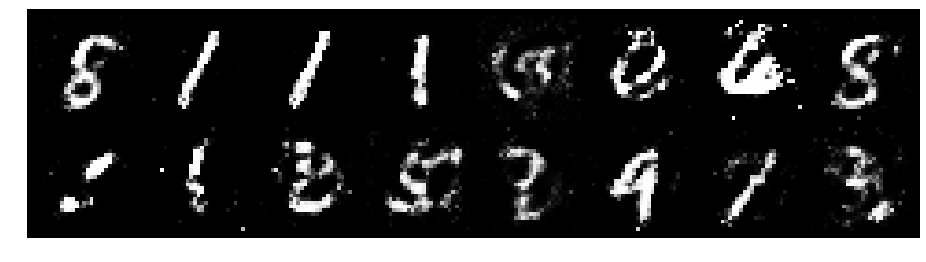

Epoch: [37/50], Batch Num: [300/600]
Discriminator Loss: 1.2439, Generator Loss: 1.1186
D(x): 0.5339, D(G(z)): 0.3636


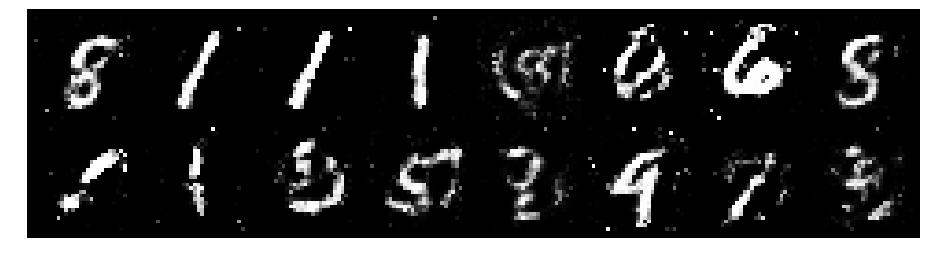

Epoch: [37/50], Batch Num: [400/600]
Discriminator Loss: 1.0524, Generator Loss: 1.2869
D(x): 0.6374, D(G(z)): 0.3708


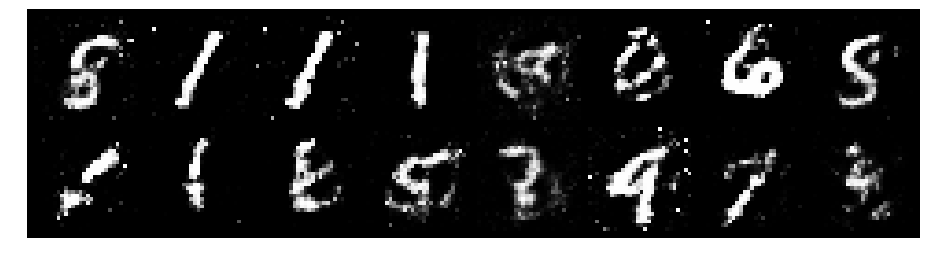

Epoch: [37/50], Batch Num: [500/600]
Discriminator Loss: 1.1806, Generator Loss: 1.4111
D(x): 0.5759, D(G(z)): 0.3798


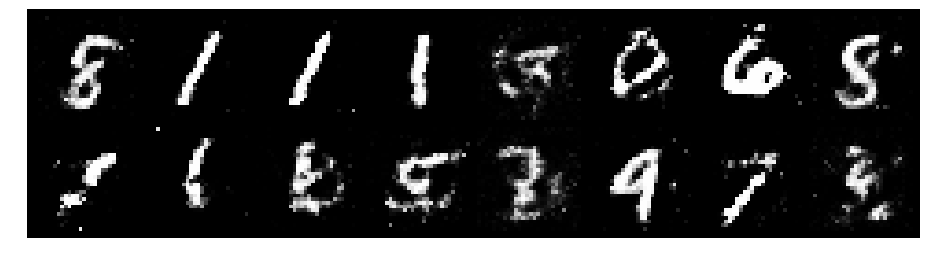

Epoch: [38/50], Batch Num: [0/600]
Discriminator Loss: 1.1442, Generator Loss: 1.2174
D(x): 0.6128, D(G(z)): 0.3618


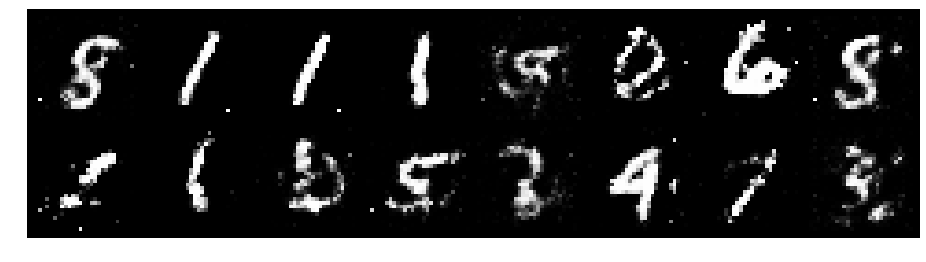

Epoch: [38/50], Batch Num: [100/600]
Discriminator Loss: 0.9663, Generator Loss: 1.1677
D(x): 0.6583, D(G(z)): 0.3230


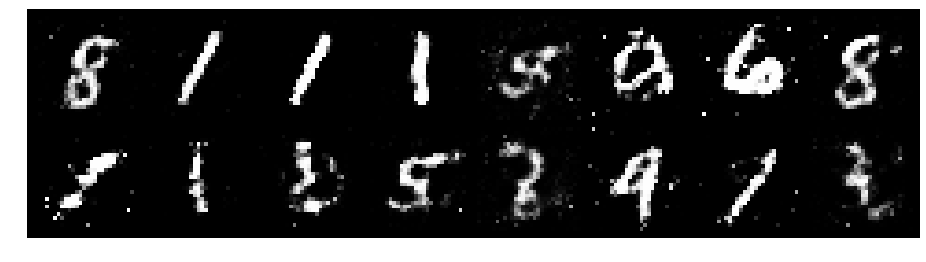

Epoch: [38/50], Batch Num: [200/600]
Discriminator Loss: 1.0335, Generator Loss: 1.0879
D(x): 0.6604, D(G(z)): 0.3886


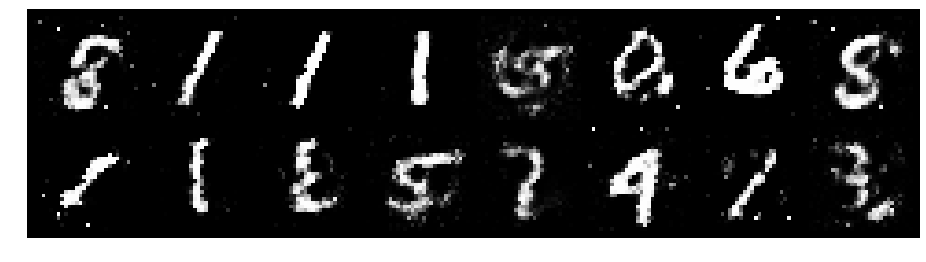

Epoch: [38/50], Batch Num: [300/600]
Discriminator Loss: 1.0172, Generator Loss: 1.4695
D(x): 0.6557, D(G(z)): 0.3200


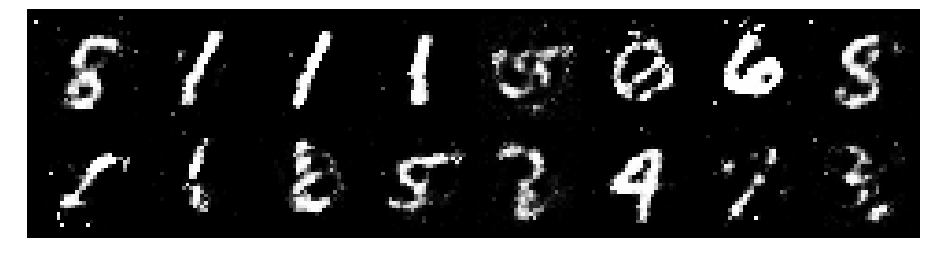

Epoch: [38/50], Batch Num: [400/600]
Discriminator Loss: 0.9107, Generator Loss: 1.1379
D(x): 0.7515, D(G(z)): 0.3983


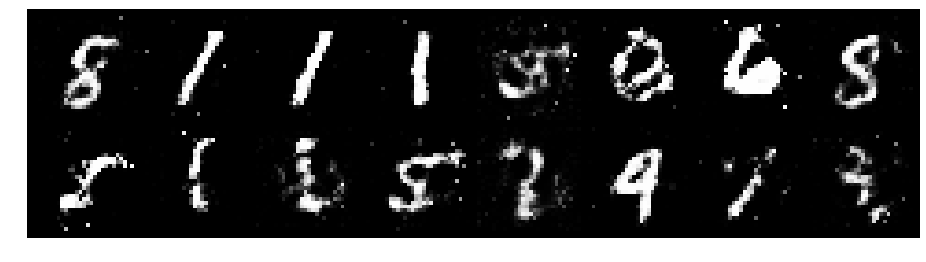

Epoch: [38/50], Batch Num: [500/600]
Discriminator Loss: 1.1774, Generator Loss: 1.4349
D(x): 0.6147, D(G(z)): 0.3754


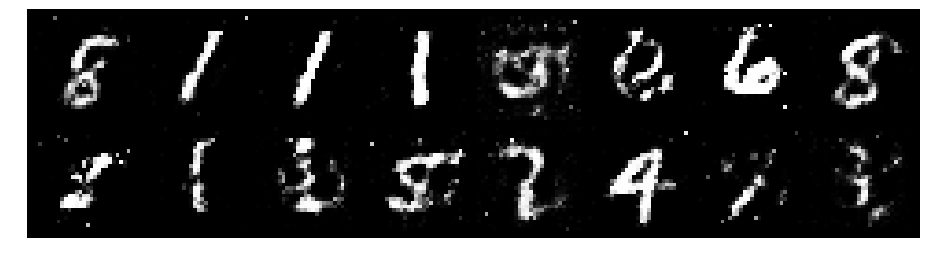

Epoch: [39/50], Batch Num: [0/600]
Discriminator Loss: 1.2334, Generator Loss: 1.4033
D(x): 0.5712, D(G(z)): 0.3390


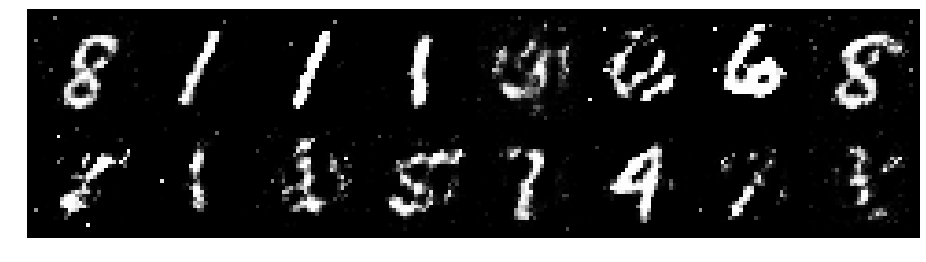

Epoch: [39/50], Batch Num: [100/600]
Discriminator Loss: 1.0943, Generator Loss: 1.2770
D(x): 0.6409, D(G(z)): 0.3816


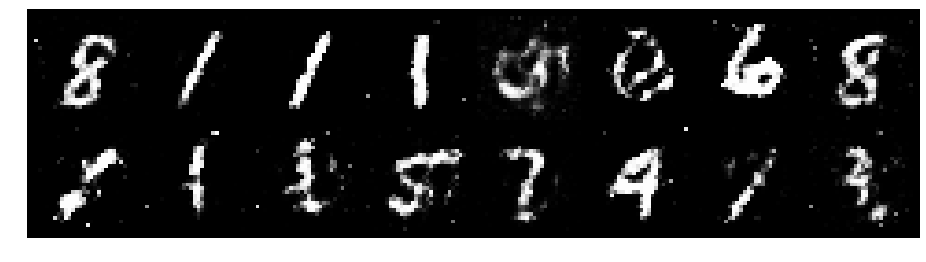

Epoch: [39/50], Batch Num: [200/600]
Discriminator Loss: 1.1877, Generator Loss: 1.1396
D(x): 0.5723, D(G(z)): 0.3371


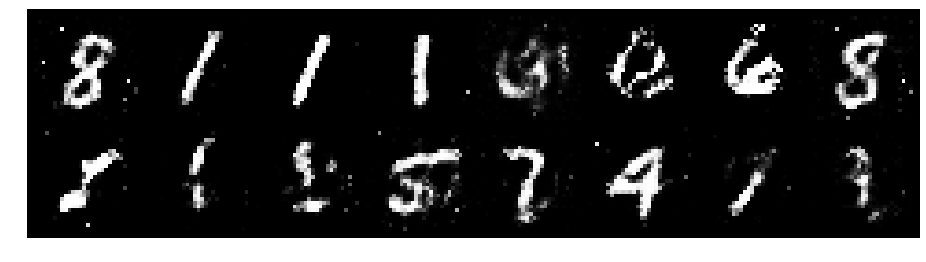

Epoch: [39/50], Batch Num: [300/600]
Discriminator Loss: 1.1180, Generator Loss: 1.1650
D(x): 0.5959, D(G(z)): 0.3479


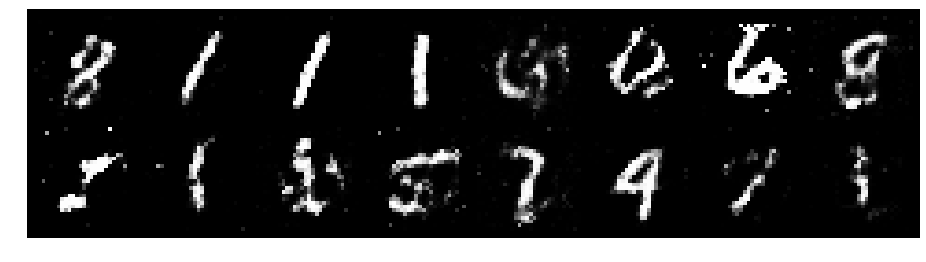

Epoch: [39/50], Batch Num: [400/600]
Discriminator Loss: 1.1032, Generator Loss: 0.8785
D(x): 0.6665, D(G(z)): 0.4091


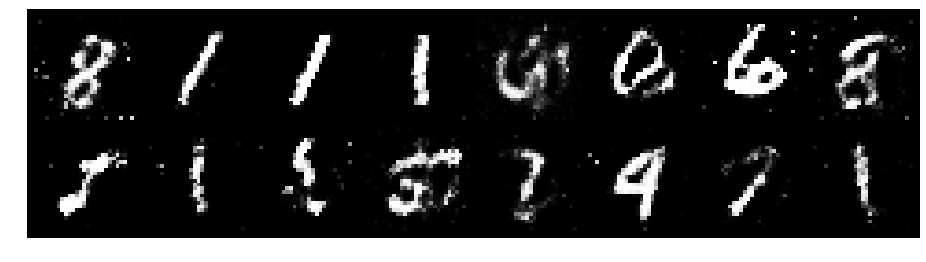

Epoch: [39/50], Batch Num: [500/600]
Discriminator Loss: 1.1490, Generator Loss: 1.1660
D(x): 0.5780, D(G(z)): 0.3638


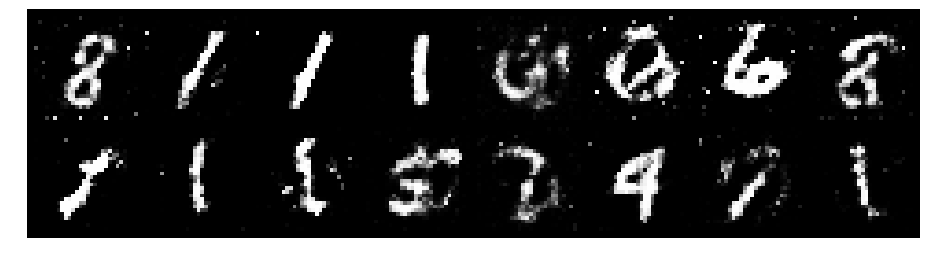

Epoch: [40/50], Batch Num: [0/600]
Discriminator Loss: 1.1245, Generator Loss: 1.0434
D(x): 0.6452, D(G(z)): 0.4220


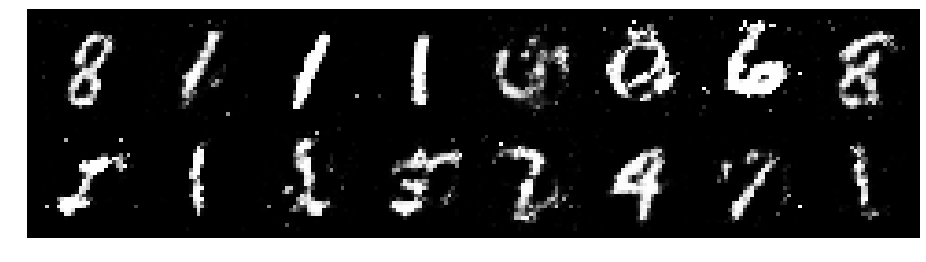

Epoch: [40/50], Batch Num: [100/600]
Discriminator Loss: 1.2056, Generator Loss: 1.0168
D(x): 0.5558, D(G(z)): 0.4008


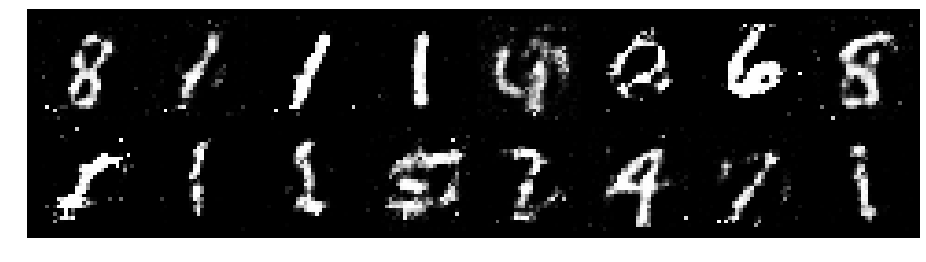

Epoch: [40/50], Batch Num: [200/600]
Discriminator Loss: 1.1597, Generator Loss: 1.1092
D(x): 0.5599, D(G(z)): 0.3625


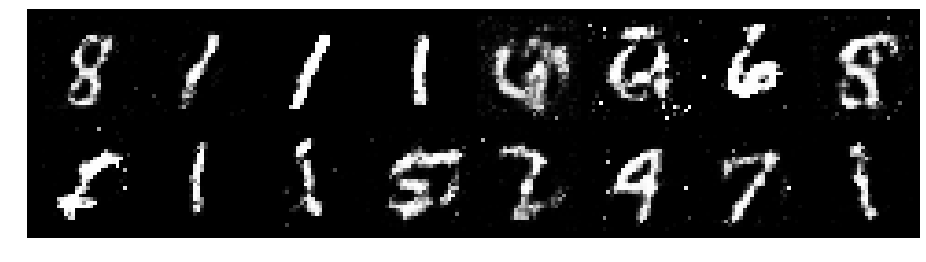

Epoch: [40/50], Batch Num: [300/600]
Discriminator Loss: 0.9453, Generator Loss: 1.3612
D(x): 0.6795, D(G(z)): 0.3457


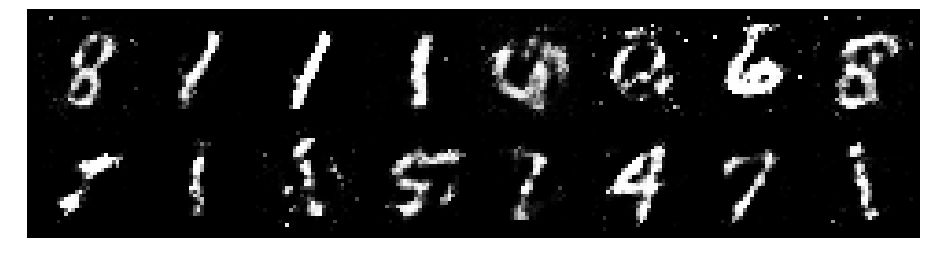

Epoch: [40/50], Batch Num: [400/600]
Discriminator Loss: 1.1968, Generator Loss: 0.9838
D(x): 0.6404, D(G(z)): 0.4407


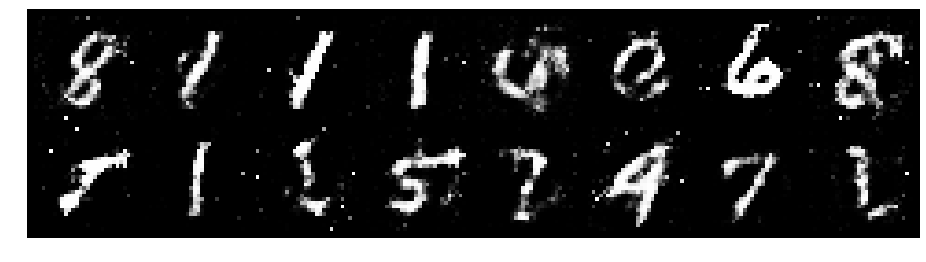

Epoch: [40/50], Batch Num: [500/600]
Discriminator Loss: 1.0774, Generator Loss: 1.2674
D(x): 0.6316, D(G(z)): 0.3781


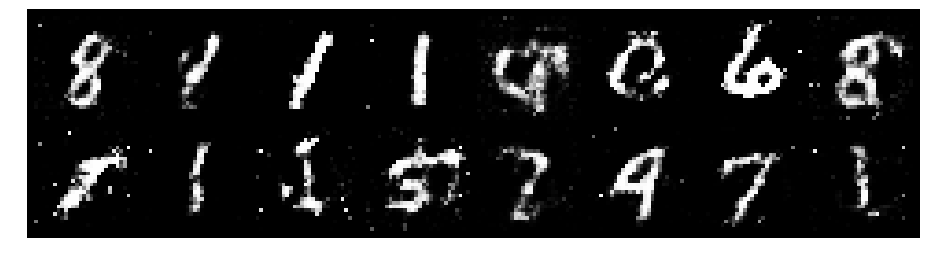

Epoch: [41/50], Batch Num: [0/600]
Discriminator Loss: 0.9841, Generator Loss: 1.2425
D(x): 0.6601, D(G(z)): 0.3303


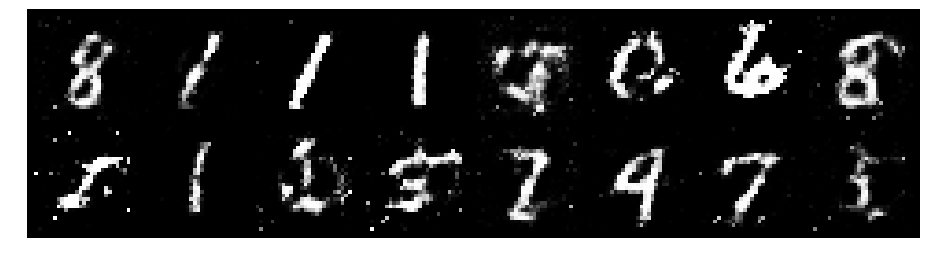

Epoch: [41/50], Batch Num: [100/600]
Discriminator Loss: 1.1114, Generator Loss: 1.1875
D(x): 0.5930, D(G(z)): 0.3367


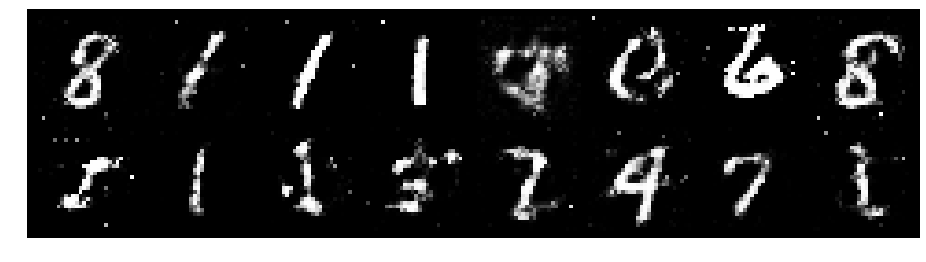

Epoch: [41/50], Batch Num: [200/600]
Discriminator Loss: 1.1618, Generator Loss: 1.4420
D(x): 0.5524, D(G(z)): 0.3354


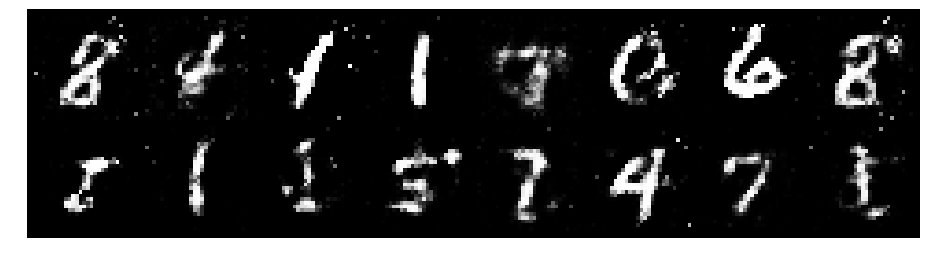

Epoch: [41/50], Batch Num: [300/600]
Discriminator Loss: 1.1343, Generator Loss: 1.3559
D(x): 0.6176, D(G(z)): 0.3684


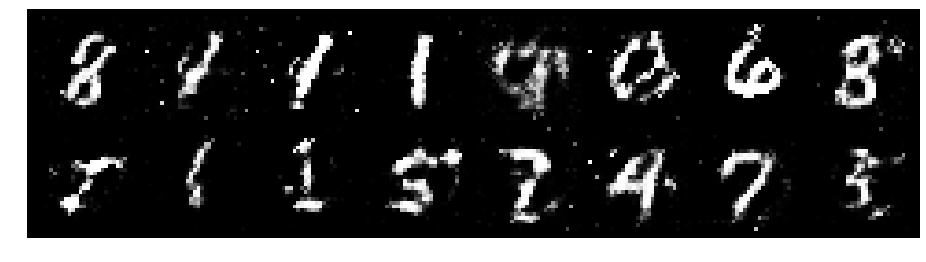

Epoch: [41/50], Batch Num: [400/600]
Discriminator Loss: 1.0795, Generator Loss: 1.1905
D(x): 0.6110, D(G(z)): 0.3357


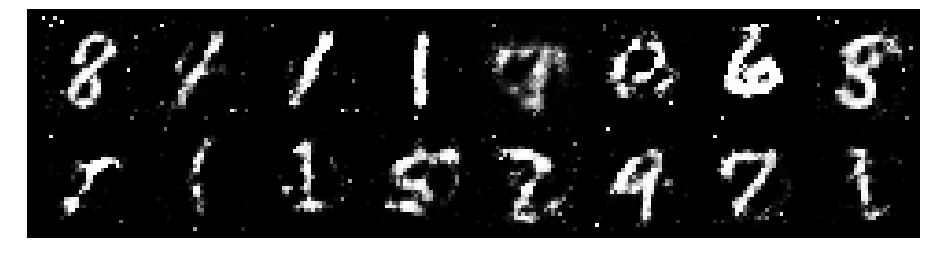

Epoch: [41/50], Batch Num: [500/600]
Discriminator Loss: 1.1161, Generator Loss: 1.1889
D(x): 0.6107, D(G(z)): 0.3705


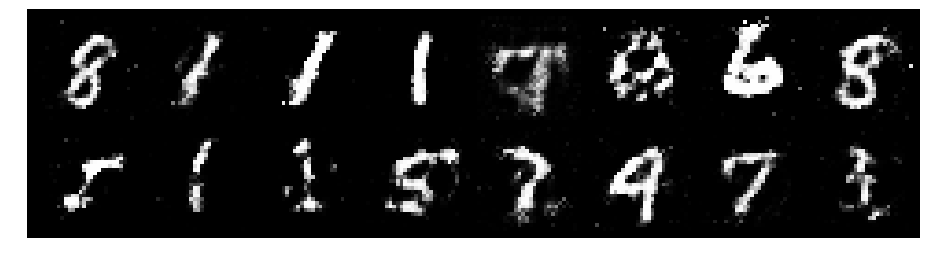

Epoch: [42/50], Batch Num: [0/600]
Discriminator Loss: 1.0590, Generator Loss: 1.1407
D(x): 0.6250, D(G(z)): 0.3548


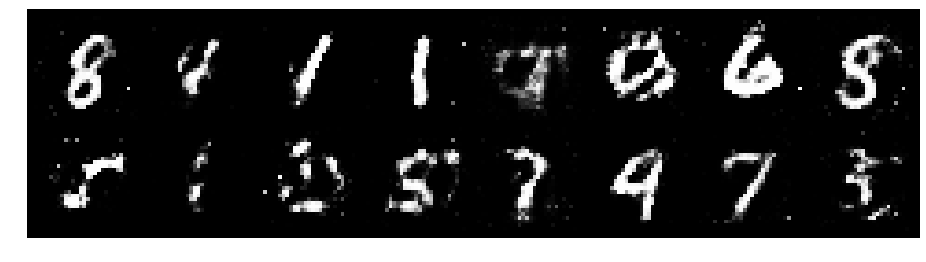

Epoch: [42/50], Batch Num: [100/600]
Discriminator Loss: 1.0975, Generator Loss: 1.0799
D(x): 0.6546, D(G(z)): 0.4064


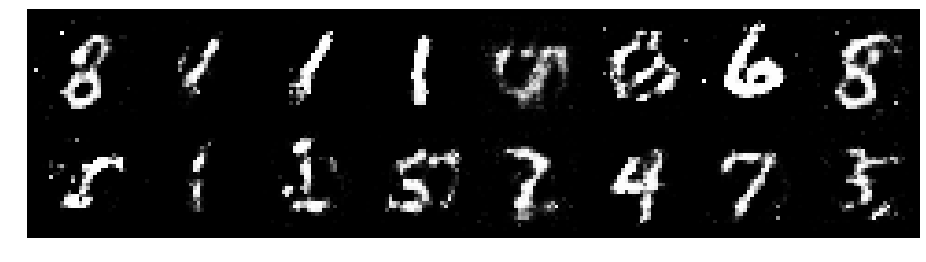

Epoch: [42/50], Batch Num: [200/600]
Discriminator Loss: 1.1059, Generator Loss: 1.0406
D(x): 0.6351, D(G(z)): 0.3780


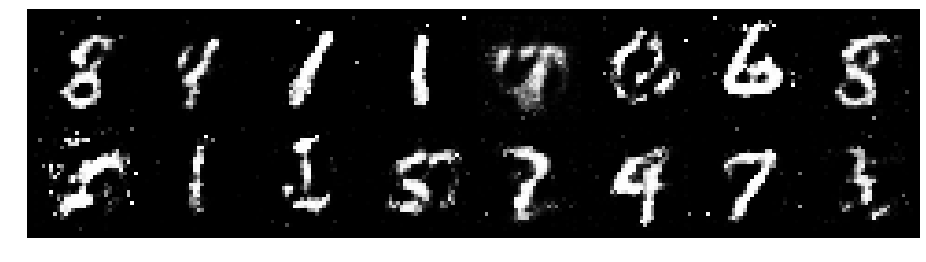

Epoch: [42/50], Batch Num: [300/600]
Discriminator Loss: 1.0830, Generator Loss: 1.5187
D(x): 0.6640, D(G(z)): 0.3946


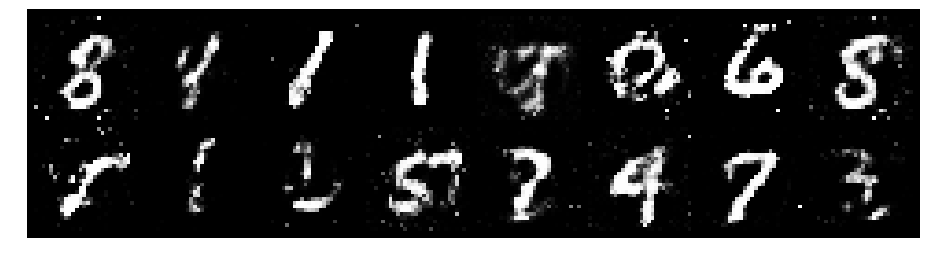

Epoch: [42/50], Batch Num: [400/600]
Discriminator Loss: 1.1740, Generator Loss: 1.3715
D(x): 0.6768, D(G(z)): 0.3935


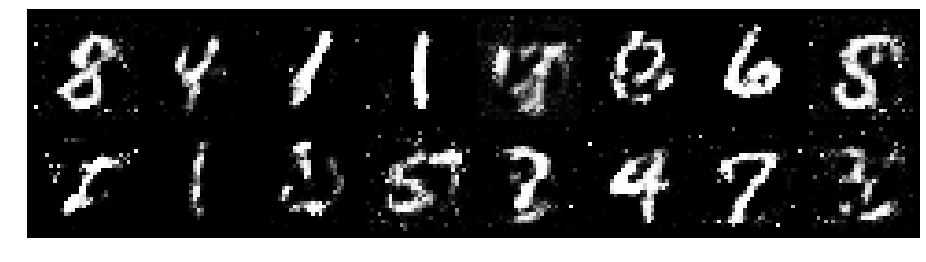

Epoch: [42/50], Batch Num: [500/600]
Discriminator Loss: 1.1309, Generator Loss: 1.1403
D(x): 0.6629, D(G(z)): 0.4480


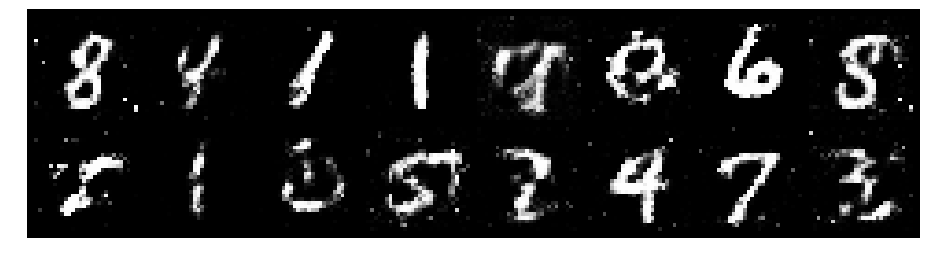

Epoch: [43/50], Batch Num: [0/600]
Discriminator Loss: 1.1303, Generator Loss: 0.9568
D(x): 0.6347, D(G(z)): 0.4204


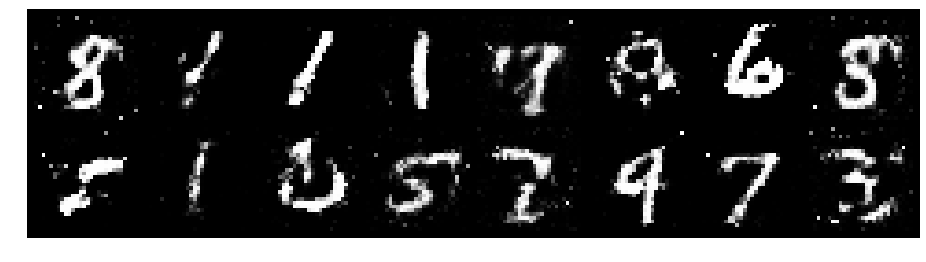

Epoch: [43/50], Batch Num: [100/600]
Discriminator Loss: 1.2012, Generator Loss: 1.2316
D(x): 0.5268, D(G(z)): 0.3125


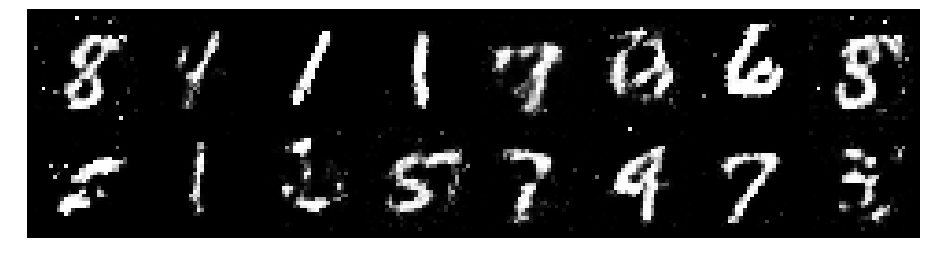

Epoch: [43/50], Batch Num: [200/600]
Discriminator Loss: 1.0400, Generator Loss: 1.2648
D(x): 0.6508, D(G(z)): 0.3870


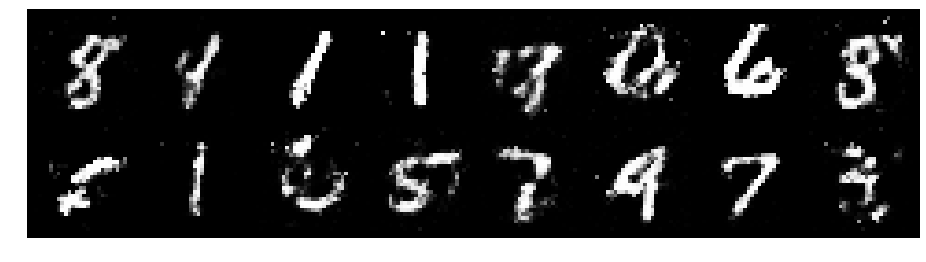

Epoch: [43/50], Batch Num: [300/600]
Discriminator Loss: 0.9975, Generator Loss: 1.1920
D(x): 0.6763, D(G(z)): 0.3627


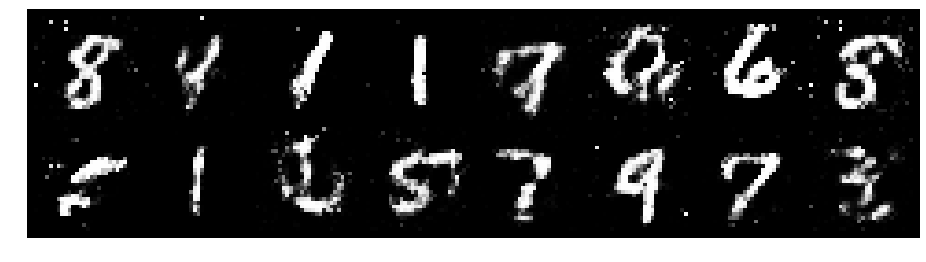

Epoch: [43/50], Batch Num: [400/600]
Discriminator Loss: 1.1881, Generator Loss: 1.1943
D(x): 0.5500, D(G(z)): 0.3600


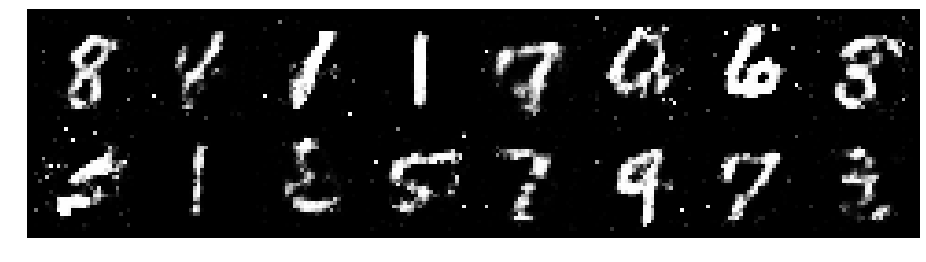

Epoch: [43/50], Batch Num: [500/600]
Discriminator Loss: 0.9917, Generator Loss: 1.2810
D(x): 0.6309, D(G(z)): 0.3329


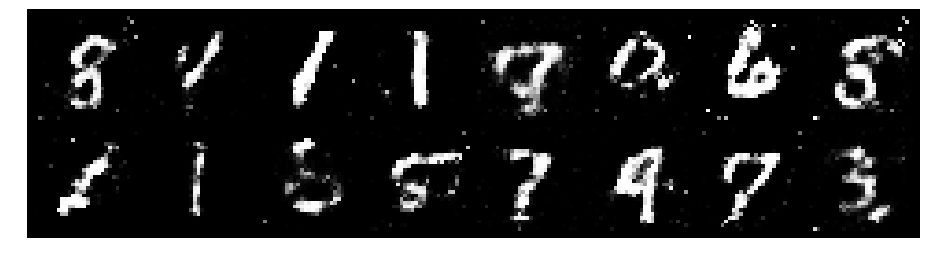

Epoch: [44/50], Batch Num: [0/600]
Discriminator Loss: 1.1582, Generator Loss: 1.0593
D(x): 0.6102, D(G(z)): 0.4056


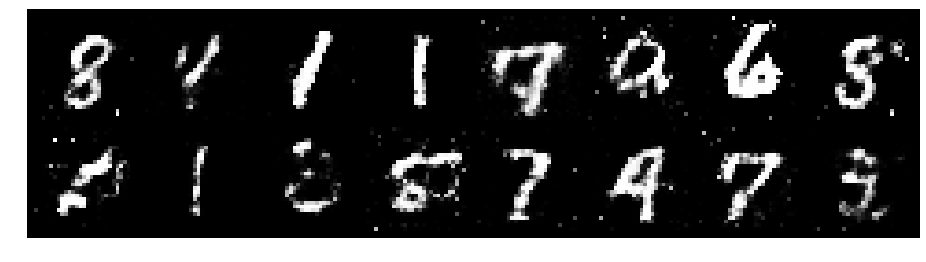

Epoch: [44/50], Batch Num: [100/600]
Discriminator Loss: 1.2051, Generator Loss: 1.2553
D(x): 0.5968, D(G(z)): 0.4087


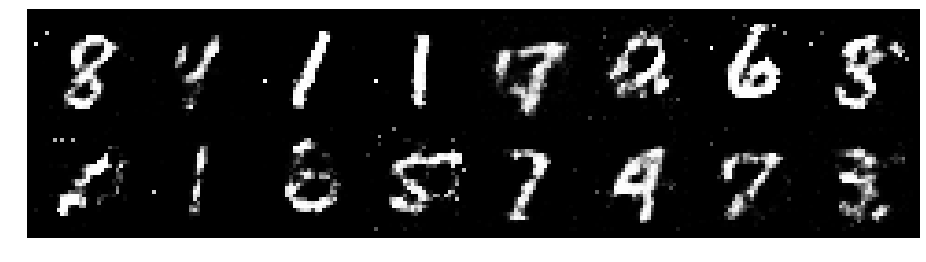

Epoch: [44/50], Batch Num: [200/600]
Discriminator Loss: 1.1168, Generator Loss: 1.2326
D(x): 0.6146, D(G(z)): 0.3976


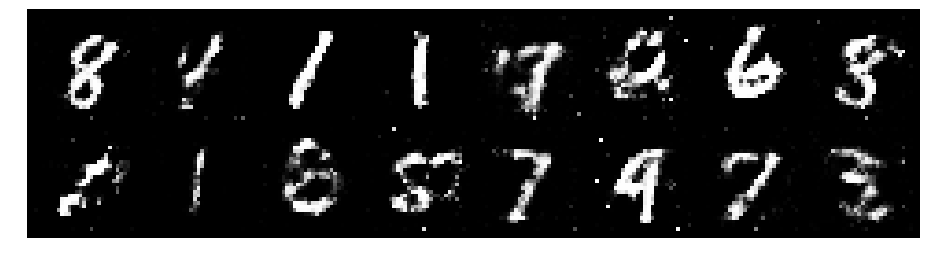

Epoch: [44/50], Batch Num: [300/600]
Discriminator Loss: 1.0850, Generator Loss: 1.0668
D(x): 0.6582, D(G(z)): 0.4208


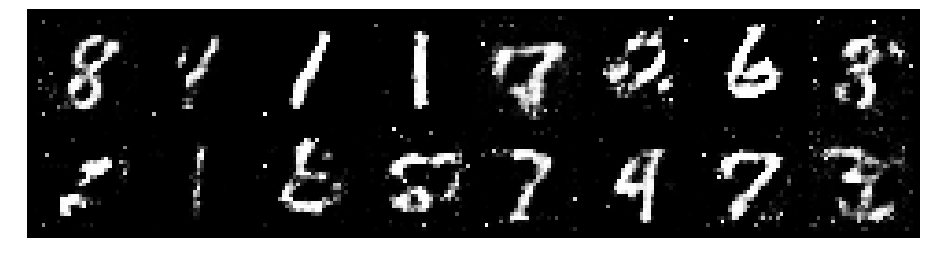

Epoch: [44/50], Batch Num: [400/600]
Discriminator Loss: 1.1189, Generator Loss: 1.1888
D(x): 0.5684, D(G(z)): 0.3446


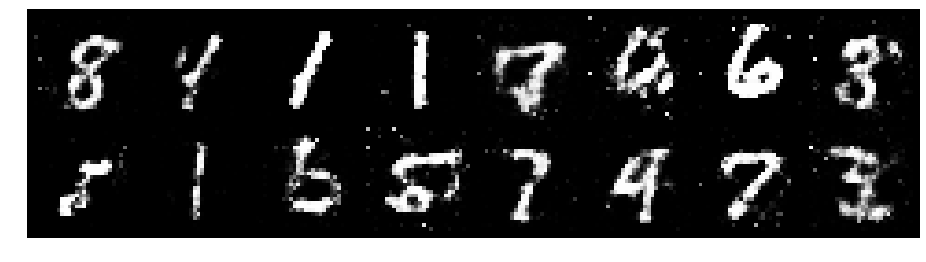

Epoch: [44/50], Batch Num: [500/600]
Discriminator Loss: 1.2469, Generator Loss: 1.1970
D(x): 0.6026, D(G(z)): 0.4354


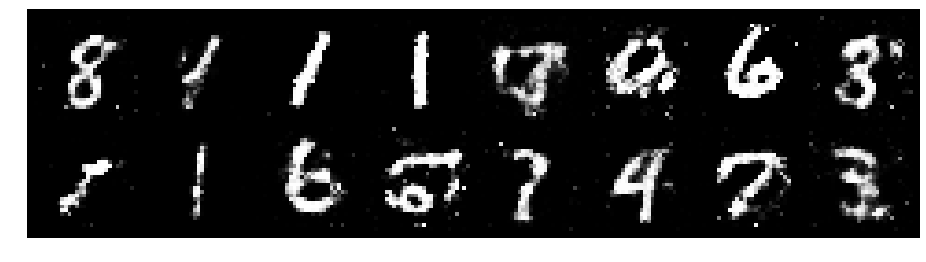

Epoch: [45/50], Batch Num: [0/600]
Discriminator Loss: 1.1137, Generator Loss: 0.9771
D(x): 0.5941, D(G(z)): 0.3897


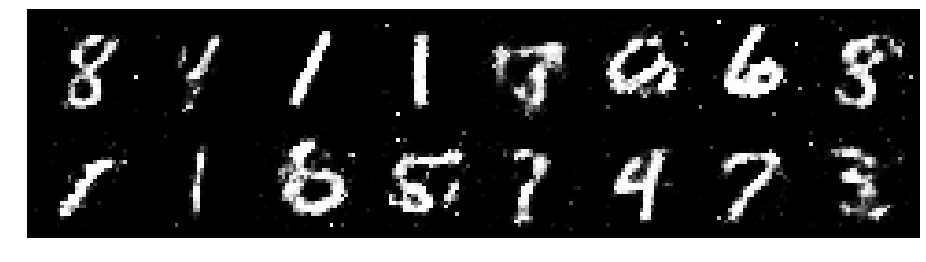

Epoch: [45/50], Batch Num: [100/600]
Discriminator Loss: 1.1926, Generator Loss: 1.3552
D(x): 0.5278, D(G(z)): 0.3052


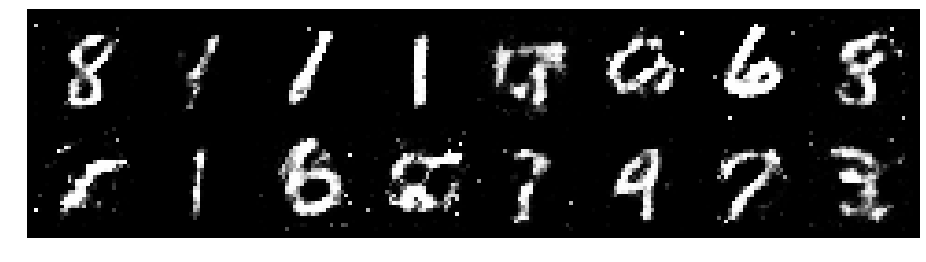

Epoch: [45/50], Batch Num: [200/600]
Discriminator Loss: 1.2004, Generator Loss: 1.1473
D(x): 0.6080, D(G(z)): 0.4090


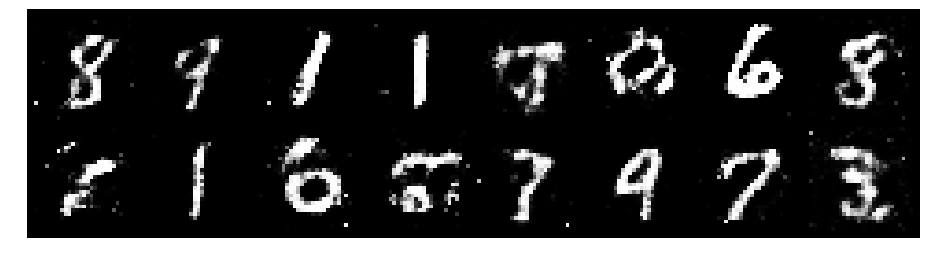

Epoch: [45/50], Batch Num: [300/600]
Discriminator Loss: 1.0452, Generator Loss: 1.0342
D(x): 0.5932, D(G(z)): 0.3583


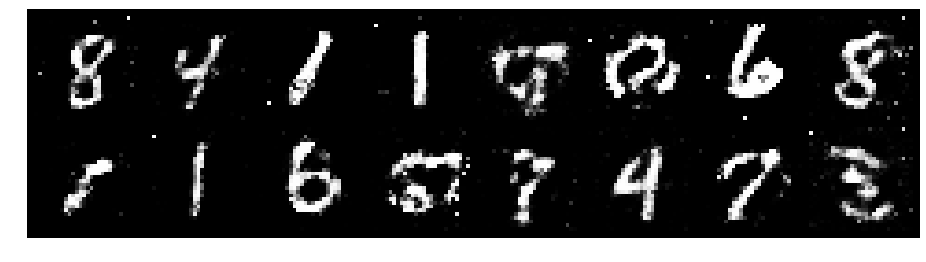

Epoch: [45/50], Batch Num: [400/600]
Discriminator Loss: 1.0631, Generator Loss: 1.0520
D(x): 0.6185, D(G(z)): 0.3447


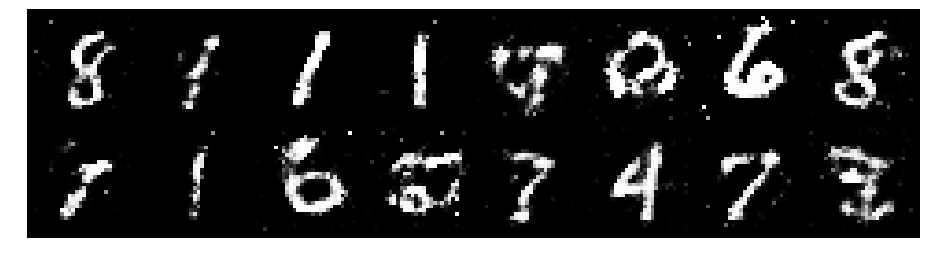

Epoch: [45/50], Batch Num: [500/600]
Discriminator Loss: 1.1343, Generator Loss: 1.0524
D(x): 0.6014, D(G(z)): 0.3828


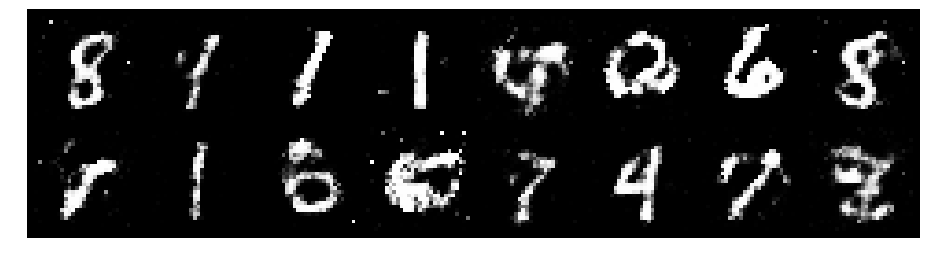

Epoch: [46/50], Batch Num: [0/600]
Discriminator Loss: 1.1871, Generator Loss: 1.1607
D(x): 0.5753, D(G(z)): 0.4007


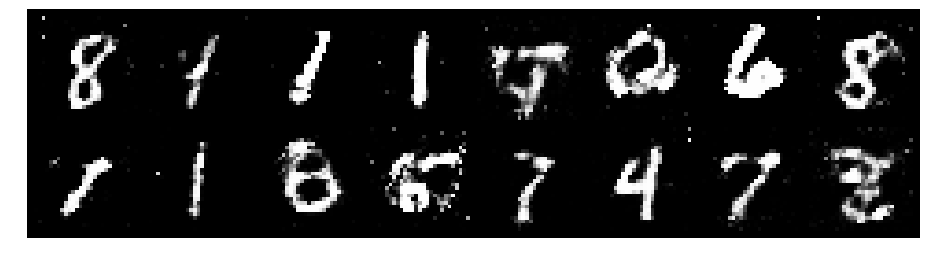

Epoch: [46/50], Batch Num: [100/600]
Discriminator Loss: 1.2538, Generator Loss: 1.1818
D(x): 0.6172, D(G(z)): 0.4297


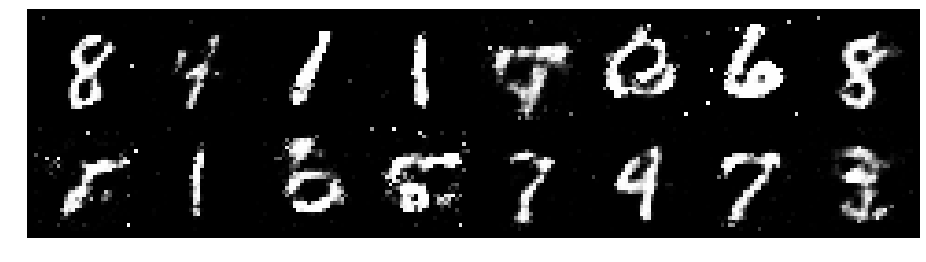

Epoch: [46/50], Batch Num: [200/600]
Discriminator Loss: 1.3579, Generator Loss: 0.7476
D(x): 0.6211, D(G(z)): 0.5220


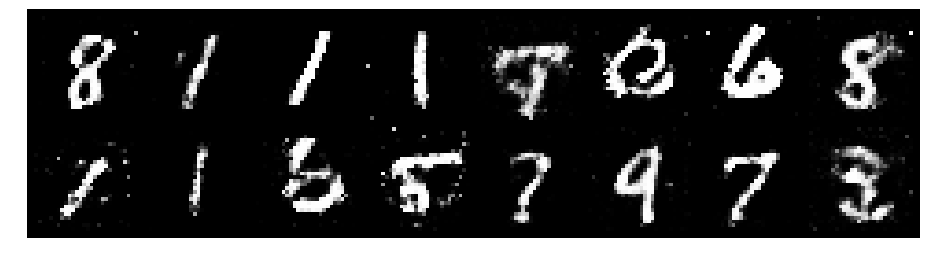

Epoch: [46/50], Batch Num: [300/600]
Discriminator Loss: 1.1702, Generator Loss: 1.3292
D(x): 0.5711, D(G(z)): 0.3503


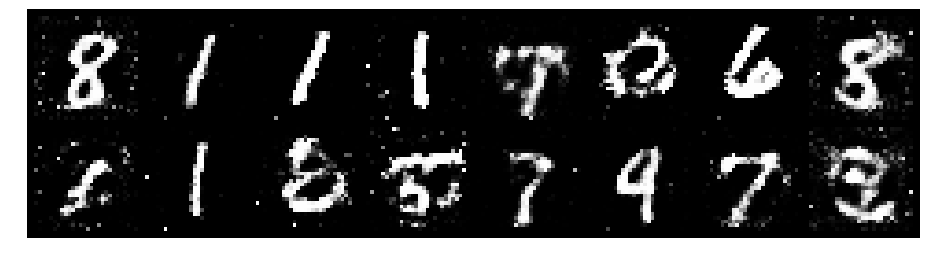

Epoch: [46/50], Batch Num: [400/600]
Discriminator Loss: 1.1508, Generator Loss: 0.9991
D(x): 0.6080, D(G(z)): 0.4005


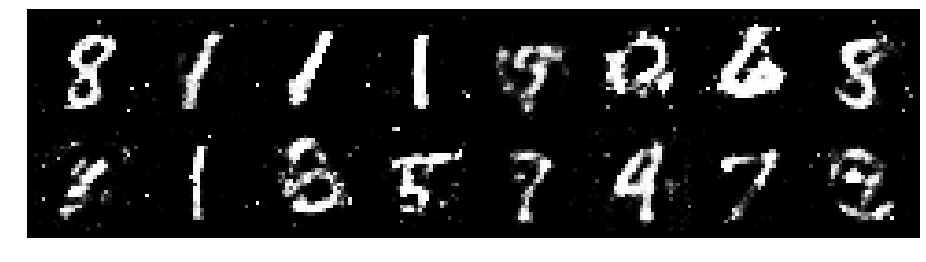

Epoch: [46/50], Batch Num: [500/600]
Discriminator Loss: 1.1224, Generator Loss: 1.0569
D(x): 0.5822, D(G(z)): 0.3670


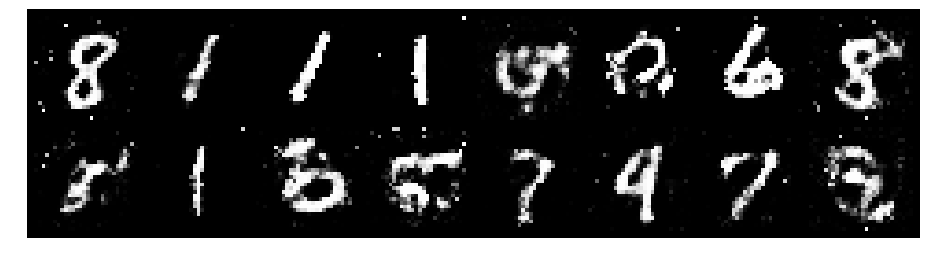

Epoch: [47/50], Batch Num: [0/600]
Discriminator Loss: 1.1429, Generator Loss: 1.2670
D(x): 0.6237, D(G(z)): 0.3803


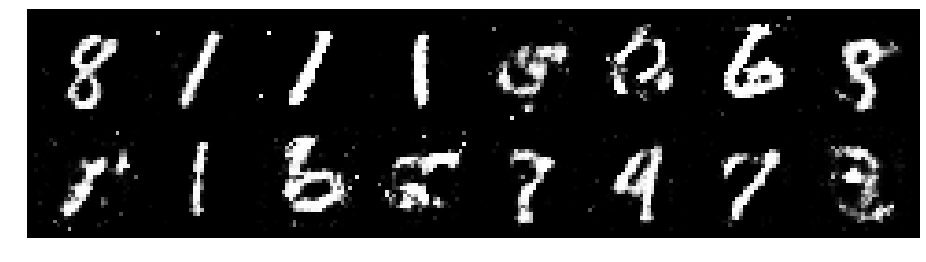

Epoch: [47/50], Batch Num: [100/600]
Discriminator Loss: 1.1487, Generator Loss: 1.4145
D(x): 0.6432, D(G(z)): 0.4070


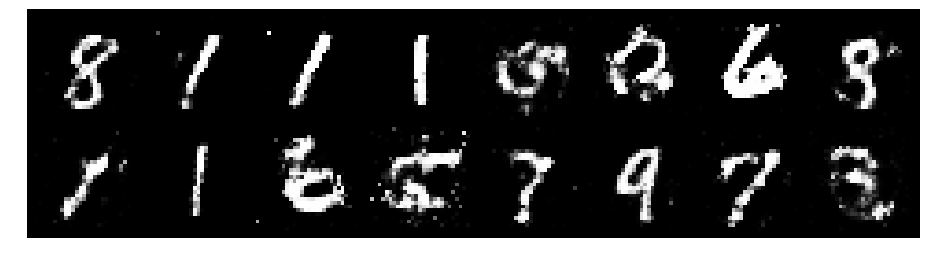

Epoch: [47/50], Batch Num: [200/600]
Discriminator Loss: 1.1392, Generator Loss: 0.9596
D(x): 0.6256, D(G(z)): 0.4310


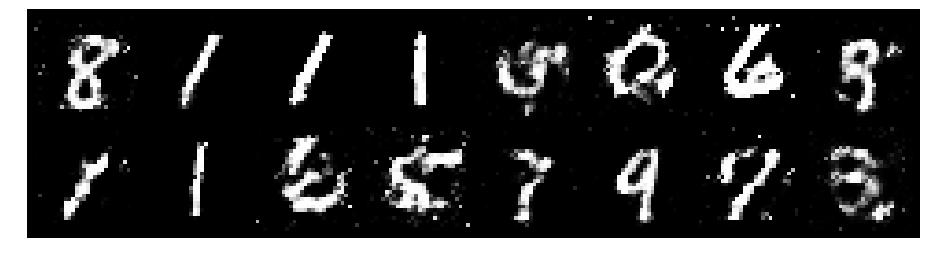

Epoch: [47/50], Batch Num: [300/600]
Discriminator Loss: 1.1775, Generator Loss: 0.9585
D(x): 0.6219, D(G(z)): 0.4121


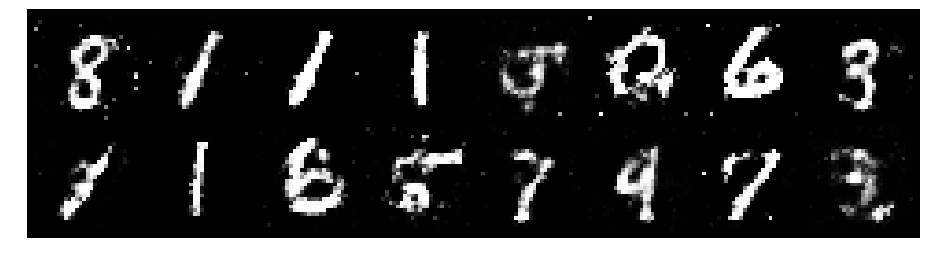

Epoch: [47/50], Batch Num: [400/600]
Discriminator Loss: 1.1144, Generator Loss: 1.0408
D(x): 0.6381, D(G(z)): 0.3919


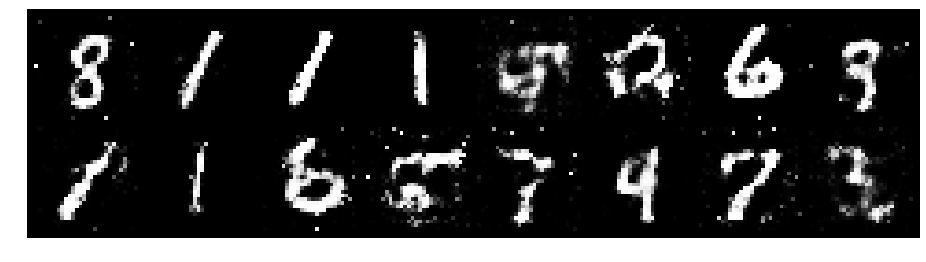

Epoch: [47/50], Batch Num: [500/600]
Discriminator Loss: 1.2032, Generator Loss: 1.0737
D(x): 0.6040, D(G(z)): 0.3796


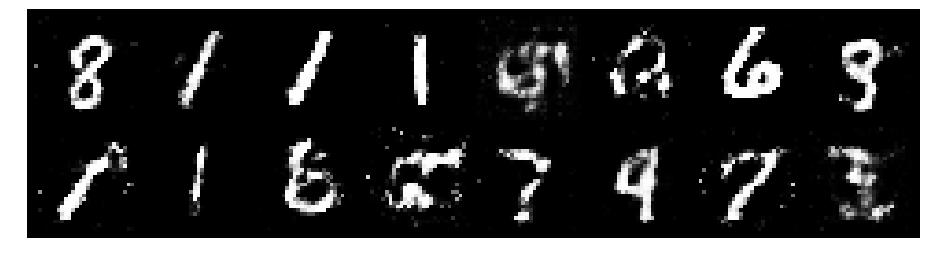

Epoch: [48/50], Batch Num: [0/600]
Discriminator Loss: 1.2102, Generator Loss: 0.9619
D(x): 0.6014, D(G(z)): 0.4342


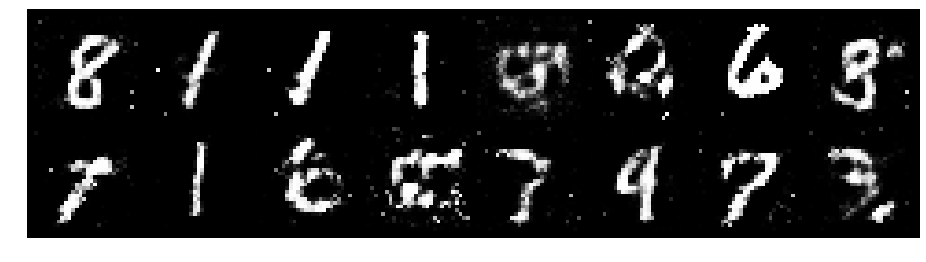

Epoch: [48/50], Batch Num: [100/600]
Discriminator Loss: 1.1140, Generator Loss: 0.8829
D(x): 0.6679, D(G(z)): 0.4512


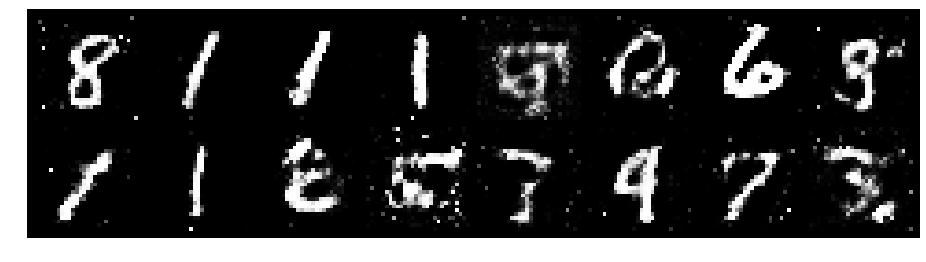

Epoch: [48/50], Batch Num: [200/600]
Discriminator Loss: 1.1931, Generator Loss: 1.0808
D(x): 0.5682, D(G(z)): 0.3908


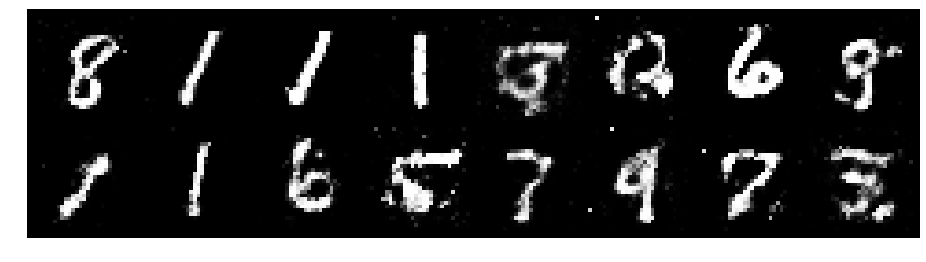

Epoch: [48/50], Batch Num: [300/600]
Discriminator Loss: 1.1961, Generator Loss: 1.0372
D(x): 0.6360, D(G(z)): 0.4609


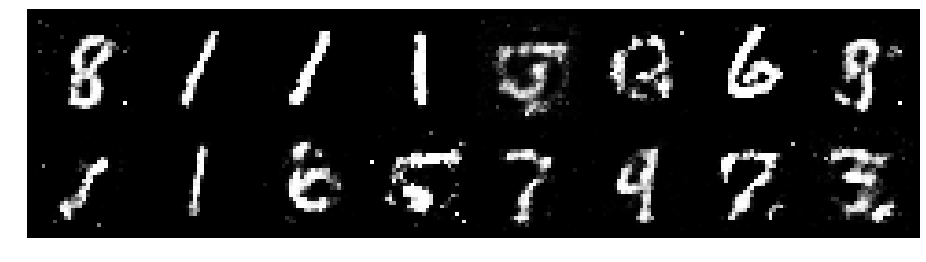

Epoch: [48/50], Batch Num: [400/600]
Discriminator Loss: 1.2660, Generator Loss: 1.1985
D(x): 0.5592, D(G(z)): 0.4081


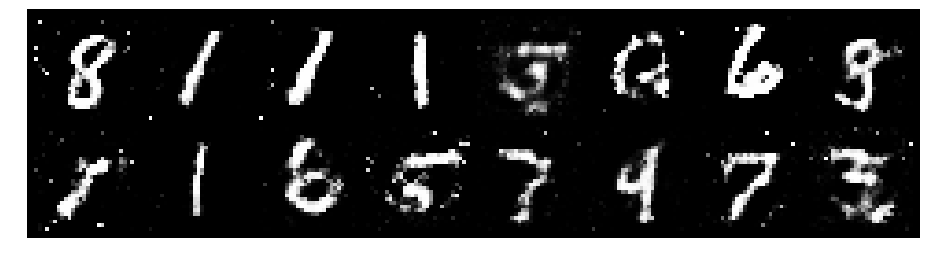

Epoch: [48/50], Batch Num: [500/600]
Discriminator Loss: 1.2079, Generator Loss: 1.1556
D(x): 0.5734, D(G(z)): 0.4026


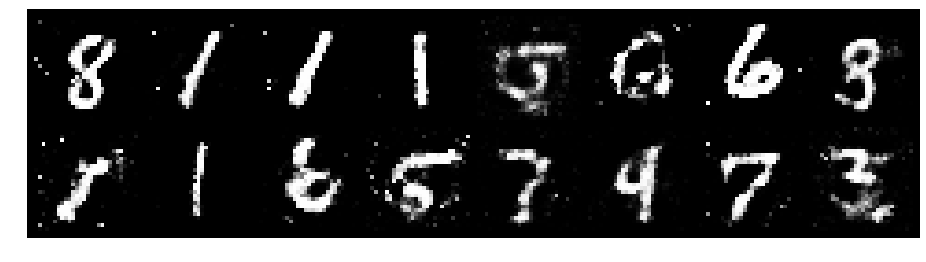

Epoch: [49/50], Batch Num: [0/600]
Discriminator Loss: 1.2625, Generator Loss: 1.1733
D(x): 0.5444, D(G(z)): 0.3626


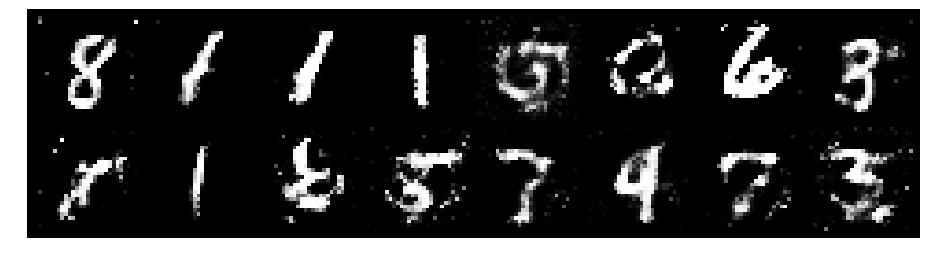

Epoch: [49/50], Batch Num: [100/600]
Discriminator Loss: 1.1508, Generator Loss: 1.0157
D(x): 0.5910, D(G(z)): 0.3965


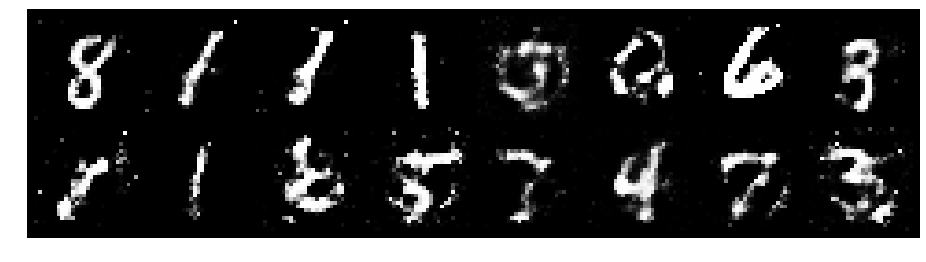

Epoch: [49/50], Batch Num: [200/600]
Discriminator Loss: 1.2534, Generator Loss: 0.9359
D(x): 0.5977, D(G(z)): 0.4534


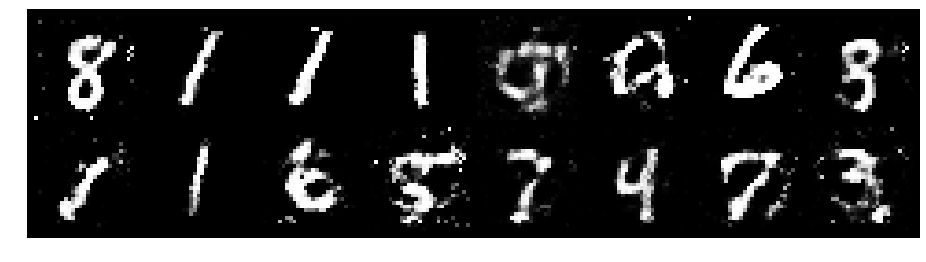

Epoch: [49/50], Batch Num: [300/600]
Discriminator Loss: 1.1851, Generator Loss: 1.0080
D(x): 0.6090, D(G(z)): 0.4242


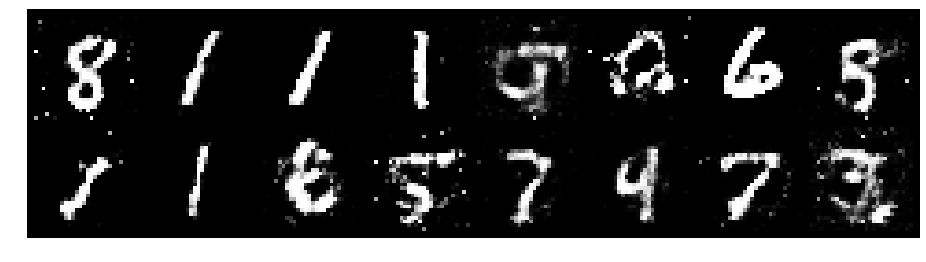

Epoch: [49/50], Batch Num: [400/600]
Discriminator Loss: 1.2843, Generator Loss: 1.1045
D(x): 0.5807, D(G(z)): 0.4316


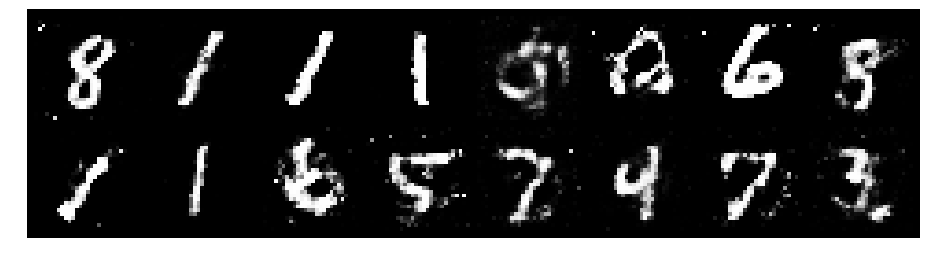

Epoch: [49/50], Batch Num: [500/600]
Discriminator Loss: 1.1397, Generator Loss: 0.9991
D(x): 0.5667, D(G(z)): 0.3651


In [14]:
# Create logger instance
logger = Logger(model_name='VGAN', data_name='MNIST')
# Total number of epochs to train
num_epochs = 50
for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(data_loader):
        N = real_batch.size(0)
        # 1. Train Discriminator
        real_data = Variable(images_to_vectors(real_batch))
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        fake_data = generator(noise(N)).detach()
        # Train D
        d_error, d_pred_real, d_pred_fake = \
              train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(N))
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log batch error
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches
        if (n_batch) % 100 == 0: 
            test_images = vectors_to_images(generator(test_noise))
            test_images = test_images.data
            logger.log_images(
                test_images, num_test_samples, 
                epoch, n_batch, num_batches
            );
            # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, d_pred_real, d_pred_fake
            )